In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

In [2]:
train_df = pd.read_csv("2022Fall7406train.csv", header=None)
train_df

,0,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,200,201
0,0.00,0.00,11.627782,15.492258,18.113715,26.651443,35.760375,14.042800,17.693898,22.111201,...,14.353992,14.791305,16.074881,18.660128,22.231594,29.001350,11.476222,37.295787,38.266207,19.499649
1,0.00,0.01,32.418541,11.764245,12.497371,40.506724,14.571412,24.105663,14.376934,10.176242,...,18.270395,9.844120,37.554566,26.857792,17.962377,18.930204,42.553611,21.671053,19.775414,12.341887
2,0.00,0.02,22.027616,22.607331,40.110178,26.467103,9.863613,21.785622,10.163916,24.017838,...,30.841856,24.680535,13.733989,35.756375,17.038723,26.088150,28.440320,14.916729,14.087599,10.902106
3,0.00,0.03,33.721922,19.678209,12.277800,26.020683,10.881366,10.526013,21.427323,18.666008,...,12.811873,28.328625,13.994146,24.297710,18.926106,18.355559,24.444654,15.326551,11.266254,15.063868
4,0.00,0.04,12.302136,11.913433,9.100761,20.023935,13.930801,14.081861,17.413838,24.911193,...,24.502334,43.307038,18.677530,17.403343,17.213597,13.250280,12.868067,21.350358,19.144911,15.963459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.99,0.95,67.484465,70.918129,57.267698,51.074847,56.152244,69.188008,63.500230,69.019970,...,57.526854,54.703538,60.520955,61.637102,81.363263,48.528949,62.950208,54.959333,67.334284,44.945843
9996,0.99,0.96,42.866619,72.810027,73.988045,60.944896,67.229097,76.587754,49.184458,66.261434,...,66.909927,54.753221,74.429928,63.656503,44.256650,72.878470,51.782430,68.449934,35.121278,47.389803
9997,0.99,0.97,57.888105,36.745410,60.188074,67.245414,65.365039,58.566381,71.491106,66.641770,...,48.546223,54.103874,70.024250,57.398292,73.482231,78.582988,62.266890,78.137082,49.751716,57.011373
9998,0.99,0.98,67.423897,62.534617,65.812597,59.364404,49.112736,57.797796,53.310866,64.614495,...,69.535135,54.398329,65.267739,63.167907,61.935482,60.401761,56.867391,73.555215,49.362787,69.285946


In [3]:
test_df = pd.read_csv("2022Fall7406test.csv", header=None)
test_df

,0,1
0,0.011679,0.002427
1,0.011679,0.024405
2,0.011679,0.058861
3,0.011679,0.065451
4,0.011679,0.071387
...,...,...
2495,0.992762,0.838541
2496,0.992762,0.924013
2497,0.992762,0.927652
2498,0.992762,0.942036


In [4]:
X1 = train_df.iloc[:,0]
X2 = train_df.iloc[:,1]
mu = train_df.iloc[:,2:].mean(axis=1)
v = train_df.iloc[:,2:].var(axis=1)

In [5]:
train_df2 = pd.DataFrame({'x1':X1, 'x2':X2, 'mu':mu, 'v': v})
train_df2

,x1,x2,mu,v
0,0.00,0.00,20.315556,97.676165
1,0.00,0.01,21.115456,112.681665
2,0.00,0.02,20.558719,94.542537
3,0.00,0.03,19.164957,81.550269
4,0.00,0.04,20.051926,99.869165
...,...,...,...,...
9995,0.99,0.95,60.997455,127.980617
9996,0.99,0.96,61.999813,100.911845
9997,0.99,0.97,62.093463,80.265974
9998,0.99,0.98,61.876952,53.491256


<AxesSubplot: xlabel='x1', ylabel='mu'>

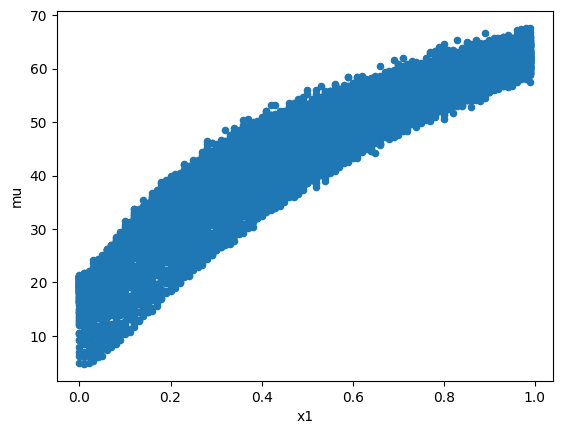

In [6]:
train_df2.plot(x='x1',y='mu', kind="scatter")

<AxesSubplot: xlabel='x2', ylabel='mu'>

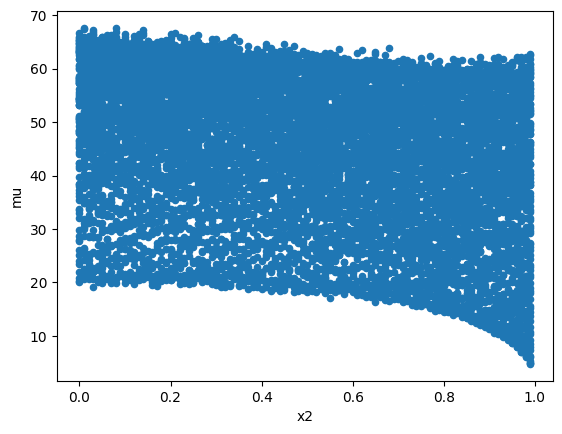

In [7]:
train_df2.plot(x='x2',y='mu', kind="scatter")

<AxesSubplot: xlabel='x1', ylabel='v'>

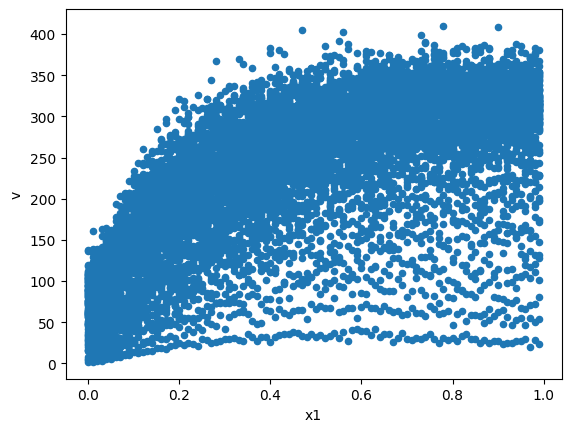

In [8]:
train_df2.plot(x='x1',y='v', kind="scatter")

<AxesSubplot: xlabel='x2', ylabel='v'>

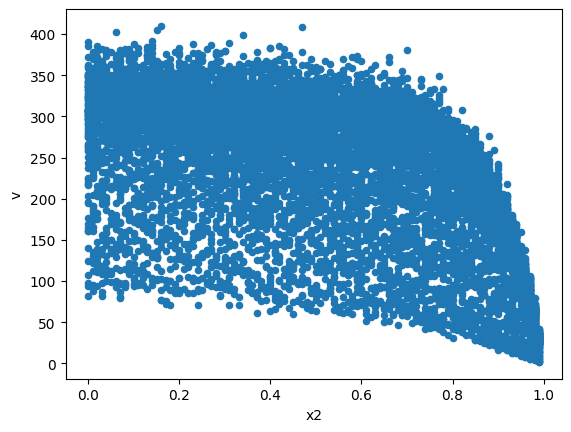

In [9]:
train_df2.plot(x='x2',y='v', kind="scatter")

In [10]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor

## Find best model for var

In [11]:
cv_10 = KFold(10, shuffle=True, random_state=7406)
cv_5 = KFold(5, shuffle=True, random_state=7406)
def score_clf(clf, x, y):
    mse_10 = cross_val_score(clf, x, y, cv=cv_10, scoring='neg_mean_squared_error').mean()
    r2_10 = cross_val_score(clf, x, y, cv=cv_10, scoring='r2').mean()
    mse_5 = cross_val_score(clf, x, y, cv=cv_5, scoring='neg_mean_squared_error').mean()
    r2_5 = cross_val_score(clf, x, y, cv=cv_5, scoring='r2').mean()
    return mse_10, r2_10, mse_5, r2_5

In [12]:
X = train_df2[['x1','x2']]
y = train_df2['v']

name_list = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet',
         'Bayesian Ridge', 'SGD Regressor', 'Kernel Ridge',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor', 'SVR', 'CatBoostRegressor',
         'XGB Regressor', 'LGBM Regressor']
clf_list = [LinearRegression(), Ridge(), Lasso(), ElasticNet(),
          BayesianRidge(), SGDRegressor(), KernelRidge(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor(), SVR(), CatBoostRegressor(),
          XGBRegressor(), LGBMRegressor()]

mse_10_list, r2_10_list, mse_5_list, r2_5_list = [], [], [], []
for clf in clf_list:
    # Get the best params for each clf
    
    mse_10, r2_10, mse_5, r2_5 = score_clf(clf, X, y)
    
    mse_10_list.append(mse_10)
    r2_10_list.append(r2_10)
    mse_5_list.append(mse_5)
    r2_5_list.append(r2_5)

Learning rate set to 0.057936
0:	learn: 83.9924095	total: 60.4ms	remaining: 1m
1:	learn: 80.0768122	total: 61.8ms	remaining: 30.8s
2:	learn: 76.3711376	total: 62.9ms	remaining: 20.9s
3:	learn: 72.7631028	total: 63.8ms	remaining: 15.9s
4:	learn: 69.4597242	total: 65.8ms	remaining: 13.1s
5:	learn: 66.3083559	total: 66.8ms	remaining: 11.1s
6:	learn: 63.2846020	total: 68ms	remaining: 9.65s
7:	learn: 60.4479083	total: 69.3ms	remaining: 8.59s
8:	learn: 57.8761409	total: 70.5ms	remaining: 7.76s
9:	learn: 55.4515705	total: 71.6ms	remaining: 7.09s
10:	learn: 53.1949149	total: 72.7ms	remaining: 6.53s
11:	learn: 51.0755539	total: 73.7ms	remaining: 6.07s
12:	learn: 49.0152167	total: 74.9ms	remaining: 5.68s
13:	learn: 47.1496847	total: 75.9ms	remaining: 5.34s
14:	learn: 45.3277129	total: 77.1ms	remaining: 5.07s
15:	learn: 43.6754288	total: 78.4ms	remaining: 4.82s
16:	learn: 42.0884146	total: 79.6ms	remaining: 4.6s
17:	learn: 40.6296316	total: 80.6ms	remaining: 4.4s
18:	learn: 39.2789414	total: 81.8

311:	learn: 22.4059599	total: 425ms	remaining: 937ms
312:	learn: 22.4050169	total: 426ms	remaining: 936ms
313:	learn: 22.4038385	total: 428ms	remaining: 935ms
314:	learn: 22.4017785	total: 429ms	remaining: 933ms
315:	learn: 22.4005920	total: 429ms	remaining: 930ms
316:	learn: 22.3987313	total: 430ms	remaining: 927ms
317:	learn: 22.3973679	total: 431ms	remaining: 924ms
318:	learn: 22.3948202	total: 432ms	remaining: 921ms
319:	learn: 22.3931233	total: 432ms	remaining: 918ms
320:	learn: 22.3900903	total: 433ms	remaining: 916ms
321:	learn: 22.3878600	total: 434ms	remaining: 913ms
322:	learn: 22.3872458	total: 434ms	remaining: 910ms
323:	learn: 22.3849712	total: 437ms	remaining: 911ms
324:	learn: 22.3825200	total: 437ms	remaining: 908ms
325:	learn: 22.3814452	total: 438ms	remaining: 905ms
326:	learn: 22.3790094	total: 439ms	remaining: 903ms
327:	learn: 22.3768823	total: 439ms	remaining: 900ms
328:	learn: 22.3758305	total: 440ms	remaining: 897ms
329:	learn: 22.3737761	total: 441ms	remaining:

477:	learn: 22.0988366	total: 619ms	remaining: 676ms
478:	learn: 22.0972375	total: 620ms	remaining: 674ms
479:	learn: 22.0956610	total: 621ms	remaining: 672ms
480:	learn: 22.0933861	total: 621ms	remaining: 670ms
481:	learn: 22.0914774	total: 622ms	remaining: 668ms
482:	learn: 22.0891050	total: 623ms	remaining: 667ms
483:	learn: 22.0879904	total: 623ms	remaining: 665ms
484:	learn: 22.0861778	total: 624ms	remaining: 663ms
485:	learn: 22.0851637	total: 625ms	remaining: 661ms
486:	learn: 22.0833836	total: 625ms	remaining: 659ms
487:	learn: 22.0811716	total: 626ms	remaining: 657ms
488:	learn: 22.0798203	total: 627ms	remaining: 655ms
489:	learn: 22.0771904	total: 628ms	remaining: 653ms
490:	learn: 22.0736449	total: 628ms	remaining: 651ms
491:	learn: 22.0724965	total: 629ms	remaining: 650ms
492:	learn: 22.0700091	total: 631ms	remaining: 649ms
493:	learn: 22.0679753	total: 632ms	remaining: 647ms
494:	learn: 22.0664481	total: 632ms	remaining: 645ms
495:	learn: 22.0643345	total: 633ms	remaining:

636:	learn: 21.8434054	total: 812ms	remaining: 463ms
637:	learn: 21.8409547	total: 814ms	remaining: 462ms
638:	learn: 21.8384663	total: 820ms	remaining: 463ms
639:	learn: 21.8361811	total: 822ms	remaining: 463ms
640:	learn: 21.8355821	total: 824ms	remaining: 462ms
641:	learn: 21.8337587	total: 825ms	remaining: 460ms
642:	learn: 21.8321174	total: 826ms	remaining: 458ms
643:	learn: 21.8312660	total: 826ms	remaining: 457ms
644:	learn: 21.8279237	total: 827ms	remaining: 455ms
645:	learn: 21.8269643	total: 828ms	remaining: 454ms
646:	learn: 21.8249381	total: 829ms	remaining: 452ms
647:	learn: 21.8234722	total: 829ms	remaining: 450ms
648:	learn: 21.8209426	total: 830ms	remaining: 449ms
649:	learn: 21.8204232	total: 831ms	remaining: 447ms
650:	learn: 21.8186972	total: 831ms	remaining: 446ms
651:	learn: 21.8154151	total: 832ms	remaining: 444ms
652:	learn: 21.8138424	total: 833ms	remaining: 442ms
653:	learn: 21.8132677	total: 834ms	remaining: 441ms
654:	learn: 21.8113215	total: 836ms	remaining:

826:	learn: 21.5644120	total: 1s	remaining: 210ms
827:	learn: 21.5637229	total: 1.01s	remaining: 209ms
828:	learn: 21.5613806	total: 1.01s	remaining: 208ms
829:	learn: 21.5595623	total: 1.01s	remaining: 207ms
830:	learn: 21.5567699	total: 1.01s	remaining: 206ms
831:	learn: 21.5556282	total: 1.01s	remaining: 204ms
832:	learn: 21.5552609	total: 1.01s	remaining: 203ms
833:	learn: 21.5533224	total: 1.01s	remaining: 202ms
834:	learn: 21.5525048	total: 1.01s	remaining: 201ms
835:	learn: 21.5511689	total: 1.02s	remaining: 199ms
836:	learn: 21.5490473	total: 1.02s	remaining: 198ms
837:	learn: 21.5469712	total: 1.02s	remaining: 197ms
838:	learn: 21.5459065	total: 1.02s	remaining: 196ms
839:	learn: 21.5442121	total: 1.02s	remaining: 194ms
840:	learn: 21.5430688	total: 1.02s	remaining: 193ms
841:	learn: 21.5419303	total: 1.02s	remaining: 192ms
842:	learn: 21.5411852	total: 1.02s	remaining: 191ms
843:	learn: 21.5399288	total: 1.02s	remaining: 190ms
844:	learn: 21.5378180	total: 1.03s	remaining: 18

Learning rate set to 0.057936
0:	learn: 83.9431147	total: 751us	remaining: 750ms
1:	learn: 79.9245340	total: 1.38ms	remaining: 691ms
2:	learn: 76.2035333	total: 2.02ms	remaining: 672ms
3:	learn: 72.5874953	total: 2.73ms	remaining: 679ms
4:	learn: 69.2725075	total: 3.42ms	remaining: 681ms
5:	learn: 66.1245463	total: 4.77ms	remaining: 791ms
6:	learn: 63.1081712	total: 52.8ms	remaining: 7.49s
7:	learn: 60.3204883	total: 53.5ms	remaining: 6.64s
8:	learn: 57.6473132	total: 54.4ms	remaining: 5.99s
9:	learn: 55.2487052	total: 55.6ms	remaining: 5.51s
10:	learn: 52.9678956	total: 56.4ms	remaining: 5.07s
11:	learn: 50.8654968	total: 57.3ms	remaining: 4.72s
12:	learn: 48.8225456	total: 58.2ms	remaining: 4.42s
13:	learn: 46.9295098	total: 59.3ms	remaining: 4.18s
14:	learn: 45.1284199	total: 60.3ms	remaining: 3.96s
15:	learn: 43.4694368	total: 61.2ms	remaining: 3.76s
16:	learn: 41.9507148	total: 62.3ms	remaining: 3.6s
17:	learn: 40.4901379	total: 63.4ms	remaining: 3.46s
18:	learn: 39.1500707	total:

303:	learn: 22.4737144	total: 388ms	remaining: 889ms
304:	learn: 22.4700911	total: 390ms	remaining: 888ms
305:	learn: 22.4680747	total: 391ms	remaining: 887ms
306:	learn: 22.4670346	total: 392ms	remaining: 886ms
307:	learn: 22.4646487	total: 394ms	remaining: 885ms
308:	learn: 22.4634061	total: 395ms	remaining: 883ms
309:	learn: 22.4588854	total: 396ms	remaining: 881ms
310:	learn: 22.4555263	total: 397ms	remaining: 879ms
311:	learn: 22.4539507	total: 398ms	remaining: 877ms
312:	learn: 22.4519978	total: 399ms	remaining: 875ms
313:	learn: 22.4505823	total: 400ms	remaining: 873ms
314:	learn: 22.4481531	total: 401ms	remaining: 872ms
315:	learn: 22.4469085	total: 402ms	remaining: 871ms
316:	learn: 22.4456880	total: 404ms	remaining: 870ms
317:	learn: 22.4436831	total: 405ms	remaining: 868ms
318:	learn: 22.4422096	total: 406ms	remaining: 867ms
319:	learn: 22.4401547	total: 407ms	remaining: 866ms
320:	learn: 22.4365771	total: 409ms	remaining: 864ms
321:	learn: 22.4324196	total: 410ms	remaining:

473:	learn: 22.1607913	total: 583ms	remaining: 647ms
474:	learn: 22.1578778	total: 584ms	remaining: 646ms
475:	learn: 22.1553742	total: 586ms	remaining: 645ms
476:	learn: 22.1535502	total: 587ms	remaining: 643ms
477:	learn: 22.1517949	total: 588ms	remaining: 642ms
478:	learn: 22.1494313	total: 589ms	remaining: 641ms
479:	learn: 22.1483384	total: 590ms	remaining: 639ms
480:	learn: 22.1455458	total: 591ms	remaining: 638ms
481:	learn: 22.1444751	total: 592ms	remaining: 637ms
482:	learn: 22.1436147	total: 594ms	remaining: 635ms
483:	learn: 22.1426104	total: 595ms	remaining: 634ms
484:	learn: 22.1401661	total: 596ms	remaining: 633ms
485:	learn: 22.1383843	total: 597ms	remaining: 631ms
486:	learn: 22.1376996	total: 598ms	remaining: 630ms
487:	learn: 22.1346024	total: 600ms	remaining: 629ms
488:	learn: 22.1318455	total: 601ms	remaining: 628ms
489:	learn: 22.1311897	total: 602ms	remaining: 627ms
490:	learn: 22.1288575	total: 603ms	remaining: 625ms
491:	learn: 22.1276145	total: 604ms	remaining:

634:	learn: 21.8716124	total: 778ms	remaining: 447ms
635:	learn: 21.8698930	total: 783ms	remaining: 448ms
636:	learn: 21.8689723	total: 784ms	remaining: 447ms
637:	learn: 21.8684344	total: 784ms	remaining: 445ms
638:	learn: 21.8675081	total: 785ms	remaining: 443ms
639:	learn: 21.8664519	total: 786ms	remaining: 442ms
640:	learn: 21.8652231	total: 786ms	remaining: 440ms
641:	learn: 21.8636806	total: 787ms	remaining: 439ms
642:	learn: 21.8621645	total: 787ms	remaining: 437ms
643:	learn: 21.8614559	total: 788ms	remaining: 436ms
644:	learn: 21.8598078	total: 794ms	remaining: 437ms
645:	learn: 21.8589429	total: 795ms	remaining: 436ms
646:	learn: 21.8572805	total: 796ms	remaining: 435ms
647:	learn: 21.8557400	total: 797ms	remaining: 433ms
648:	learn: 21.8548922	total: 798ms	remaining: 432ms
649:	learn: 21.8533513	total: 799ms	remaining: 430ms
650:	learn: 21.8516954	total: 799ms	remaining: 428ms
651:	learn: 21.8492270	total: 800ms	remaining: 427ms
652:	learn: 21.8474014	total: 801ms	remaining:

948:	learn: 21.4205851	total: 1.17s	remaining: 63.1ms
949:	learn: 21.4190182	total: 1.18s	remaining: 61.9ms
950:	learn: 21.4179267	total: 1.18s	remaining: 60.7ms
951:	learn: 21.4171764	total: 1.18s	remaining: 59.4ms
952:	learn: 21.4162842	total: 1.18s	remaining: 58.2ms
953:	learn: 21.4151608	total: 1.18s	remaining: 57ms
954:	learn: 21.4138108	total: 1.18s	remaining: 55.8ms
955:	learn: 21.4133229	total: 1.19s	remaining: 54.6ms
956:	learn: 21.4122176	total: 1.19s	remaining: 53.4ms
957:	learn: 21.4101020	total: 1.19s	remaining: 52.2ms
958:	learn: 21.4093745	total: 1.19s	remaining: 50.9ms
959:	learn: 21.4082780	total: 1.19s	remaining: 49.7ms
960:	learn: 21.4073804	total: 1.19s	remaining: 48.4ms
961:	learn: 21.4042768	total: 1.19s	remaining: 47.2ms
962:	learn: 21.4034169	total: 1.2s	remaining: 45.9ms
963:	learn: 21.4023045	total: 1.2s	remaining: 44.7ms
964:	learn: 21.4013950	total: 1.2s	remaining: 43.5ms
965:	learn: 21.4004638	total: 1.2s	remaining: 42.3ms
966:	learn: 21.3987507	total: 1.2s

126:	learn: 22.8254642	total: 119ms	remaining: 817ms
127:	learn: 22.8234816	total: 120ms	remaining: 814ms
128:	learn: 22.8206035	total: 121ms	remaining: 814ms
129:	learn: 22.8187165	total: 121ms	remaining: 811ms
130:	learn: 22.8174076	total: 122ms	remaining: 808ms
131:	learn: 22.8141510	total: 123ms	remaining: 806ms
132:	learn: 22.8125876	total: 123ms	remaining: 803ms
133:	learn: 22.8109965	total: 126ms	remaining: 811ms
134:	learn: 22.8095082	total: 126ms	remaining: 810ms
135:	learn: 22.8085525	total: 128ms	remaining: 814ms
136:	learn: 22.8063870	total: 131ms	remaining: 824ms
137:	learn: 22.8045706	total: 132ms	remaining: 824ms
138:	learn: 22.8018567	total: 133ms	remaining: 824ms
139:	learn: 22.7993820	total: 134ms	remaining: 822ms
140:	learn: 22.7979200	total: 134ms	remaining: 819ms
141:	learn: 22.7951049	total: 135ms	remaining: 816ms
142:	learn: 22.7933746	total: 136ms	remaining: 814ms
143:	learn: 22.7917301	total: 136ms	remaining: 811ms
144:	learn: 22.7901744	total: 137ms	remaining:

313:	learn: 22.3995416	total: 314ms	remaining: 686ms
314:	learn: 22.3981110	total: 315ms	remaining: 684ms
315:	learn: 22.3965644	total: 315ms	remaining: 683ms
316:	learn: 22.3932185	total: 316ms	remaining: 681ms
317:	learn: 22.3910730	total: 317ms	remaining: 681ms
318:	learn: 22.3874383	total: 318ms	remaining: 680ms
319:	learn: 22.3851337	total: 319ms	remaining: 679ms
320:	learn: 22.3834287	total: 321ms	remaining: 678ms
321:	learn: 22.3790300	total: 322ms	remaining: 678ms
322:	learn: 22.3771327	total: 323ms	remaining: 677ms
323:	learn: 22.3764011	total: 324ms	remaining: 676ms
324:	learn: 22.3751178	total: 325ms	remaining: 675ms
325:	learn: 22.3725262	total: 327ms	remaining: 675ms
326:	learn: 22.3699796	total: 327ms	remaining: 674ms
327:	learn: 22.3690687	total: 330ms	remaining: 675ms
328:	learn: 22.3652058	total: 331ms	remaining: 674ms
329:	learn: 22.3629946	total: 332ms	remaining: 674ms
330:	learn: 22.3612474	total: 333ms	remaining: 673ms
331:	learn: 22.3588327	total: 334ms	remaining:

471:	learn: 22.1043410	total: 505ms	remaining: 565ms
472:	learn: 22.1023491	total: 506ms	remaining: 564ms
473:	learn: 22.1003721	total: 507ms	remaining: 563ms
474:	learn: 22.0991006	total: 508ms	remaining: 562ms
475:	learn: 22.0972564	total: 510ms	remaining: 561ms
476:	learn: 22.0954926	total: 510ms	remaining: 560ms
477:	learn: 22.0942168	total: 511ms	remaining: 558ms
478:	learn: 22.0926622	total: 512ms	remaining: 557ms
479:	learn: 22.0908773	total: 513ms	remaining: 556ms
480:	learn: 22.0896490	total: 514ms	remaining: 554ms
481:	learn: 22.0869240	total: 515ms	remaining: 553ms
482:	learn: 22.0855610	total: 516ms	remaining: 552ms
483:	learn: 22.0841964	total: 517ms	remaining: 552ms
484:	learn: 22.0820185	total: 518ms	remaining: 550ms
485:	learn: 22.0803979	total: 519ms	remaining: 549ms
486:	learn: 22.0792537	total: 521ms	remaining: 548ms
487:	learn: 22.0782328	total: 522ms	remaining: 548ms
488:	learn: 22.0763802	total: 524ms	remaining: 547ms
489:	learn: 22.0749315	total: 525ms	remaining:

648:	learn: 21.8150858	total: 700ms	remaining: 378ms
649:	learn: 21.8135034	total: 703ms	remaining: 379ms
650:	learn: 21.8109694	total: 705ms	remaining: 378ms
651:	learn: 21.8087166	total: 706ms	remaining: 377ms
652:	learn: 21.8065282	total: 707ms	remaining: 376ms
653:	learn: 21.8032333	total: 708ms	remaining: 375ms
654:	learn: 21.8007597	total: 709ms	remaining: 373ms
655:	learn: 21.8000219	total: 710ms	remaining: 373ms
656:	learn: 21.7983594	total: 711ms	remaining: 371ms
657:	learn: 21.7972242	total: 712ms	remaining: 370ms
658:	learn: 21.7954502	total: 713ms	remaining: 369ms
659:	learn: 21.7928455	total: 714ms	remaining: 368ms
660:	learn: 21.7911985	total: 716ms	remaining: 367ms
661:	learn: 21.7903624	total: 718ms	remaining: 366ms
662:	learn: 21.7893949	total: 718ms	remaining: 365ms
663:	learn: 21.7886658	total: 720ms	remaining: 364ms
664:	learn: 21.7864082	total: 721ms	remaining: 363ms
665:	learn: 21.7836936	total: 722ms	remaining: 362ms
666:	learn: 21.7807924	total: 723ms	remaining:

817:	learn: 21.5746045	total: 894ms	remaining: 199ms
818:	learn: 21.5730342	total: 895ms	remaining: 198ms
819:	learn: 21.5726751	total: 896ms	remaining: 197ms
820:	learn: 21.5715583	total: 897ms	remaining: 196ms
821:	learn: 21.5695231	total: 897ms	remaining: 194ms
822:	learn: 21.5679080	total: 899ms	remaining: 193ms
823:	learn: 21.5672052	total: 900ms	remaining: 192ms
824:	learn: 21.5649530	total: 901ms	remaining: 191ms
825:	learn: 21.5620064	total: 902ms	remaining: 190ms
826:	learn: 21.5596725	total: 903ms	remaining: 189ms
827:	learn: 21.5583824	total: 904ms	remaining: 188ms
828:	learn: 21.5565710	total: 905ms	remaining: 187ms
829:	learn: 21.5555187	total: 907ms	remaining: 186ms
830:	learn: 21.5543324	total: 908ms	remaining: 185ms
831:	learn: 21.5531863	total: 909ms	remaining: 183ms
832:	learn: 21.5520680	total: 910ms	remaining: 182ms
833:	learn: 21.5507510	total: 911ms	remaining: 181ms
834:	learn: 21.5502958	total: 912ms	remaining: 180ms
835:	learn: 21.5490037	total: 913ms	remaining:

980:	learn: 21.3595868	total: 1.09s	remaining: 21.1ms
981:	learn: 21.3581251	total: 1.09s	remaining: 20ms
982:	learn: 21.3573349	total: 1.09s	remaining: 18.8ms
983:	learn: 21.3566035	total: 1.09s	remaining: 17.7ms
984:	learn: 21.3552190	total: 1.09s	remaining: 16.6ms
985:	learn: 21.3524408	total: 1.09s	remaining: 15.5ms
986:	learn: 21.3518323	total: 1.09s	remaining: 14.4ms
987:	learn: 21.3508056	total: 1.09s	remaining: 13.3ms
988:	learn: 21.3491401	total: 1.1s	remaining: 12.2ms
989:	learn: 21.3477016	total: 1.1s	remaining: 11.1ms
990:	learn: 21.3462885	total: 1.1s	remaining: 9.99ms
991:	learn: 21.3453518	total: 1.1s	remaining: 8.88ms
992:	learn: 21.3441864	total: 1.1s	remaining: 7.78ms
993:	learn: 21.3432650	total: 1.1s	remaining: 6.67ms
994:	learn: 21.3420858	total: 1.11s	remaining: 5.57ms
995:	learn: 21.3412357	total: 1.11s	remaining: 4.46ms
996:	learn: 21.3389507	total: 1.11s	remaining: 3.34ms
997:	learn: 21.3386534	total: 1.11s	remaining: 2.23ms
998:	learn: 21.3370255	total: 1.11s	

276:	learn: 22.5265238	total: 334ms	remaining: 873ms
277:	learn: 22.5236794	total: 335ms	remaining: 871ms
278:	learn: 22.5215360	total: 336ms	remaining: 868ms
279:	learn: 22.5200251	total: 337ms	remaining: 865ms
280:	learn: 22.5186744	total: 337ms	remaining: 863ms
281:	learn: 22.5170027	total: 338ms	remaining: 860ms
282:	learn: 22.5133687	total: 339ms	remaining: 858ms
283:	learn: 22.5103438	total: 342ms	remaining: 862ms
284:	learn: 22.5066433	total: 343ms	remaining: 859ms
285:	learn: 22.5033889	total: 343ms	remaining: 857ms
286:	learn: 22.5019697	total: 344ms	remaining: 854ms
287:	learn: 22.5003878	total: 345ms	remaining: 852ms
288:	learn: 22.4973649	total: 350ms	remaining: 862ms
289:	learn: 22.4965082	total: 351ms	remaining: 859ms
290:	learn: 22.4936942	total: 353ms	remaining: 860ms
291:	learn: 22.4913314	total: 354ms	remaining: 858ms
292:	learn: 22.4886864	total: 357ms	remaining: 861ms
293:	learn: 22.4863174	total: 360ms	remaining: 864ms
294:	learn: 22.4854589	total: 362ms	remaining:

434:	learn: 22.2036146	total: 522ms	remaining: 678ms
435:	learn: 22.2024261	total: 523ms	remaining: 676ms
436:	learn: 22.1995180	total: 533ms	remaining: 686ms
437:	learn: 22.1976990	total: 534ms	remaining: 686ms
438:	learn: 22.1949474	total: 537ms	remaining: 686ms
439:	learn: 22.1924252	total: 538ms	remaining: 685ms
440:	learn: 22.1905885	total: 540ms	remaining: 684ms
441:	learn: 22.1883526	total: 541ms	remaining: 683ms
442:	learn: 22.1869535	total: 543ms	remaining: 682ms
443:	learn: 22.1858906	total: 544ms	remaining: 681ms
444:	learn: 22.1852307	total: 545ms	remaining: 680ms
445:	learn: 22.1840277	total: 546ms	remaining: 678ms
446:	learn: 22.1834495	total: 547ms	remaining: 677ms
447:	learn: 22.1819582	total: 548ms	remaining: 675ms
448:	learn: 22.1803766	total: 549ms	remaining: 673ms
449:	learn: 22.1781591	total: 549ms	remaining: 671ms
450:	learn: 22.1765132	total: 550ms	remaining: 670ms
451:	learn: 22.1737392	total: 553ms	remaining: 670ms
452:	learn: 22.1712129	total: 554ms	remaining:

607:	learn: 21.9212756	total: 722ms	remaining: 466ms
608:	learn: 21.9202902	total: 725ms	remaining: 465ms
609:	learn: 21.9197258	total: 726ms	remaining: 464ms
610:	learn: 21.9184799	total: 726ms	remaining: 463ms
611:	learn: 21.9173128	total: 727ms	remaining: 461ms
612:	learn: 21.9162000	total: 728ms	remaining: 460ms
613:	learn: 21.9150102	total: 729ms	remaining: 458ms
614:	learn: 21.9130005	total: 730ms	remaining: 457ms
615:	learn: 21.9125217	total: 730ms	remaining: 455ms
616:	learn: 21.9115769	total: 731ms	remaining: 454ms
617:	learn: 21.9102427	total: 732ms	remaining: 453ms
618:	learn: 21.9089054	total: 733ms	remaining: 451ms
619:	learn: 21.9072235	total: 734ms	remaining: 450ms
620:	learn: 21.9049102	total: 735ms	remaining: 448ms
621:	learn: 21.9037281	total: 735ms	remaining: 447ms
622:	learn: 21.9019858	total: 736ms	remaining: 445ms
623:	learn: 21.9007497	total: 737ms	remaining: 444ms
624:	learn: 21.8991234	total: 738ms	remaining: 443ms
625:	learn: 21.8984352	total: 738ms	remaining:

777:	learn: 21.6757215	total: 914ms	remaining: 261ms
778:	learn: 21.6743931	total: 917ms	remaining: 260ms
779:	learn: 21.6733651	total: 919ms	remaining: 259ms
780:	learn: 21.6725426	total: 921ms	remaining: 258ms
781:	learn: 21.6714604	total: 922ms	remaining: 257ms
782:	learn: 21.6704089	total: 924ms	remaining: 256ms
783:	learn: 21.6693688	total: 927ms	remaining: 255ms
784:	learn: 21.6680245	total: 928ms	remaining: 254ms
785:	learn: 21.6667115	total: 929ms	remaining: 253ms
786:	learn: 21.6663557	total: 930ms	remaining: 252ms
787:	learn: 21.6652478	total: 930ms	remaining: 250ms
788:	learn: 21.6640508	total: 931ms	remaining: 249ms
789:	learn: 21.6623327	total: 932ms	remaining: 248ms
790:	learn: 21.6612101	total: 933ms	remaining: 246ms
791:	learn: 21.6594928	total: 934ms	remaining: 245ms
792:	learn: 21.6586667	total: 937ms	remaining: 244ms
793:	learn: 21.6562568	total: 937ms	remaining: 243ms
794:	learn: 21.6551567	total: 938ms	remaining: 242ms
795:	learn: 21.6541537	total: 939ms	remaining:

947:	learn: 21.4609629	total: 1.1s	remaining: 60.6ms
948:	learn: 21.4599853	total: 1.11s	remaining: 59.5ms
949:	learn: 21.4584938	total: 1.11s	remaining: 58.3ms
950:	learn: 21.4574930	total: 1.11s	remaining: 57.1ms
951:	learn: 21.4568894	total: 1.11s	remaining: 55.9ms
952:	learn: 21.4559253	total: 1.11s	remaining: 54.7ms
953:	learn: 21.4546672	total: 1.11s	remaining: 53.6ms
954:	learn: 21.4537937	total: 1.11s	remaining: 52.4ms
955:	learn: 21.4522545	total: 1.11s	remaining: 51.2ms
956:	learn: 21.4508128	total: 1.11s	remaining: 50.1ms
957:	learn: 21.4502258	total: 1.12s	remaining: 48.9ms
958:	learn: 21.4472693	total: 1.12s	remaining: 47.8ms
959:	learn: 21.4468564	total: 1.12s	remaining: 46.6ms
960:	learn: 21.4459806	total: 1.12s	remaining: 45.5ms
961:	learn: 21.4445518	total: 1.12s	remaining: 44.3ms
962:	learn: 21.4427472	total: 1.12s	remaining: 43.1ms
963:	learn: 21.4424770	total: 1.12s	remaining: 42ms
964:	learn: 21.4411133	total: 1.12s	remaining: 40.8ms
965:	learn: 21.4394574	total: 1

108:	learn: 22.9088981	total: 121ms	remaining: 991ms
109:	learn: 22.9062971	total: 122ms	remaining: 987ms
110:	learn: 22.9044553	total: 123ms	remaining: 982ms
111:	learn: 22.9010712	total: 124ms	remaining: 983ms
112:	learn: 22.8992473	total: 125ms	remaining: 983ms
113:	learn: 22.8971078	total: 126ms	remaining: 982ms
114:	learn: 22.8942996	total: 127ms	remaining: 981ms
115:	learn: 22.8913848	total: 129ms	remaining: 981ms
116:	learn: 22.8892307	total: 130ms	remaining: 980ms
117:	learn: 22.8863063	total: 131ms	remaining: 978ms
118:	learn: 22.8851464	total: 132ms	remaining: 978ms
119:	learn: 22.8823771	total: 133ms	remaining: 977ms
120:	learn: 22.8796747	total: 134ms	remaining: 976ms
121:	learn: 22.8773252	total: 136ms	remaining: 976ms
122:	learn: 22.8747425	total: 137ms	remaining: 975ms
123:	learn: 22.8735836	total: 138ms	remaining: 977ms
124:	learn: 22.8699980	total: 139ms	remaining: 974ms
125:	learn: 22.8685869	total: 141ms	remaining: 976ms
126:	learn: 22.8667408	total: 142ms	remaining:

274:	learn: 22.4946624	total: 315ms	remaining: 830ms
275:	learn: 22.4925950	total: 316ms	remaining: 829ms
276:	learn: 22.4903158	total: 317ms	remaining: 828ms
277:	learn: 22.4880996	total: 319ms	remaining: 828ms
278:	learn: 22.4867025	total: 320ms	remaining: 826ms
279:	learn: 22.4843382	total: 321ms	remaining: 825ms
280:	learn: 22.4819431	total: 322ms	remaining: 824ms
281:	learn: 22.4803933	total: 323ms	remaining: 823ms
282:	learn: 22.4794194	total: 324ms	remaining: 821ms
283:	learn: 22.4767591	total: 325ms	remaining: 820ms
284:	learn: 22.4742899	total: 327ms	remaining: 819ms
285:	learn: 22.4721692	total: 328ms	remaining: 818ms
286:	learn: 22.4701542	total: 329ms	remaining: 817ms
287:	learn: 22.4676569	total: 330ms	remaining: 816ms
288:	learn: 22.4658320	total: 331ms	remaining: 815ms
289:	learn: 22.4641889	total: 332ms	remaining: 814ms
290:	learn: 22.4606115	total: 333ms	remaining: 812ms
291:	learn: 22.4582935	total: 334ms	remaining: 811ms
292:	learn: 22.4553587	total: 336ms	remaining:

441:	learn: 22.1646551	total: 510ms	remaining: 644ms
442:	learn: 22.1617913	total: 512ms	remaining: 643ms
443:	learn: 22.1577779	total: 514ms	remaining: 644ms
444:	learn: 22.1562751	total: 517ms	remaining: 645ms
445:	learn: 22.1543733	total: 521ms	remaining: 648ms
446:	learn: 22.1508922	total: 523ms	remaining: 647ms
447:	learn: 22.1482044	total: 525ms	remaining: 647ms
448:	learn: 22.1470172	total: 526ms	remaining: 646ms
449:	learn: 22.1442021	total: 528ms	remaining: 645ms
450:	learn: 22.1422754	total: 529ms	remaining: 644ms
451:	learn: 22.1405898	total: 531ms	remaining: 644ms
452:	learn: 22.1380144	total: 532ms	remaining: 642ms
453:	learn: 22.1366209	total: 533ms	remaining: 641ms
454:	learn: 22.1360688	total: 534ms	remaining: 640ms
455:	learn: 22.1330538	total: 535ms	remaining: 638ms
456:	learn: 22.1315515	total: 536ms	remaining: 637ms
457:	learn: 22.1289536	total: 538ms	remaining: 636ms
458:	learn: 22.1260756	total: 539ms	remaining: 635ms
459:	learn: 22.1246411	total: 540ms	remaining:

735:	learn: 21.6845267	total: 905ms	remaining: 325ms
736:	learn: 21.6834857	total: 907ms	remaining: 323ms
737:	learn: 21.6828772	total: 907ms	remaining: 322ms
738:	learn: 21.6810859	total: 908ms	remaining: 321ms
739:	learn: 21.6782588	total: 909ms	remaining: 319ms
740:	learn: 21.6778725	total: 909ms	remaining: 318ms
741:	learn: 21.6765636	total: 910ms	remaining: 316ms
742:	learn: 21.6753080	total: 911ms	remaining: 315ms
743:	learn: 21.6723438	total: 911ms	remaining: 314ms
744:	learn: 21.6708830	total: 912ms	remaining: 312ms
745:	learn: 21.6693863	total: 913ms	remaining: 311ms
746:	learn: 21.6680508	total: 914ms	remaining: 310ms
747:	learn: 21.6668562	total: 915ms	remaining: 308ms
748:	learn: 21.6656763	total: 916ms	remaining: 307ms
749:	learn: 21.6651155	total: 917ms	remaining: 306ms
750:	learn: 21.6625708	total: 918ms	remaining: 304ms
751:	learn: 21.6614854	total: 919ms	remaining: 303ms
752:	learn: 21.6608678	total: 920ms	remaining: 302ms
753:	learn: 21.6587242	total: 922ms	remaining:

912:	learn: 21.4436205	total: 1.1s	remaining: 105ms
913:	learn: 21.4417076	total: 1.1s	remaining: 103ms
914:	learn: 21.4411296	total: 1.1s	remaining: 102ms
915:	learn: 21.4396341	total: 1.1s	remaining: 101ms
916:	learn: 21.4386719	total: 1.1s	remaining: 99.7ms
917:	learn: 21.4371917	total: 1.1s	remaining: 98.5ms
918:	learn: 21.4356444	total: 1.1s	remaining: 97.5ms
919:	learn: 21.4348496	total: 1.11s	remaining: 96.2ms
920:	learn: 21.4339720	total: 1.11s	remaining: 95.1ms
921:	learn: 21.4330839	total: 1.11s	remaining: 93.8ms
922:	learn: 21.4320378	total: 1.11s	remaining: 92.6ms
923:	learn: 21.4310882	total: 1.11s	remaining: 91.3ms
924:	learn: 21.4288953	total: 1.11s	remaining: 90.1ms
925:	learn: 21.4279455	total: 1.11s	remaining: 88.9ms
926:	learn: 21.4267108	total: 1.11s	remaining: 87.6ms
927:	learn: 21.4246479	total: 1.11s	remaining: 86.4ms
928:	learn: 21.4238321	total: 1.11s	remaining: 85.2ms
929:	learn: 21.4221225	total: 1.12s	remaining: 84ms
930:	learn: 21.4214064	total: 1.12s	remai

96:	learn: 22.9762773	total: 104ms	remaining: 970ms
97:	learn: 22.9729234	total: 106ms	remaining: 973ms
98:	learn: 22.9699111	total: 106ms	remaining: 968ms
99:	learn: 22.9661163	total: 107ms	remaining: 963ms
100:	learn: 22.9623893	total: 108ms	remaining: 964ms
101:	learn: 22.9600244	total: 109ms	remaining: 961ms
102:	learn: 22.9563399	total: 111ms	remaining: 964ms
103:	learn: 22.9541860	total: 112ms	remaining: 968ms
104:	learn: 22.9509386	total: 114ms	remaining: 970ms
105:	learn: 22.9492661	total: 115ms	remaining: 970ms
106:	learn: 22.9463478	total: 117ms	remaining: 972ms
107:	learn: 22.9431694	total: 118ms	remaining: 973ms
108:	learn: 22.9408010	total: 120ms	remaining: 977ms
109:	learn: 22.9387104	total: 120ms	remaining: 973ms
110:	learn: 22.9358155	total: 121ms	remaining: 971ms
111:	learn: 22.9342355	total: 122ms	remaining: 967ms
112:	learn: 22.9312496	total: 123ms	remaining: 967ms
113:	learn: 22.9289578	total: 124ms	remaining: 965ms
114:	learn: 22.9275332	total: 125ms	remaining: 965

262:	learn: 22.5969344	total: 298ms	remaining: 835ms
263:	learn: 22.5958962	total: 299ms	remaining: 833ms
264:	learn: 22.5935670	total: 300ms	remaining: 833ms
265:	learn: 22.5926641	total: 302ms	remaining: 833ms
266:	learn: 22.5902678	total: 302ms	remaining: 830ms
267:	learn: 22.5888202	total: 303ms	remaining: 828ms
268:	learn: 22.5873316	total: 304ms	remaining: 827ms
269:	learn: 22.5844535	total: 306ms	remaining: 826ms
270:	learn: 22.5827868	total: 307ms	remaining: 826ms
271:	learn: 22.5803875	total: 308ms	remaining: 824ms
272:	learn: 22.5787834	total: 309ms	remaining: 822ms
273:	learn: 22.5768235	total: 309ms	remaining: 820ms
274:	learn: 22.5743216	total: 310ms	remaining: 818ms
275:	learn: 22.5725390	total: 311ms	remaining: 816ms
276:	learn: 22.5696998	total: 312ms	remaining: 814ms
277:	learn: 22.5667598	total: 313ms	remaining: 812ms
278:	learn: 22.5655564	total: 314ms	remaining: 811ms
279:	learn: 22.5636174	total: 314ms	remaining: 809ms
280:	learn: 22.5623152	total: 315ms	remaining:

453:	learn: 22.2257060	total: 492ms	remaining: 592ms
454:	learn: 22.2246044	total: 493ms	remaining: 591ms
455:	learn: 22.2233490	total: 494ms	remaining: 590ms
456:	learn: 22.2222667	total: 495ms	remaining: 588ms
457:	learn: 22.2214905	total: 497ms	remaining: 588ms
458:	learn: 22.2209984	total: 498ms	remaining: 587ms
459:	learn: 22.2200610	total: 499ms	remaining: 586ms
460:	learn: 22.2175874	total: 501ms	remaining: 586ms
461:	learn: 22.2155196	total: 502ms	remaining: 584ms
462:	learn: 22.2143830	total: 503ms	remaining: 583ms
463:	learn: 22.2137686	total: 504ms	remaining: 582ms
464:	learn: 22.2118658	total: 505ms	remaining: 581ms
465:	learn: 22.2105292	total: 506ms	remaining: 580ms
466:	learn: 22.2091484	total: 507ms	remaining: 579ms
467:	learn: 22.2072609	total: 508ms	remaining: 578ms
468:	learn: 22.2059217	total: 509ms	remaining: 577ms
469:	learn: 22.2045359	total: 510ms	remaining: 576ms
470:	learn: 22.2032231	total: 511ms	remaining: 574ms
471:	learn: 22.2010045	total: 512ms	remaining:

626:	learn: 21.9493036	total: 689ms	remaining: 410ms
627:	learn: 21.9472499	total: 690ms	remaining: 409ms
628:	learn: 21.9456818	total: 691ms	remaining: 408ms
629:	learn: 21.9431187	total: 693ms	remaining: 407ms
630:	learn: 21.9413542	total: 694ms	remaining: 406ms
631:	learn: 21.9390978	total: 696ms	remaining: 405ms
632:	learn: 21.9378087	total: 697ms	remaining: 404ms
633:	learn: 21.9370579	total: 698ms	remaining: 403ms
634:	learn: 21.9350547	total: 699ms	remaining: 402ms
635:	learn: 21.9336456	total: 700ms	remaining: 401ms
636:	learn: 21.9326079	total: 701ms	remaining: 399ms
637:	learn: 21.9299052	total: 702ms	remaining: 398ms
638:	learn: 21.9279482	total: 703ms	remaining: 397ms
639:	learn: 21.9272979	total: 704ms	remaining: 396ms
640:	learn: 21.9252908	total: 704ms	remaining: 394ms
641:	learn: 21.9223538	total: 705ms	remaining: 393ms
642:	learn: 21.9219554	total: 706ms	remaining: 392ms
643:	learn: 21.9190583	total: 707ms	remaining: 391ms
644:	learn: 21.9177985	total: 709ms	remaining:

899:	learn: 21.5475488	total: 1.08s	remaining: 120ms
900:	learn: 21.5461048	total: 1.08s	remaining: 118ms
901:	learn: 21.5440205	total: 1.08s	remaining: 117ms
902:	learn: 21.5425701	total: 1.08s	remaining: 116ms
903:	learn: 21.5398530	total: 1.08s	remaining: 115ms
904:	learn: 21.5392625	total: 1.08s	remaining: 114ms
905:	learn: 21.5389605	total: 1.08s	remaining: 113ms
906:	learn: 21.5385225	total: 1.08s	remaining: 111ms
907:	learn: 21.5378108	total: 1.08s	remaining: 110ms
908:	learn: 21.5372664	total: 1.09s	remaining: 109ms
909:	learn: 21.5365152	total: 1.09s	remaining: 108ms
910:	learn: 21.5346492	total: 1.09s	remaining: 106ms
911:	learn: 21.5323454	total: 1.09s	remaining: 105ms
912:	learn: 21.5300678	total: 1.09s	remaining: 104ms
913:	learn: 21.5296230	total: 1.09s	remaining: 103ms
914:	learn: 21.5289376	total: 1.09s	remaining: 101ms
915:	learn: 21.5268410	total: 1.09s	remaining: 100ms
916:	learn: 21.5265627	total: 1.09s	remaining: 98.8ms
917:	learn: 21.5250654	total: 1.09s	remaining

134:	learn: 22.8377267	total: 268ms	remaining: 1.72s
135:	learn: 22.8362072	total: 268ms	remaining: 1.71s
136:	learn: 22.8350985	total: 270ms	remaining: 1.7s
137:	learn: 22.8339912	total: 272ms	remaining: 1.7s
138:	learn: 22.8317502	total: 273ms	remaining: 1.69s
139:	learn: 22.8293617	total: 274ms	remaining: 1.68s
140:	learn: 22.8285551	total: 275ms	remaining: 1.67s
141:	learn: 22.8251951	total: 276ms	remaining: 1.67s
142:	learn: 22.8229826	total: 276ms	remaining: 1.66s
143:	learn: 22.8217250	total: 277ms	remaining: 1.65s
144:	learn: 22.8194588	total: 278ms	remaining: 1.64s
145:	learn: 22.8175730	total: 278ms	remaining: 1.63s
146:	learn: 22.8144076	total: 279ms	remaining: 1.62s
147:	learn: 22.8127036	total: 280ms	remaining: 1.61s
148:	learn: 22.8124174	total: 282ms	remaining: 1.61s
149:	learn: 22.8102795	total: 284ms	remaining: 1.61s
150:	learn: 22.8084902	total: 286ms	remaining: 1.61s
151:	learn: 22.8068466	total: 287ms	remaining: 1.6s
152:	learn: 22.8054961	total: 287ms	remaining: 1.

401:	learn: 22.2479071	total: 675ms	remaining: 1s
402:	learn: 22.2451456	total: 676ms	remaining: 1s
403:	learn: 22.2435405	total: 677ms	remaining: 999ms
404:	learn: 22.2427868	total: 678ms	remaining: 996ms
405:	learn: 22.2393050	total: 679ms	remaining: 993ms
406:	learn: 22.2365218	total: 680ms	remaining: 990ms
407:	learn: 22.2351516	total: 680ms	remaining: 987ms
408:	learn: 22.2336138	total: 682ms	remaining: 985ms
409:	learn: 22.2309733	total: 683ms	remaining: 983ms
410:	learn: 22.2298107	total: 685ms	remaining: 981ms
411:	learn: 22.2275339	total: 686ms	remaining: 980ms
412:	learn: 22.2259451	total: 688ms	remaining: 978ms
413:	learn: 22.2240828	total: 689ms	remaining: 975ms
414:	learn: 22.2216734	total: 690ms	remaining: 973ms
415:	learn: 22.2187995	total: 691ms	remaining: 970ms
416:	learn: 22.2182178	total: 692ms	remaining: 967ms
417:	learn: 22.2166981	total: 693ms	remaining: 964ms
418:	learn: 22.2139289	total: 694ms	remaining: 962ms
419:	learn: 22.2117592	total: 695ms	remaining: 959ms

563:	learn: 21.9605904	total: 870ms	remaining: 673ms
564:	learn: 21.9593510	total: 871ms	remaining: 671ms
565:	learn: 21.9576256	total: 872ms	remaining: 669ms
566:	learn: 21.9568672	total: 873ms	remaining: 667ms
567:	learn: 21.9538228	total: 874ms	remaining: 665ms
568:	learn: 21.9507549	total: 875ms	remaining: 662ms
569:	learn: 21.9496556	total: 875ms	remaining: 660ms
570:	learn: 21.9477425	total: 876ms	remaining: 658ms
571:	learn: 21.9456955	total: 877ms	remaining: 656ms
572:	learn: 21.9445139	total: 879ms	remaining: 655ms
573:	learn: 21.9432830	total: 880ms	remaining: 653ms
574:	learn: 21.9415799	total: 881ms	remaining: 651ms
575:	learn: 21.9403936	total: 882ms	remaining: 649ms
576:	learn: 21.9392108	total: 883ms	remaining: 647ms
577:	learn: 21.9365599	total: 883ms	remaining: 645ms
578:	learn: 21.9334555	total: 884ms	remaining: 643ms
579:	learn: 21.9326522	total: 885ms	remaining: 641ms
580:	learn: 21.9308150	total: 886ms	remaining: 639ms
581:	learn: 21.9285503	total: 887ms	remaining:

760:	learn: 21.6678356	total: 1.06s	remaining: 334ms
761:	learn: 21.6665819	total: 1.06s	remaining: 333ms
762:	learn: 21.6661230	total: 1.06s	remaining: 331ms
763:	learn: 21.6649546	total: 1.07s	remaining: 330ms
764:	learn: 21.6633921	total: 1.07s	remaining: 328ms
765:	learn: 21.6619376	total: 1.07s	remaining: 327ms
766:	learn: 21.6601472	total: 1.07s	remaining: 325ms
767:	learn: 21.6592391	total: 1.07s	remaining: 324ms
768:	learn: 21.6576124	total: 1.07s	remaining: 322ms
769:	learn: 21.6571174	total: 1.07s	remaining: 321ms
770:	learn: 21.6562936	total: 1.08s	remaining: 320ms
771:	learn: 21.6551617	total: 1.08s	remaining: 319ms
772:	learn: 21.6545408	total: 1.08s	remaining: 317ms
773:	learn: 21.6528024	total: 1.08s	remaining: 316ms
774:	learn: 21.6515411	total: 1.08s	remaining: 314ms
775:	learn: 21.6505229	total: 1.08s	remaining: 313ms
776:	learn: 21.6493283	total: 1.08s	remaining: 311ms
777:	learn: 21.6482657	total: 1.08s	remaining: 309ms
778:	learn: 21.6468246	total: 1.08s	remaining:

934:	learn: 21.4371041	total: 1.26s	remaining: 87.5ms
935:	learn: 21.4361372	total: 1.26s	remaining: 86.1ms
936:	learn: 21.4345844	total: 1.26s	remaining: 84.8ms
937:	learn: 21.4330223	total: 1.26s	remaining: 83.4ms
938:	learn: 21.4307765	total: 1.26s	remaining: 82.1ms
939:	learn: 21.4290855	total: 1.26s	remaining: 80.7ms
940:	learn: 21.4281551	total: 1.26s	remaining: 79.3ms
941:	learn: 21.4269569	total: 1.27s	remaining: 78ms
942:	learn: 21.4241452	total: 1.27s	remaining: 76.6ms
943:	learn: 21.4218735	total: 1.27s	remaining: 75.3ms
944:	learn: 21.4202502	total: 1.27s	remaining: 73.9ms
945:	learn: 21.4190328	total: 1.27s	remaining: 72.6ms
946:	learn: 21.4182449	total: 1.27s	remaining: 71.2ms
947:	learn: 21.4169432	total: 1.27s	remaining: 69.8ms
948:	learn: 21.4152319	total: 1.27s	remaining: 68.5ms
949:	learn: 21.4136147	total: 1.27s	remaining: 67.1ms
950:	learn: 21.4123497	total: 1.28s	remaining: 65.8ms
951:	learn: 21.4107589	total: 1.28s	remaining: 64.4ms
952:	learn: 21.4090791	total: 

95:	learn: 22.9684963	total: 116ms	remaining: 1.09s
96:	learn: 22.9649755	total: 117ms	remaining: 1.09s
97:	learn: 22.9621069	total: 117ms	remaining: 1.08s
98:	learn: 22.9594068	total: 118ms	remaining: 1.07s
99:	learn: 22.9551446	total: 119ms	remaining: 1.07s
100:	learn: 22.9521522	total: 121ms	remaining: 1.08s
101:	learn: 22.9487609	total: 122ms	remaining: 1.07s
102:	learn: 22.9446339	total: 123ms	remaining: 1.07s
103:	learn: 22.9415861	total: 123ms	remaining: 1.06s
104:	learn: 22.9395813	total: 125ms	remaining: 1.06s
105:	learn: 22.9377939	total: 126ms	remaining: 1.06s
106:	learn: 22.9347813	total: 126ms	remaining: 1.05s
107:	learn: 22.9311078	total: 127ms	remaining: 1.05s
108:	learn: 22.9284653	total: 128ms	remaining: 1.04s
109:	learn: 22.9248121	total: 128ms	remaining: 1.04s
110:	learn: 22.9215188	total: 129ms	remaining: 1.03s
111:	learn: 22.9201022	total: 130ms	remaining: 1.03s
112:	learn: 22.9187690	total: 130ms	remaining: 1.02s
113:	learn: 22.9152194	total: 141ms	remaining: 1.09

312:	learn: 22.4455207	total: 528ms	remaining: 1.16s
313:	learn: 22.4444682	total: 540ms	remaining: 1.18s
314:	learn: 22.4421372	total: 541ms	remaining: 1.18s
315:	learn: 22.4399428	total: 542ms	remaining: 1.17s
316:	learn: 22.4384874	total: 547ms	remaining: 1.18s
317:	learn: 22.4367762	total: 547ms	remaining: 1.17s
318:	learn: 22.4343188	total: 548ms	remaining: 1.17s
319:	learn: 22.4330566	total: 549ms	remaining: 1.17s
320:	learn: 22.4298536	total: 549ms	remaining: 1.16s
321:	learn: 22.4276540	total: 550ms	remaining: 1.16s
322:	learn: 22.4242832	total: 551ms	remaining: 1.15s
323:	learn: 22.4217926	total: 552ms	remaining: 1.15s
324:	learn: 22.4190558	total: 552ms	remaining: 1.15s
325:	learn: 22.4160667	total: 553ms	remaining: 1.14s
326:	learn: 22.4124417	total: 554ms	remaining: 1.14s
327:	learn: 22.4082698	total: 560ms	remaining: 1.15s
328:	learn: 22.4059098	total: 561ms	remaining: 1.14s
329:	learn: 22.4041859	total: 562ms	remaining: 1.14s
330:	learn: 22.4030331	total: 563ms	remaining:

555:	learn: 21.9911126	total: 921ms	remaining: 736ms
556:	learn: 21.9896289	total: 922ms	remaining: 734ms
557:	learn: 21.9873456	total: 923ms	remaining: 731ms
558:	learn: 21.9843015	total: 924ms	remaining: 729ms
559:	learn: 21.9818241	total: 924ms	remaining: 726ms
560:	learn: 21.9804197	total: 925ms	remaining: 724ms
561:	learn: 21.9794600	total: 926ms	remaining: 721ms
562:	learn: 21.9780846	total: 926ms	remaining: 719ms
563:	learn: 21.9763308	total: 927ms	remaining: 717ms
564:	learn: 21.9748786	total: 928ms	remaining: 714ms
565:	learn: 21.9742174	total: 928ms	remaining: 712ms
566:	learn: 21.9736282	total: 929ms	remaining: 710ms
567:	learn: 21.9723702	total: 930ms	remaining: 707ms
568:	learn: 21.9715155	total: 930ms	remaining: 705ms
569:	learn: 21.9702687	total: 940ms	remaining: 709ms
570:	learn: 21.9689949	total: 941ms	remaining: 707ms
571:	learn: 21.9669472	total: 942ms	remaining: 705ms
572:	learn: 21.9644194	total: 944ms	remaining: 703ms
573:	learn: 21.9619705	total: 945ms	remaining:

727:	learn: 21.7297279	total: 1.12s	remaining: 417ms
728:	learn: 21.7288560	total: 1.12s	remaining: 415ms
729:	learn: 21.7281864	total: 1.12s	remaining: 414ms
730:	learn: 21.7257753	total: 1.12s	remaining: 412ms
731:	learn: 21.7230429	total: 1.12s	remaining: 410ms
732:	learn: 21.7212773	total: 1.12s	remaining: 409ms
733:	learn: 21.7193897	total: 1.12s	remaining: 407ms
734:	learn: 21.7184700	total: 1.12s	remaining: 405ms
735:	learn: 21.7176698	total: 1.13s	remaining: 404ms
736:	learn: 21.7151447	total: 1.13s	remaining: 402ms
737:	learn: 21.7130005	total: 1.13s	remaining: 400ms
738:	learn: 21.7123278	total: 1.13s	remaining: 399ms
739:	learn: 21.7109218	total: 1.13s	remaining: 397ms
740:	learn: 21.7096333	total: 1.13s	remaining: 395ms
741:	learn: 21.7088108	total: 1.13s	remaining: 394ms
742:	learn: 21.7083220	total: 1.13s	remaining: 392ms
743:	learn: 21.7067132	total: 1.13s	remaining: 390ms
744:	learn: 21.7051511	total: 1.14s	remaining: 389ms
745:	learn: 21.7027889	total: 1.14s	remaining:

896:	learn: 21.4903551	total: 1.31s	remaining: 151ms
897:	learn: 21.4885522	total: 1.31s	remaining: 149ms
898:	learn: 21.4869316	total: 1.31s	remaining: 148ms
899:	learn: 21.4850433	total: 1.31s	remaining: 146ms
900:	learn: 21.4838548	total: 1.31s	remaining: 144ms
901:	learn: 21.4815501	total: 1.31s	remaining: 143ms
902:	learn: 21.4797882	total: 1.32s	remaining: 142ms
903:	learn: 21.4787386	total: 1.32s	remaining: 140ms
904:	learn: 21.4781409	total: 1.32s	remaining: 139ms
905:	learn: 21.4765957	total: 1.32s	remaining: 137ms
906:	learn: 21.4756198	total: 1.32s	remaining: 136ms
907:	learn: 21.4740015	total: 1.32s	remaining: 134ms
908:	learn: 21.4732177	total: 1.32s	remaining: 133ms
909:	learn: 21.4707168	total: 1.32s	remaining: 131ms
910:	learn: 21.4697639	total: 1.33s	remaining: 130ms
911:	learn: 21.4686924	total: 1.33s	remaining: 128ms
912:	learn: 21.4678101	total: 1.33s	remaining: 127ms
913:	learn: 21.4670800	total: 1.33s	remaining: 125ms
914:	learn: 21.4651459	total: 1.33s	remaining:

74:	learn: 23.1675022	total: 75.9ms	remaining: 936ms
75:	learn: 23.1570732	total: 77.6ms	remaining: 944ms
76:	learn: 23.1467684	total: 78.8ms	remaining: 945ms
77:	learn: 23.1369757	total: 79.9ms	remaining: 944ms
78:	learn: 23.1281744	total: 80.9ms	remaining: 943ms
79:	learn: 23.1192785	total: 81.8ms	remaining: 940ms
80:	learn: 23.1107390	total: 83.1ms	remaining: 943ms
81:	learn: 23.1023786	total: 84.6ms	remaining: 947ms
82:	learn: 23.0951648	total: 85.9ms	remaining: 950ms
83:	learn: 23.0867411	total: 86.8ms	remaining: 947ms
84:	learn: 23.0799880	total: 87.8ms	remaining: 945ms
85:	learn: 23.0733492	total: 88.9ms	remaining: 945ms
86:	learn: 23.0691133	total: 90.1ms	remaining: 945ms
87:	learn: 23.0665053	total: 91ms	remaining: 943ms
88:	learn: 23.0614513	total: 91.8ms	remaining: 940ms
89:	learn: 23.0576791	total: 92.9ms	remaining: 939ms
90:	learn: 23.0526441	total: 94.1ms	remaining: 940ms
91:	learn: 23.0473789	total: 95.2ms	remaining: 940ms
92:	learn: 23.0427734	total: 96.3ms	remaining: 9

245:	learn: 22.6578824	total: 271ms	remaining: 830ms
246:	learn: 22.6567067	total: 272ms	remaining: 829ms
247:	learn: 22.6551741	total: 273ms	remaining: 829ms
248:	learn: 22.6525120	total: 274ms	remaining: 827ms
249:	learn: 22.6502415	total: 276ms	remaining: 827ms
250:	learn: 22.6477399	total: 277ms	remaining: 826ms
251:	learn: 22.6445907	total: 278ms	remaining: 826ms
252:	learn: 22.6413059	total: 280ms	remaining: 826ms
253:	learn: 22.6393172	total: 281ms	remaining: 826ms
254:	learn: 22.6372510	total: 283ms	remaining: 826ms
255:	learn: 22.6356137	total: 284ms	remaining: 825ms
256:	learn: 22.6336129	total: 285ms	remaining: 824ms
257:	learn: 22.6316704	total: 286ms	remaining: 822ms
258:	learn: 22.6301032	total: 287ms	remaining: 821ms
259:	learn: 22.6286943	total: 288ms	remaining: 819ms
260:	learn: 22.6268636	total: 289ms	remaining: 819ms
261:	learn: 22.6242851	total: 290ms	remaining: 817ms
262:	learn: 22.6222472	total: 291ms	remaining: 816ms
263:	learn: 22.6201324	total: 293ms	remaining:

423:	learn: 22.3077782	total: 468ms	remaining: 636ms
424:	learn: 22.3041699	total: 469ms	remaining: 635ms
425:	learn: 22.3017476	total: 470ms	remaining: 633ms
426:	learn: 22.2996493	total: 470ms	remaining: 631ms
427:	learn: 22.2978939	total: 476ms	remaining: 636ms
428:	learn: 22.2947865	total: 477ms	remaining: 635ms
429:	learn: 22.2915408	total: 478ms	remaining: 633ms
430:	learn: 22.2888240	total: 479ms	remaining: 632ms
431:	learn: 22.2874269	total: 479ms	remaining: 630ms
432:	learn: 22.2867634	total: 480ms	remaining: 629ms
433:	learn: 22.2845239	total: 483ms	remaining: 630ms
434:	learn: 22.2824998	total: 488ms	remaining: 634ms
435:	learn: 22.2809924	total: 491ms	remaining: 635ms
436:	learn: 22.2796474	total: 492ms	remaining: 634ms
437:	learn: 22.2778477	total: 492ms	remaining: 632ms
438:	learn: 22.2764720	total: 493ms	remaining: 630ms
439:	learn: 22.2730162	total: 494ms	remaining: 628ms
440:	learn: 22.2720944	total: 494ms	remaining: 627ms
441:	learn: 22.2700518	total: 495ms	remaining:

679:	learn: 21.8701868	total: 864ms	remaining: 407ms
680:	learn: 21.8693015	total: 865ms	remaining: 405ms
681:	learn: 21.8676374	total: 865ms	remaining: 404ms
682:	learn: 21.8668913	total: 866ms	remaining: 402ms
683:	learn: 21.8648714	total: 867ms	remaining: 400ms
684:	learn: 21.8632612	total: 867ms	remaining: 399ms
685:	learn: 21.8614776	total: 868ms	remaining: 397ms
686:	learn: 21.8605649	total: 869ms	remaining: 396ms
687:	learn: 21.8585599	total: 869ms	remaining: 394ms
688:	learn: 21.8577164	total: 870ms	remaining: 393ms
689:	learn: 21.8560721	total: 895ms	remaining: 402ms
690:	learn: 21.8535600	total: 896ms	remaining: 401ms
691:	learn: 21.8508139	total: 896ms	remaining: 399ms
692:	learn: 21.8482050	total: 897ms	remaining: 397ms
693:	learn: 21.8455613	total: 898ms	remaining: 396ms
694:	learn: 21.8442569	total: 899ms	remaining: 395ms
695:	learn: 21.8425132	total: 900ms	remaining: 393ms
696:	learn: 21.8417934	total: 901ms	remaining: 392ms
697:	learn: 21.8412487	total: 902ms	remaining:

889:	learn: 21.5777667	total: 1.23s	remaining: 152ms
890:	learn: 21.5770439	total: 1.23s	remaining: 150ms
891:	learn: 21.5751466	total: 1.23s	remaining: 149ms
892:	learn: 21.5741765	total: 1.23s	remaining: 147ms
893:	learn: 21.5731238	total: 1.23s	remaining: 146ms
894:	learn: 21.5701573	total: 1.23s	remaining: 144ms
895:	learn: 21.5685323	total: 1.23s	remaining: 143ms
896:	learn: 21.5665345	total: 1.23s	remaining: 142ms
897:	learn: 21.5658309	total: 1.23s	remaining: 140ms
898:	learn: 21.5650530	total: 1.23s	remaining: 139ms
899:	learn: 21.5644483	total: 1.23s	remaining: 137ms
900:	learn: 21.5632983	total: 1.24s	remaining: 136ms
901:	learn: 21.5624280	total: 1.24s	remaining: 134ms
902:	learn: 21.5614668	total: 1.24s	remaining: 133ms
903:	learn: 21.5600288	total: 1.24s	remaining: 131ms
904:	learn: 21.5584979	total: 1.24s	remaining: 130ms
905:	learn: 21.5569577	total: 1.24s	remaining: 129ms
906:	learn: 21.5564006	total: 1.24s	remaining: 127ms
907:	learn: 21.5553466	total: 1.24s	remaining:

53:	learn: 23.6954524	total: 52ms	remaining: 911ms
54:	learn: 23.6361360	total: 52.8ms	remaining: 907ms
55:	learn: 23.5762214	total: 53.6ms	remaining: 903ms
56:	learn: 23.5191272	total: 54.2ms	remaining: 897ms
57:	learn: 23.4702245	total: 54.8ms	remaining: 890ms
58:	learn: 23.4253835	total: 55.6ms	remaining: 887ms
59:	learn: 23.3836197	total: 56.5ms	remaining: 886ms
60:	learn: 23.3448273	total: 57.2ms	remaining: 881ms
61:	learn: 23.3094424	total: 58.1ms	remaining: 879ms
62:	learn: 23.2761132	total: 58.8ms	remaining: 874ms
63:	learn: 23.2476945	total: 60.2ms	remaining: 881ms
64:	learn: 23.2205485	total: 61.7ms	remaining: 887ms
65:	learn: 23.1957928	total: 63.2ms	remaining: 894ms
66:	learn: 23.1716070	total: 64.2ms	remaining: 893ms
67:	learn: 23.1517943	total: 65.4ms	remaining: 896ms
68:	learn: 23.1312194	total: 66.3ms	remaining: 894ms
69:	learn: 23.1116900	total: 67ms	remaining: 890ms
70:	learn: 23.0962329	total: 67.9ms	remaining: 889ms
71:	learn: 23.0835026	total: 68.5ms	remaining: 884

221:	learn: 22.6231059	total: 247ms	remaining: 867ms
222:	learn: 22.6211366	total: 249ms	remaining: 866ms
223:	learn: 22.6195112	total: 250ms	remaining: 865ms
224:	learn: 22.6168551	total: 251ms	remaining: 864ms
225:	learn: 22.6154787	total: 253ms	remaining: 866ms
226:	learn: 22.6138455	total: 255ms	remaining: 867ms
227:	learn: 22.6125087	total: 256ms	remaining: 867ms
228:	learn: 22.6099464	total: 257ms	remaining: 865ms
229:	learn: 22.6080825	total: 258ms	remaining: 864ms
230:	learn: 22.6050631	total: 259ms	remaining: 863ms
231:	learn: 22.6029850	total: 260ms	remaining: 861ms
232:	learn: 22.6007865	total: 261ms	remaining: 859ms
233:	learn: 22.5987930	total: 262ms	remaining: 858ms
234:	learn: 22.5956800	total: 263ms	remaining: 857ms
235:	learn: 22.5940656	total: 265ms	remaining: 858ms
236:	learn: 22.5920228	total: 266ms	remaining: 856ms
237:	learn: 22.5891350	total: 267ms	remaining: 854ms
238:	learn: 22.5879181	total: 268ms	remaining: 852ms
239:	learn: 22.5860361	total: 269ms	remaining:

385:	learn: 22.3021212	total: 443ms	remaining: 704ms
386:	learn: 22.2996513	total: 443ms	remaining: 702ms
387:	learn: 22.2990424	total: 444ms	remaining: 700ms
388:	learn: 22.2965211	total: 445ms	remaining: 699ms
389:	learn: 22.2940188	total: 446ms	remaining: 698ms
390:	learn: 22.2927124	total: 448ms	remaining: 697ms
391:	learn: 22.2922008	total: 449ms	remaining: 696ms
392:	learn: 22.2900496	total: 450ms	remaining: 695ms
393:	learn: 22.2883823	total: 452ms	remaining: 695ms
394:	learn: 22.2847395	total: 453ms	remaining: 693ms
395:	learn: 22.2817768	total: 454ms	remaining: 692ms
396:	learn: 22.2799871	total: 455ms	remaining: 691ms
397:	learn: 22.2784165	total: 456ms	remaining: 690ms
398:	learn: 22.2776031	total: 458ms	remaining: 689ms
399:	learn: 22.2758987	total: 459ms	remaining: 688ms
400:	learn: 22.2739919	total: 460ms	remaining: 687ms
401:	learn: 22.2714828	total: 461ms	remaining: 686ms
402:	learn: 22.2700118	total: 462ms	remaining: 684ms
403:	learn: 22.2678178	total: 463ms	remaining:

561:	learn: 22.0048992	total: 638ms	remaining: 497ms
562:	learn: 22.0033371	total: 640ms	remaining: 497ms
563:	learn: 22.0027797	total: 641ms	remaining: 495ms
564:	learn: 22.0015922	total: 642ms	remaining: 494ms
565:	learn: 22.0007790	total: 643ms	remaining: 493ms
566:	learn: 21.9996953	total: 644ms	remaining: 492ms
567:	learn: 21.9987407	total: 645ms	remaining: 491ms
568:	learn: 21.9981810	total: 647ms	remaining: 490ms
569:	learn: 21.9958578	total: 648ms	remaining: 489ms
570:	learn: 21.9940245	total: 649ms	remaining: 488ms
571:	learn: 21.9931167	total: 650ms	remaining: 487ms
572:	learn: 21.9920504	total: 652ms	remaining: 486ms
573:	learn: 21.9900407	total: 653ms	remaining: 485ms
574:	learn: 21.9896933	total: 654ms	remaining: 483ms
575:	learn: 21.9879367	total: 655ms	remaining: 482ms
576:	learn: 21.9866671	total: 657ms	remaining: 481ms
577:	learn: 21.9856758	total: 658ms	remaining: 480ms
578:	learn: 21.9830458	total: 659ms	remaining: 479ms
579:	learn: 21.9818595	total: 660ms	remaining:

733:	learn: 21.7459671	total: 834ms	remaining: 302ms
734:	learn: 21.7448106	total: 835ms	remaining: 301ms
735:	learn: 21.7433171	total: 836ms	remaining: 300ms
736:	learn: 21.7420304	total: 836ms	remaining: 298ms
737:	learn: 21.7410684	total: 838ms	remaining: 298ms
738:	learn: 21.7398635	total: 840ms	remaining: 297ms
739:	learn: 21.7383977	total: 842ms	remaining: 296ms
740:	learn: 21.7366699	total: 843ms	remaining: 295ms
741:	learn: 21.7353864	total: 845ms	remaining: 294ms
742:	learn: 21.7324198	total: 847ms	remaining: 293ms
743:	learn: 21.7319554	total: 848ms	remaining: 292ms
744:	learn: 21.7294769	total: 849ms	remaining: 290ms
745:	learn: 21.7280392	total: 849ms	remaining: 289ms
746:	learn: 21.7256139	total: 850ms	remaining: 288ms
747:	learn: 21.7246734	total: 851ms	remaining: 287ms
748:	learn: 21.7229448	total: 851ms	remaining: 285ms
749:	learn: 21.7212796	total: 852ms	remaining: 284ms
750:	learn: 21.7193609	total: 853ms	remaining: 283ms
751:	learn: 21.7168709	total: 854ms	remaining:

908:	learn: 21.5171336	total: 1.03s	remaining: 103ms
909:	learn: 21.5162777	total: 1.03s	remaining: 102ms
910:	learn: 21.5148967	total: 1.03s	remaining: 101ms
911:	learn: 21.5137685	total: 1.03s	remaining: 99.9ms
912:	learn: 21.5119789	total: 1.04s	remaining: 98.7ms
913:	learn: 21.5099672	total: 1.04s	remaining: 97.6ms
914:	learn: 21.5086434	total: 1.04s	remaining: 96.4ms
915:	learn: 21.5077290	total: 1.04s	remaining: 95.2ms
916:	learn: 21.5060845	total: 1.04s	remaining: 94ms
917:	learn: 21.5041874	total: 1.04s	remaining: 92.9ms
918:	learn: 21.5018846	total: 1.04s	remaining: 91.7ms
919:	learn: 21.5010841	total: 1.04s	remaining: 90.5ms
920:	learn: 21.4989150	total: 1.04s	remaining: 89.4ms
921:	learn: 21.4973546	total: 1.04s	remaining: 88.4ms
922:	learn: 21.4958149	total: 1.05s	remaining: 87.4ms
923:	learn: 21.4932304	total: 1.05s	remaining: 86.2ms
924:	learn: 21.4914161	total: 1.05s	remaining: 85ms
925:	learn: 21.4900651	total: 1.05s	remaining: 83.9ms
926:	learn: 21.4889792	total: 1.05s

113:	learn: 22.8665004	total: 277ms	remaining: 2.15s
114:	learn: 22.8646789	total: 279ms	remaining: 2.15s
115:	learn: 22.8635996	total: 280ms	remaining: 2.13s
116:	learn: 22.8618069	total: 281ms	remaining: 2.12s
117:	learn: 22.8599047	total: 281ms	remaining: 2.1s
118:	learn: 22.8583898	total: 282ms	remaining: 2.09s
119:	learn: 22.8570104	total: 283ms	remaining: 2.07s
120:	learn: 22.8546299	total: 283ms	remaining: 2.06s
121:	learn: 22.8533945	total: 284ms	remaining: 2.05s
122:	learn: 22.8509996	total: 286ms	remaining: 2.04s
123:	learn: 22.8477225	total: 287ms	remaining: 2.03s
124:	learn: 22.8446238	total: 288ms	remaining: 2.01s
125:	learn: 22.8422978	total: 289ms	remaining: 2.01s
126:	learn: 22.8400403	total: 291ms	remaining: 2s
127:	learn: 22.8383502	total: 292ms	remaining: 1.99s
128:	learn: 22.8361433	total: 293ms	remaining: 1.98s
129:	learn: 22.8333249	total: 294ms	remaining: 1.97s
130:	learn: 22.8311416	total: 295ms	remaining: 1.96s
131:	learn: 22.8288306	total: 295ms	remaining: 1.9

328:	learn: 22.3758305	total: 659ms	remaining: 1.34s
329:	learn: 22.3737761	total: 661ms	remaining: 1.34s
330:	learn: 22.3721776	total: 662ms	remaining: 1.34s
331:	learn: 22.3678856	total: 664ms	remaining: 1.33s
332:	learn: 22.3648921	total: 665ms	remaining: 1.33s
333:	learn: 22.3639396	total: 668ms	remaining: 1.33s
334:	learn: 22.3605924	total: 669ms	remaining: 1.33s
335:	learn: 22.3594532	total: 669ms	remaining: 1.32s
336:	learn: 22.3576854	total: 670ms	remaining: 1.32s
337:	learn: 22.3558569	total: 671ms	remaining: 1.31s
338:	learn: 22.3527656	total: 671ms	remaining: 1.31s
339:	learn: 22.3511976	total: 672ms	remaining: 1.3s
340:	learn: 22.3497842	total: 673ms	remaining: 1.3s
341:	learn: 22.3485782	total: 673ms	remaining: 1.29s
342:	learn: 22.3470303	total: 674ms	remaining: 1.29s
343:	learn: 22.3452038	total: 675ms	remaining: 1.29s
344:	learn: 22.3435847	total: 676ms	remaining: 1.28s
345:	learn: 22.3414872	total: 677ms	remaining: 1.28s
346:	learn: 22.3402321	total: 680ms	remaining: 1

505:	learn: 22.0478621	total: 840ms	remaining: 820ms
506:	learn: 22.0467384	total: 841ms	remaining: 818ms
507:	learn: 22.0439580	total: 841ms	remaining: 815ms
508:	learn: 22.0420808	total: 842ms	remaining: 812ms
509:	learn: 22.0394845	total: 843ms	remaining: 810ms
510:	learn: 22.0379634	total: 844ms	remaining: 808ms
511:	learn: 22.0356952	total: 846ms	remaining: 806ms
512:	learn: 22.0340008	total: 847ms	remaining: 804ms
513:	learn: 22.0329091	total: 848ms	remaining: 802ms
514:	learn: 22.0314543	total: 850ms	remaining: 800ms
515:	learn: 22.0299376	total: 850ms	remaining: 798ms
516:	learn: 22.0285096	total: 852ms	remaining: 796ms
517:	learn: 22.0269158	total: 853ms	remaining: 794ms
518:	learn: 22.0232729	total: 854ms	remaining: 791ms
519:	learn: 22.0219543	total: 855ms	remaining: 789ms
520:	learn: 22.0206438	total: 856ms	remaining: 787ms
521:	learn: 22.0185979	total: 857ms	remaining: 785ms
522:	learn: 22.0176057	total: 858ms	remaining: 782ms
523:	learn: 22.0161541	total: 859ms	remaining:

676:	learn: 21.7777057	total: 1.03s	remaining: 493ms
677:	learn: 21.7755639	total: 1.03s	remaining: 491ms
678:	learn: 21.7738928	total: 1.03s	remaining: 489ms
679:	learn: 21.7714814	total: 1.04s	remaining: 488ms
680:	learn: 21.7692530	total: 1.04s	remaining: 486ms
681:	learn: 21.7680598	total: 1.04s	remaining: 484ms
682:	learn: 21.7669739	total: 1.04s	remaining: 482ms
683:	learn: 21.7654836	total: 1.04s	remaining: 480ms
684:	learn: 21.7646437	total: 1.04s	remaining: 479ms
685:	learn: 21.7637723	total: 1.04s	remaining: 477ms
686:	learn: 21.7631257	total: 1.04s	remaining: 475ms
687:	learn: 21.7620486	total: 1.04s	remaining: 474ms
688:	learn: 21.7612685	total: 1.04s	remaining: 472ms
689:	learn: 21.7594430	total: 1.05s	remaining: 470ms
690:	learn: 21.7582706	total: 1.05s	remaining: 469ms
691:	learn: 21.7560839	total: 1.05s	remaining: 467ms
692:	learn: 21.7547490	total: 1.05s	remaining: 465ms
693:	learn: 21.7534087	total: 1.05s	remaining: 463ms
694:	learn: 21.7522543	total: 1.05s	remaining:

843:	learn: 21.5399288	total: 1.23s	remaining: 227ms
844:	learn: 21.5378180	total: 1.23s	remaining: 225ms
845:	learn: 21.5360281	total: 1.23s	remaining: 224ms
846:	learn: 21.5339640	total: 1.23s	remaining: 222ms
847:	learn: 21.5331440	total: 1.23s	remaining: 221ms
848:	learn: 21.5318147	total: 1.23s	remaining: 219ms
849:	learn: 21.5300196	total: 1.24s	remaining: 218ms
850:	learn: 21.5294310	total: 1.24s	remaining: 217ms
851:	learn: 21.5279532	total: 1.24s	remaining: 215ms
852:	learn: 21.5265843	total: 1.24s	remaining: 214ms
853:	learn: 21.5249347	total: 1.24s	remaining: 212ms
854:	learn: 21.5236205	total: 1.24s	remaining: 211ms
855:	learn: 21.5222433	total: 1.24s	remaining: 209ms
856:	learn: 21.5208785	total: 1.24s	remaining: 208ms
857:	learn: 21.5197715	total: 1.25s	remaining: 206ms
858:	learn: 21.5182215	total: 1.25s	remaining: 205ms
859:	learn: 21.5177352	total: 1.25s	remaining: 203ms
860:	learn: 21.5165525	total: 1.25s	remaining: 202ms
861:	learn: 21.5152827	total: 1.25s	remaining:

6:	learn: 63.1081712	total: 8.15ms	remaining: 1.16s
7:	learn: 60.3204883	total: 8.88ms	remaining: 1.1s
8:	learn: 57.6473132	total: 9.59ms	remaining: 1.05s
9:	learn: 55.2487052	total: 10.3ms	remaining: 1.01s
10:	learn: 52.9678956	total: 11.4ms	remaining: 1.02s
11:	learn: 50.8654968	total: 12.9ms	remaining: 1.06s
12:	learn: 48.8225456	total: 14.2ms	remaining: 1.08s
13:	learn: 46.9295098	total: 15ms	remaining: 1.06s
14:	learn: 45.1284199	total: 15.7ms	remaining: 1.03s
15:	learn: 43.4694368	total: 17.3ms	remaining: 1.07s
16:	learn: 41.9507148	total: 18.9ms	remaining: 1.09s
17:	learn: 40.4901379	total: 20.3ms	remaining: 1.1s
18:	learn: 39.1500707	total: 21.4ms	remaining: 1.1s
19:	learn: 37.8585738	total: 22.8ms	remaining: 1.11s
20:	learn: 36.7037901	total: 24ms	remaining: 1.12s
21:	learn: 35.6203961	total: 25.1ms	remaining: 1.11s
22:	learn: 34.6315866	total: 26.4ms	remaining: 1.12s
23:	learn: 33.6959260	total: 27.6ms	remaining: 1.12s
24:	learn: 32.8196232	total: 28.8ms	remaining: 1.12s
25:	

304:	learn: 22.4700911	total: 376ms	remaining: 858ms
305:	learn: 22.4680747	total: 379ms	remaining: 859ms
306:	learn: 22.4670346	total: 381ms	remaining: 859ms
307:	learn: 22.4646487	total: 383ms	remaining: 859ms
308:	learn: 22.4634061	total: 384ms	remaining: 859ms
309:	learn: 22.4588854	total: 387ms	remaining: 861ms
310:	learn: 22.4555263	total: 388ms	remaining: 861ms
311:	learn: 22.4539507	total: 389ms	remaining: 858ms
312:	learn: 22.4519978	total: 390ms	remaining: 856ms
313:	learn: 22.4505823	total: 391ms	remaining: 853ms
314:	learn: 22.4481531	total: 391ms	remaining: 851ms
315:	learn: 22.4469085	total: 392ms	remaining: 848ms
316:	learn: 22.4456880	total: 393ms	remaining: 846ms
317:	learn: 22.4436831	total: 393ms	remaining: 843ms
318:	learn: 22.4422096	total: 394ms	remaining: 841ms
319:	learn: 22.4401547	total: 395ms	remaining: 838ms
320:	learn: 22.4365771	total: 395ms	remaining: 836ms
321:	learn: 22.4324196	total: 396ms	remaining: 834ms
322:	learn: 22.4289983	total: 397ms	remaining:

464:	learn: 22.1739162	total: 571ms	remaining: 657ms
465:	learn: 22.1723955	total: 573ms	remaining: 657ms
466:	learn: 22.1711031	total: 575ms	remaining: 656ms
467:	learn: 22.1699924	total: 577ms	remaining: 656ms
468:	learn: 22.1671276	total: 580ms	remaining: 657ms
469:	learn: 22.1658901	total: 582ms	remaining: 656ms
470:	learn: 22.1647499	total: 584ms	remaining: 655ms
471:	learn: 22.1632370	total: 584ms	remaining: 654ms
472:	learn: 22.1621746	total: 585ms	remaining: 652ms
473:	learn: 22.1607913	total: 586ms	remaining: 650ms
474:	learn: 22.1578778	total: 586ms	remaining: 648ms
475:	learn: 22.1553742	total: 587ms	remaining: 646ms
476:	learn: 22.1535502	total: 588ms	remaining: 644ms
477:	learn: 22.1517949	total: 588ms	remaining: 643ms
478:	learn: 22.1494313	total: 589ms	remaining: 641ms
479:	learn: 22.1483384	total: 590ms	remaining: 639ms
480:	learn: 22.1455458	total: 590ms	remaining: 637ms
481:	learn: 22.1444751	total: 591ms	remaining: 635ms
482:	learn: 22.1436147	total: 592ms	remaining:

724:	learn: 21.7295968	total: 991ms	remaining: 376ms
725:	learn: 21.7285379	total: 993ms	remaining: 375ms
726:	learn: 21.7264632	total: 994ms	remaining: 373ms
727:	learn: 21.7249712	total: 995ms	remaining: 372ms
728:	learn: 21.7233571	total: 995ms	remaining: 370ms
729:	learn: 21.7217052	total: 996ms	remaining: 368ms
730:	learn: 21.7205432	total: 997ms	remaining: 367ms
731:	learn: 21.7188944	total: 997ms	remaining: 365ms
732:	learn: 21.7179244	total: 998ms	remaining: 364ms
733:	learn: 21.7159687	total: 999ms	remaining: 362ms
734:	learn: 21.7155156	total: 999ms	remaining: 360ms
735:	learn: 21.7149638	total: 1s	remaining: 359ms
736:	learn: 21.7137142	total: 1s	remaining: 357ms
737:	learn: 21.7119207	total: 1s	remaining: 356ms
738:	learn: 21.7106043	total: 1s	remaining: 354ms
739:	learn: 21.7090844	total: 1s	remaining: 353ms
740:	learn: 21.7072970	total: 1s	remaining: 351ms
741:	learn: 21.7057889	total: 1s	remaining: 350ms
742:	learn: 21.7038188	total: 1.01s	remaining: 348ms
743:	learn: 21

902:	learn: 21.4844393	total: 1.19s	remaining: 127ms
903:	learn: 21.4832380	total: 1.19s	remaining: 126ms
904:	learn: 21.4805351	total: 1.19s	remaining: 125ms
905:	learn: 21.4792854	total: 1.19s	remaining: 124ms
906:	learn: 21.4786148	total: 1.19s	remaining: 122ms
907:	learn: 21.4772078	total: 1.19s	remaining: 121ms
908:	learn: 21.4753648	total: 1.2s	remaining: 120ms
909:	learn: 21.4741360	total: 1.2s	remaining: 118ms
910:	learn: 21.4720719	total: 1.2s	remaining: 117ms
911:	learn: 21.4710460	total: 1.2s	remaining: 116ms
912:	learn: 21.4692766	total: 1.2s	remaining: 114ms
913:	learn: 21.4668420	total: 1.2s	remaining: 113ms
914:	learn: 21.4656734	total: 1.2s	remaining: 112ms
915:	learn: 21.4644060	total: 1.2s	remaining: 110ms
916:	learn: 21.4632571	total: 1.2s	remaining: 109ms
917:	learn: 21.4621743	total: 1.21s	remaining: 108ms
918:	learn: 21.4608236	total: 1.21s	remaining: 106ms
919:	learn: 21.4601886	total: 1.21s	remaining: 105ms
920:	learn: 21.4598005	total: 1.21s	remaining: 104ms
92

198:	learn: 22.6628215	total: 265ms	remaining: 1.07s
199:	learn: 22.6615249	total: 266ms	remaining: 1.06s
200:	learn: 22.6603287	total: 267ms	remaining: 1.06s
201:	learn: 22.6581370	total: 269ms	remaining: 1.06s
202:	learn: 22.6558894	total: 270ms	remaining: 1.06s
203:	learn: 22.6544819	total: 271ms	remaining: 1.06s
204:	learn: 22.6527251	total: 273ms	remaining: 1.06s
205:	learn: 22.6501092	total: 274ms	remaining: 1.06s
206:	learn: 22.6472055	total: 275ms	remaining: 1.05s
207:	learn: 22.6431497	total: 276ms	remaining: 1.05s
208:	learn: 22.6407295	total: 277ms	remaining: 1.05s
209:	learn: 22.6372956	total: 278ms	remaining: 1.05s
210:	learn: 22.6341394	total: 279ms	remaining: 1.04s
211:	learn: 22.6316738	total: 280ms	remaining: 1.04s
212:	learn: 22.6293855	total: 282ms	remaining: 1.04s
213:	learn: 22.6271566	total: 282ms	remaining: 1.04s
214:	learn: 22.6252112	total: 284ms	remaining: 1.03s
215:	learn: 22.6237613	total: 285ms	remaining: 1.03s
216:	learn: 22.6198726	total: 286ms	remaining:

371:	learn: 22.2752761	total: 461ms	remaining: 778ms
372:	learn: 22.2745545	total: 462ms	remaining: 777ms
373:	learn: 22.2716051	total: 463ms	remaining: 775ms
374:	learn: 22.2685298	total: 464ms	remaining: 774ms
375:	learn: 22.2671634	total: 465ms	remaining: 772ms
376:	learn: 22.2655928	total: 466ms	remaining: 771ms
377:	learn: 22.2620651	total: 467ms	remaining: 769ms
378:	learn: 22.2601793	total: 469ms	remaining: 768ms
379:	learn: 22.2590460	total: 470ms	remaining: 767ms
380:	learn: 22.2572179	total: 471ms	remaining: 766ms
381:	learn: 22.2558706	total: 473ms	remaining: 765ms
382:	learn: 22.2539950	total: 474ms	remaining: 764ms
383:	learn: 22.2524776	total: 475ms	remaining: 762ms
384:	learn: 22.2516149	total: 476ms	remaining: 761ms
385:	learn: 22.2499187	total: 478ms	remaining: 760ms
386:	learn: 22.2481017	total: 479ms	remaining: 759ms
387:	learn: 22.2462653	total: 480ms	remaining: 758ms
388:	learn: 22.2446764	total: 482ms	remaining: 756ms
389:	learn: 22.2434419	total: 483ms	remaining:

534:	learn: 21.9997291	total: 658ms	remaining: 572ms
535:	learn: 21.9983715	total: 664ms	remaining: 575ms
536:	learn: 21.9968108	total: 667ms	remaining: 575ms
537:	learn: 21.9941440	total: 667ms	remaining: 573ms
538:	learn: 21.9925891	total: 668ms	remaining: 571ms
539:	learn: 21.9920868	total: 669ms	remaining: 570ms
540:	learn: 21.9899364	total: 669ms	remaining: 568ms
541:	learn: 21.9883051	total: 670ms	remaining: 566ms
542:	learn: 21.9871258	total: 671ms	remaining: 564ms
543:	learn: 21.9861583	total: 671ms	remaining: 563ms
544:	learn: 21.9840788	total: 675ms	remaining: 563ms
545:	learn: 21.9827972	total: 676ms	remaining: 562ms
546:	learn: 21.9801856	total: 678ms	remaining: 561ms
547:	learn: 21.9777850	total: 679ms	remaining: 560ms
548:	learn: 21.9755157	total: 681ms	remaining: 559ms
549:	learn: 21.9743884	total: 682ms	remaining: 558ms
550:	learn: 21.9733649	total: 684ms	remaining: 557ms
551:	learn: 21.9715040	total: 684ms	remaining: 555ms
552:	learn: 21.9702837	total: 685ms	remaining:

848:	learn: 21.5305433	total: 1.05s	remaining: 186ms
849:	learn: 21.5297698	total: 1.05s	remaining: 185ms
850:	learn: 21.5282350	total: 1.05s	remaining: 184ms
851:	learn: 21.5267379	total: 1.05s	remaining: 183ms
852:	learn: 21.5261632	total: 1.05s	remaining: 181ms
853:	learn: 21.5255037	total: 1.05s	remaining: 180ms
854:	learn: 21.5241150	total: 1.05s	remaining: 179ms
855:	learn: 21.5223648	total: 1.05s	remaining: 178ms
856:	learn: 21.5204900	total: 1.06s	remaining: 176ms
857:	learn: 21.5202047	total: 1.06s	remaining: 175ms
858:	learn: 21.5181048	total: 1.06s	remaining: 174ms
859:	learn: 21.5166896	total: 1.06s	remaining: 173ms
860:	learn: 21.5147409	total: 1.06s	remaining: 171ms
861:	learn: 21.5142189	total: 1.06s	remaining: 170ms
862:	learn: 21.5130028	total: 1.06s	remaining: 169ms
863:	learn: 21.5110685	total: 1.06s	remaining: 168ms
864:	learn: 21.5090262	total: 1.06s	remaining: 166ms
865:	learn: 21.5044150	total: 1.06s	remaining: 165ms
866:	learn: 21.5034064	total: 1.07s	remaining:

153:	learn: 22.8340919	total: 165ms	remaining: 906ms
154:	learn: 22.8310739	total: 169ms	remaining: 919ms
155:	learn: 22.8287065	total: 170ms	remaining: 921ms
156:	learn: 22.8274274	total: 173ms	remaining: 930ms
157:	learn: 22.8237979	total: 174ms	remaining: 927ms
158:	learn: 22.8215874	total: 176ms	remaining: 929ms
159:	learn: 22.8192420	total: 178ms	remaining: 932ms
160:	learn: 22.8175130	total: 178ms	remaining: 929ms
161:	learn: 22.8154724	total: 179ms	remaining: 926ms
162:	learn: 22.8112170	total: 180ms	remaining: 922ms
163:	learn: 22.8089622	total: 181ms	remaining: 922ms
164:	learn: 22.8070000	total: 184ms	remaining: 933ms
165:	learn: 22.8046958	total: 185ms	remaining: 931ms
166:	learn: 22.8018013	total: 195ms	remaining: 973ms
167:	learn: 22.7991015	total: 196ms	remaining: 972ms
168:	learn: 22.7967567	total: 197ms	remaining: 970ms
169:	learn: 22.7948637	total: 201ms	remaining: 980ms
170:	learn: 22.7915474	total: 201ms	remaining: 976ms
171:	learn: 22.7861255	total: 202ms	remaining:

439:	learn: 22.1924252	total: 557ms	remaining: 709ms
440:	learn: 22.1905885	total: 559ms	remaining: 708ms
441:	learn: 22.1883526	total: 559ms	remaining: 706ms
442:	learn: 22.1869535	total: 561ms	remaining: 705ms
443:	learn: 22.1858906	total: 561ms	remaining: 703ms
444:	learn: 22.1852307	total: 563ms	remaining: 703ms
445:	learn: 22.1840277	total: 565ms	remaining: 702ms
446:	learn: 22.1834495	total: 566ms	remaining: 700ms
447:	learn: 22.1819582	total: 568ms	remaining: 700ms
448:	learn: 22.1803766	total: 570ms	remaining: 699ms
449:	learn: 22.1781591	total: 571ms	remaining: 697ms
450:	learn: 22.1765132	total: 573ms	remaining: 697ms
451:	learn: 22.1737392	total: 574ms	remaining: 696ms
452:	learn: 22.1712129	total: 575ms	remaining: 694ms
453:	learn: 22.1694831	total: 577ms	remaining: 694ms
454:	learn: 22.1677899	total: 579ms	remaining: 693ms
455:	learn: 22.1660346	total: 580ms	remaining: 692ms
456:	learn: 22.1640510	total: 582ms	remaining: 691ms
457:	learn: 22.1623097	total: 583ms	remaining:

602:	learn: 21.9292056	total: 752ms	remaining: 495ms
603:	learn: 21.9265650	total: 753ms	remaining: 494ms
604:	learn: 21.9242527	total: 754ms	remaining: 492ms
605:	learn: 21.9236646	total: 755ms	remaining: 491ms
606:	learn: 21.9219259	total: 756ms	remaining: 490ms
607:	learn: 21.9212756	total: 758ms	remaining: 489ms
608:	learn: 21.9202902	total: 759ms	remaining: 487ms
609:	learn: 21.9197258	total: 760ms	remaining: 486ms
610:	learn: 21.9184799	total: 761ms	remaining: 485ms
611:	learn: 21.9173128	total: 763ms	remaining: 483ms
612:	learn: 21.9162000	total: 764ms	remaining: 482ms
613:	learn: 21.9150102	total: 765ms	remaining: 481ms
614:	learn: 21.9130005	total: 767ms	remaining: 480ms
615:	learn: 21.9125217	total: 768ms	remaining: 479ms
616:	learn: 21.9115769	total: 769ms	remaining: 477ms
617:	learn: 21.9102427	total: 770ms	remaining: 476ms
618:	learn: 21.9089054	total: 771ms	remaining: 475ms
619:	learn: 21.9072235	total: 773ms	remaining: 474ms
620:	learn: 21.9049102	total: 774ms	remaining:

772:	learn: 21.6828982	total: 946ms	remaining: 278ms
773:	learn: 21.6822686	total: 947ms	remaining: 277ms
774:	learn: 21.6809414	total: 948ms	remaining: 275ms
775:	learn: 21.6792158	total: 950ms	remaining: 274ms
776:	learn: 21.6779540	total: 951ms	remaining: 273ms
777:	learn: 21.6757215	total: 952ms	remaining: 272ms
778:	learn: 21.6743931	total: 954ms	remaining: 271ms
779:	learn: 21.6733651	total: 955ms	remaining: 269ms
780:	learn: 21.6725426	total: 956ms	remaining: 268ms
781:	learn: 21.6714604	total: 958ms	remaining: 267ms
782:	learn: 21.6704089	total: 959ms	remaining: 266ms
783:	learn: 21.6693688	total: 960ms	remaining: 264ms
784:	learn: 21.6680245	total: 961ms	remaining: 263ms
785:	learn: 21.6667115	total: 962ms	remaining: 262ms
786:	learn: 21.6663557	total: 963ms	remaining: 261ms
787:	learn: 21.6652478	total: 966ms	remaining: 260ms
788:	learn: 21.6640508	total: 967ms	remaining: 259ms
789:	learn: 21.6623327	total: 968ms	remaining: 257ms
790:	learn: 21.6612101	total: 969ms	remaining:

946:	learn: 21.4615414	total: 1.14s	remaining: 63.9ms
947:	learn: 21.4609629	total: 1.14s	remaining: 62.7ms
948:	learn: 21.4599853	total: 1.15s	remaining: 61.5ms
949:	learn: 21.4584938	total: 1.15s	remaining: 60.4ms
950:	learn: 21.4574930	total: 1.15s	remaining: 59.1ms
951:	learn: 21.4568894	total: 1.15s	remaining: 57.9ms
952:	learn: 21.4559253	total: 1.15s	remaining: 56.7ms
953:	learn: 21.4546672	total: 1.15s	remaining: 55.5ms
954:	learn: 21.4537937	total: 1.15s	remaining: 54.2ms
955:	learn: 21.4522545	total: 1.15s	remaining: 53ms
956:	learn: 21.4508128	total: 1.15s	remaining: 51.8ms
957:	learn: 21.4502258	total: 1.15s	remaining: 50.6ms
958:	learn: 21.4472693	total: 1.16s	remaining: 49.4ms
959:	learn: 21.4468564	total: 1.16s	remaining: 48.2ms
960:	learn: 21.4459806	total: 1.16s	remaining: 47ms
961:	learn: 21.4445518	total: 1.16s	remaining: 45.8ms
962:	learn: 21.4427472	total: 1.16s	remaining: 44.6ms
963:	learn: 21.4424770	total: 1.16s	remaining: 43.4ms
964:	learn: 21.4411133	total: 1.

118:	learn: 22.8851464	total: 127ms	remaining: 942ms
119:	learn: 22.8823771	total: 128ms	remaining: 940ms
120:	learn: 22.8796747	total: 129ms	remaining: 938ms
121:	learn: 22.8773252	total: 130ms	remaining: 939ms
122:	learn: 22.8747425	total: 131ms	remaining: 936ms
123:	learn: 22.8735836	total: 132ms	remaining: 935ms
124:	learn: 22.8699980	total: 133ms	remaining: 933ms
125:	learn: 22.8685869	total: 134ms	remaining: 929ms
126:	learn: 22.8667408	total: 135ms	remaining: 926ms
127:	learn: 22.8643912	total: 136ms	remaining: 924ms
128:	learn: 22.8618908	total: 137ms	remaining: 924ms
129:	learn: 22.8602865	total: 138ms	remaining: 924ms
130:	learn: 22.8573458	total: 139ms	remaining: 922ms
131:	learn: 22.8533863	total: 140ms	remaining: 923ms
132:	learn: 22.8521763	total: 141ms	remaining: 922ms
133:	learn: 22.8492764	total: 142ms	remaining: 921ms
134:	learn: 22.8477834	total: 144ms	remaining: 923ms
135:	learn: 22.8459806	total: 145ms	remaining: 922ms
136:	learn: 22.8434237	total: 146ms	remaining:

290:	learn: 22.4606115	total: 323ms	remaining: 787ms
291:	learn: 22.4582935	total: 324ms	remaining: 785ms
292:	learn: 22.4553587	total: 325ms	remaining: 783ms
293:	learn: 22.4527966	total: 326ms	remaining: 783ms
294:	learn: 22.4508644	total: 330ms	remaining: 788ms
295:	learn: 22.4488176	total: 331ms	remaining: 787ms
296:	learn: 22.4467789	total: 332ms	remaining: 786ms
297:	learn: 22.4448946	total: 333ms	remaining: 785ms
298:	learn: 22.4440889	total: 335ms	remaining: 785ms
299:	learn: 22.4417628	total: 336ms	remaining: 784ms
300:	learn: 22.4399269	total: 337ms	remaining: 782ms
301:	learn: 22.4377993	total: 338ms	remaining: 781ms
302:	learn: 22.4362919	total: 339ms	remaining: 779ms
303:	learn: 22.4336363	total: 340ms	remaining: 779ms
304:	learn: 22.4306876	total: 341ms	remaining: 778ms
305:	learn: 22.4277875	total: 343ms	remaining: 777ms
306:	learn: 22.4256176	total: 343ms	remaining: 775ms
307:	learn: 22.4234166	total: 344ms	remaining: 774ms
308:	learn: 22.4216121	total: 346ms	remaining:

459:	learn: 22.1246411	total: 513ms	remaining: 602ms
460:	learn: 22.1239707	total: 514ms	remaining: 601ms
461:	learn: 22.1223188	total: 515ms	remaining: 600ms
462:	learn: 22.1207568	total: 516ms	remaining: 599ms
463:	learn: 22.1189673	total: 517ms	remaining: 598ms
464:	learn: 22.1165260	total: 519ms	remaining: 597ms
465:	learn: 22.1152305	total: 520ms	remaining: 596ms
466:	learn: 22.1134384	total: 521ms	remaining: 595ms
467:	learn: 22.1112056	total: 522ms	remaining: 594ms
468:	learn: 22.1087582	total: 523ms	remaining: 592ms
469:	learn: 22.1069523	total: 524ms	remaining: 591ms
470:	learn: 22.1050700	total: 526ms	remaining: 590ms
471:	learn: 22.1024912	total: 527ms	remaining: 589ms
472:	learn: 22.1011439	total: 527ms	remaining: 588ms
473:	learn: 22.0998130	total: 528ms	remaining: 586ms
474:	learn: 22.0991997	total: 530ms	remaining: 585ms
475:	learn: 22.0983958	total: 531ms	remaining: 584ms
476:	learn: 22.0978999	total: 532ms	remaining: 583ms
477:	learn: 22.0968510	total: 533ms	remaining:

636:	learn: 21.8343210	total: 709ms	remaining: 404ms
637:	learn: 21.8330062	total: 710ms	remaining: 403ms
638:	learn: 21.8306055	total: 711ms	remaining: 402ms
639:	learn: 21.8284568	total: 713ms	remaining: 401ms
640:	learn: 21.8277929	total: 714ms	remaining: 400ms
641:	learn: 21.8268974	total: 715ms	remaining: 399ms
642:	learn: 21.8247667	total: 716ms	remaining: 397ms
643:	learn: 21.8219785	total: 717ms	remaining: 396ms
644:	learn: 21.8207749	total: 718ms	remaining: 395ms
645:	learn: 21.8201363	total: 719ms	remaining: 394ms
646:	learn: 21.8189138	total: 720ms	remaining: 393ms
647:	learn: 21.8173608	total: 721ms	remaining: 392ms
648:	learn: 21.8166295	total: 722ms	remaining: 391ms
649:	learn: 21.8160530	total: 723ms	remaining: 389ms
650:	learn: 21.8147516	total: 724ms	remaining: 388ms
651:	learn: 21.8121129	total: 725ms	remaining: 387ms
652:	learn: 21.8111728	total: 726ms	remaining: 386ms
653:	learn: 21.8087794	total: 727ms	remaining: 385ms
654:	learn: 21.8074987	total: 728ms	remaining:

810:	learn: 21.5788886	total: 905ms	remaining: 211ms
811:	learn: 21.5781387	total: 906ms	remaining: 210ms
812:	learn: 21.5772774	total: 907ms	remaining: 209ms
813:	learn: 21.5760390	total: 908ms	remaining: 207ms
814:	learn: 21.5741570	total: 909ms	remaining: 206ms
815:	learn: 21.5725785	total: 910ms	remaining: 205ms
816:	learn: 21.5717264	total: 911ms	remaining: 204ms
817:	learn: 21.5708677	total: 912ms	remaining: 203ms
818:	learn: 21.5689612	total: 914ms	remaining: 202ms
819:	learn: 21.5664660	total: 915ms	remaining: 201ms
820:	learn: 21.5653486	total: 916ms	remaining: 200ms
821:	learn: 21.5641330	total: 917ms	remaining: 199ms
822:	learn: 21.5632117	total: 918ms	remaining: 197ms
823:	learn: 21.5622460	total: 919ms	remaining: 196ms
824:	learn: 21.5605550	total: 921ms	remaining: 195ms
825:	learn: 21.5601513	total: 922ms	remaining: 194ms
826:	learn: 21.5589599	total: 923ms	remaining: 193ms
827:	learn: 21.5586182	total: 924ms	remaining: 192ms
828:	learn: 21.5573761	total: 926ms	remaining:

988:	learn: 21.3543025	total: 1.1s	remaining: 12.2ms
989:	learn: 21.3535848	total: 1.1s	remaining: 11.1ms
990:	learn: 21.3530043	total: 1.1s	remaining: 10ms
991:	learn: 21.3518145	total: 1.1s	remaining: 8.91ms
992:	learn: 21.3500987	total: 1.11s	remaining: 7.8ms
993:	learn: 21.3495605	total: 1.11s	remaining: 6.68ms
994:	learn: 21.3479876	total: 1.11s	remaining: 5.57ms
995:	learn: 21.3468944	total: 1.11s	remaining: 4.45ms
996:	learn: 21.3452198	total: 1.11s	remaining: 3.34ms
997:	learn: 21.3448498	total: 1.11s	remaining: 2.23ms
998:	learn: 21.3438055	total: 1.11s	remaining: 1.11ms
999:	learn: 21.3425617	total: 1.11s	remaining: 0us
Learning rate set to 0.057936
0:	learn: 84.1278853	total: 1.27ms	remaining: 1.27s
1:	learn: 80.0933688	total: 2.19ms	remaining: 1.09s
2:	learn: 76.3590900	total: 3.04ms	remaining: 1.01s
3:	learn: 72.7474140	total: 3.93ms	remaining: 979ms
4:	learn: 69.4682630	total: 5.04ms	remaining: 1s
5:	learn: 66.3474621	total: 6.15ms	remaining: 1.02s
6:	learn: 63.3422390	to

156:	learn: 22.8462791	total: 173ms	remaining: 931ms
157:	learn: 22.8432340	total: 175ms	remaining: 931ms
158:	learn: 22.8412826	total: 176ms	remaining: 930ms
159:	learn: 22.8394770	total: 177ms	remaining: 928ms
160:	learn: 22.8375427	total: 178ms	remaining: 929ms
161:	learn: 22.8343758	total: 179ms	remaining: 927ms
162:	learn: 22.8320299	total: 180ms	remaining: 926ms
163:	learn: 22.8285871	total: 181ms	remaining: 923ms
164:	learn: 22.8260296	total: 182ms	remaining: 922ms
165:	learn: 22.8228822	total: 183ms	remaining: 920ms
166:	learn: 22.8203997	total: 184ms	remaining: 918ms
167:	learn: 22.8173952	total: 185ms	remaining: 915ms
168:	learn: 22.8150900	total: 186ms	remaining: 915ms
169:	learn: 22.8131255	total: 187ms	remaining: 914ms
170:	learn: 22.8111786	total: 188ms	remaining: 912ms
171:	learn: 22.8091222	total: 189ms	remaining: 910ms
172:	learn: 22.8068578	total: 190ms	remaining: 908ms
173:	learn: 22.8054361	total: 191ms	remaining: 906ms
174:	learn: 22.8031258	total: 192ms	remaining:

337:	learn: 22.4492109	total: 369ms	remaining: 723ms
338:	learn: 22.4474443	total: 370ms	remaining: 722ms
339:	learn: 22.4445076	total: 371ms	remaining: 721ms
340:	learn: 22.4425009	total: 373ms	remaining: 720ms
341:	learn: 22.4411175	total: 374ms	remaining: 719ms
342:	learn: 22.4391392	total: 375ms	remaining: 718ms
343:	learn: 22.4358111	total: 376ms	remaining: 717ms
344:	learn: 22.4351670	total: 377ms	remaining: 715ms
345:	learn: 22.4339997	total: 378ms	remaining: 714ms
346:	learn: 22.4316327	total: 379ms	remaining: 713ms
347:	learn: 22.4304481	total: 380ms	remaining: 711ms
348:	learn: 22.4289450	total: 381ms	remaining: 711ms
349:	learn: 22.4262325	total: 382ms	remaining: 710ms
350:	learn: 22.4247100	total: 383ms	remaining: 709ms
351:	learn: 22.4217111	total: 385ms	remaining: 708ms
352:	learn: 22.4198755	total: 386ms	remaining: 707ms
353:	learn: 22.4187250	total: 387ms	remaining: 705ms
354:	learn: 22.4157136	total: 388ms	remaining: 705ms
355:	learn: 22.4142156	total: 389ms	remaining:

516:	learn: 22.1220184	total: 565ms	remaining: 528ms
517:	learn: 22.1206670	total: 566ms	remaining: 526ms
518:	learn: 22.1202046	total: 567ms	remaining: 525ms
519:	learn: 22.1190757	total: 568ms	remaining: 524ms
520:	learn: 22.1181809	total: 569ms	remaining: 523ms
521:	learn: 22.1152591	total: 570ms	remaining: 522ms
522:	learn: 22.1134750	total: 571ms	remaining: 521ms
523:	learn: 22.1127014	total: 572ms	remaining: 520ms
524:	learn: 22.1111604	total: 573ms	remaining: 519ms
525:	learn: 22.1087202	total: 574ms	remaining: 517ms
526:	learn: 22.1073543	total: 575ms	remaining: 516ms
527:	learn: 22.1056272	total: 576ms	remaining: 515ms
528:	learn: 22.1044961	total: 578ms	remaining: 514ms
529:	learn: 22.1027401	total: 579ms	remaining: 513ms
530:	learn: 22.1018858	total: 580ms	remaining: 512ms
531:	learn: 22.1003110	total: 581ms	remaining: 511ms
532:	learn: 22.0980292	total: 582ms	remaining: 510ms
533:	learn: 22.0968737	total: 583ms	remaining: 509ms
534:	learn: 22.0956533	total: 584ms	remaining:

689:	learn: 21.8444892	total: 761ms	remaining: 342ms
690:	learn: 21.8420802	total: 762ms	remaining: 341ms
691:	learn: 21.8399630	total: 763ms	remaining: 340ms
692:	learn: 21.8381478	total: 764ms	remaining: 339ms
693:	learn: 21.8362310	total: 765ms	remaining: 337ms
694:	learn: 21.8350174	total: 766ms	remaining: 336ms
695:	learn: 21.8338889	total: 767ms	remaining: 335ms
696:	learn: 21.8316496	total: 769ms	remaining: 334ms
697:	learn: 21.8308440	total: 769ms	remaining: 333ms
698:	learn: 21.8289883	total: 770ms	remaining: 332ms
699:	learn: 21.8281309	total: 771ms	remaining: 331ms
700:	learn: 21.8255471	total: 772ms	remaining: 329ms
701:	learn: 21.8239039	total: 774ms	remaining: 328ms
702:	learn: 21.8230705	total: 775ms	remaining: 327ms
703:	learn: 21.8225491	total: 776ms	remaining: 326ms
704:	learn: 21.8208284	total: 777ms	remaining: 325ms
705:	learn: 21.8201901	total: 778ms	remaining: 324ms
706:	learn: 21.8181305	total: 779ms	remaining: 323ms
707:	learn: 21.8172297	total: 780ms	remaining:

869:	learn: 21.5904055	total: 957ms	remaining: 143ms
870:	learn: 21.5884063	total: 958ms	remaining: 142ms
871:	learn: 21.5869864	total: 959ms	remaining: 141ms
872:	learn: 21.5852943	total: 960ms	remaining: 140ms
873:	learn: 21.5847522	total: 961ms	remaining: 139ms
874:	learn: 21.5837247	total: 963ms	remaining: 138ms
875:	learn: 21.5824524	total: 963ms	remaining: 136ms
876:	learn: 21.5813285	total: 964ms	remaining: 135ms
877:	learn: 21.5804390	total: 966ms	remaining: 134ms
878:	learn: 21.5783207	total: 967ms	remaining: 133ms
879:	learn: 21.5766322	total: 968ms	remaining: 132ms
880:	learn: 21.5747666	total: 969ms	remaining: 131ms
881:	learn: 21.5728005	total: 970ms	remaining: 130ms
882:	learn: 21.5723407	total: 971ms	remaining: 129ms
883:	learn: 21.5703002	total: 972ms	remaining: 128ms
884:	learn: 21.5692447	total: 973ms	remaining: 126ms
885:	learn: 21.5678686	total: 974ms	remaining: 125ms
886:	learn: 21.5660090	total: 975ms	remaining: 124ms
887:	learn: 21.5649267	total: 976ms	remaining:

40:	learn: 25.4003757	total: 44.4ms	remaining: 1.04s
41:	learn: 25.1909266	total: 45.2ms	remaining: 1.03s
42:	learn: 25.0093084	total: 46.1ms	remaining: 1.03s
43:	learn: 24.8347207	total: 47ms	remaining: 1.02s
44:	learn: 24.6668557	total: 47.8ms	remaining: 1.01s
45:	learn: 24.5389279	total: 48.9ms	remaining: 1.01s
46:	learn: 24.4038185	total: 49.9ms	remaining: 1.01s
47:	learn: 24.2832995	total: 51.2ms	remaining: 1.01s
48:	learn: 24.1799199	total: 52.6ms	remaining: 1.02s
49:	learn: 24.0799605	total: 53.5ms	remaining: 1.02s
50:	learn: 23.9793574	total: 54.5ms	remaining: 1.01s
51:	learn: 23.8874913	total: 55.7ms	remaining: 1.01s
52:	learn: 23.8139775	total: 56.6ms	remaining: 1.01s
53:	learn: 23.7428266	total: 57.7ms	remaining: 1.01s
54:	learn: 23.6718209	total: 58.7ms	remaining: 1.01s
55:	learn: 23.6133354	total: 59.7ms	remaining: 1s
56:	learn: 23.5566804	total: 60.9ms	remaining: 1.01s
57:	learn: 23.5073264	total: 62ms	remaining: 1.01s
58:	learn: 23.4602324	total: 62.8ms	remaining: 1s
59:

219:	learn: 22.6276665	total: 241ms	remaining: 854ms
220:	learn: 22.6260612	total: 242ms	remaining: 853ms
221:	learn: 22.6237208	total: 243ms	remaining: 850ms
222:	learn: 22.6217322	total: 244ms	remaining: 849ms
223:	learn: 22.6198975	total: 245ms	remaining: 848ms
224:	learn: 22.6171069	total: 246ms	remaining: 846ms
225:	learn: 22.6151143	total: 247ms	remaining: 845ms
226:	learn: 22.6126278	total: 248ms	remaining: 844ms
227:	learn: 22.6099662	total: 249ms	remaining: 843ms
228:	learn: 22.6076340	total: 250ms	remaining: 841ms
229:	learn: 22.6057573	total: 251ms	remaining: 840ms
230:	learn: 22.6026148	total: 252ms	remaining: 839ms
231:	learn: 22.5994844	total: 253ms	remaining: 838ms
232:	learn: 22.5976450	total: 254ms	remaining: 836ms
233:	learn: 22.5957225	total: 255ms	remaining: 835ms
234:	learn: 22.5928194	total: 256ms	remaining: 834ms
235:	learn: 22.5903386	total: 257ms	remaining: 833ms
236:	learn: 22.5889140	total: 258ms	remaining: 832ms
237:	learn: 22.5849117	total: 259ms	remaining:

397:	learn: 22.2554087	total: 438ms	remaining: 662ms
398:	learn: 22.2543385	total: 439ms	remaining: 661ms
399:	learn: 22.2511515	total: 440ms	remaining: 660ms
400:	learn: 22.2497906	total: 441ms	remaining: 659ms
401:	learn: 22.2479071	total: 443ms	remaining: 659ms
402:	learn: 22.2451456	total: 444ms	remaining: 658ms
403:	learn: 22.2435405	total: 445ms	remaining: 657ms
404:	learn: 22.2427868	total: 446ms	remaining: 655ms
405:	learn: 22.2393050	total: 447ms	remaining: 654ms
406:	learn: 22.2365218	total: 448ms	remaining: 653ms
407:	learn: 22.2351516	total: 449ms	remaining: 651ms
408:	learn: 22.2336138	total: 450ms	remaining: 650ms
409:	learn: 22.2309733	total: 451ms	remaining: 649ms
410:	learn: 22.2298107	total: 452ms	remaining: 648ms
411:	learn: 22.2275339	total: 453ms	remaining: 647ms
412:	learn: 22.2259451	total: 454ms	remaining: 645ms
413:	learn: 22.2240828	total: 455ms	remaining: 644ms
414:	learn: 22.2216734	total: 456ms	remaining: 643ms
415:	learn: 22.2187995	total: 457ms	remaining:

581:	learn: 21.9285503	total: 633ms	remaining: 455ms
582:	learn: 21.9271124	total: 634ms	remaining: 453ms
583:	learn: 21.9253371	total: 635ms	remaining: 452ms
584:	learn: 21.9223369	total: 636ms	remaining: 451ms
585:	learn: 21.9212762	total: 638ms	remaining: 451ms
586:	learn: 21.9197298	total: 640ms	remaining: 450ms
587:	learn: 21.9188630	total: 641ms	remaining: 449ms
588:	learn: 21.9175648	total: 642ms	remaining: 448ms
589:	learn: 21.9166322	total: 642ms	remaining: 446ms
590:	learn: 21.9138305	total: 643ms	remaining: 445ms
591:	learn: 21.9123732	total: 644ms	remaining: 444ms
592:	learn: 21.9108133	total: 645ms	remaining: 443ms
593:	learn: 21.9101575	total: 646ms	remaining: 442ms
594:	learn: 21.9087342	total: 647ms	remaining: 441ms
595:	learn: 21.9074777	total: 648ms	remaining: 440ms
596:	learn: 21.9060785	total: 649ms	remaining: 438ms
597:	learn: 21.9048458	total: 650ms	remaining: 437ms
598:	learn: 21.9031278	total: 651ms	remaining: 436ms
599:	learn: 21.9017161	total: 652ms	remaining:

763:	learn: 21.6649546	total: 829ms	remaining: 256ms
764:	learn: 21.6633921	total: 830ms	remaining: 255ms
765:	learn: 21.6619376	total: 830ms	remaining: 254ms
766:	learn: 21.6601472	total: 831ms	remaining: 252ms
767:	learn: 21.6592391	total: 832ms	remaining: 251ms
768:	learn: 21.6576124	total: 832ms	remaining: 250ms
769:	learn: 21.6571174	total: 833ms	remaining: 249ms
770:	learn: 21.6562936	total: 834ms	remaining: 248ms
771:	learn: 21.6551617	total: 835ms	remaining: 247ms
772:	learn: 21.6545408	total: 836ms	remaining: 246ms
773:	learn: 21.6528024	total: 837ms	remaining: 245ms
774:	learn: 21.6515411	total: 838ms	remaining: 243ms
775:	learn: 21.6505229	total: 839ms	remaining: 242ms
776:	learn: 21.6493283	total: 840ms	remaining: 241ms
777:	learn: 21.6482657	total: 841ms	remaining: 240ms
778:	learn: 21.6468246	total: 842ms	remaining: 239ms
779:	learn: 21.6456638	total: 844ms	remaining: 238ms
780:	learn: 21.6445899	total: 845ms	remaining: 237ms
781:	learn: 21.6436034	total: 846ms	remaining:

948:	learn: 21.4152319	total: 1.02s	remaining: 55.1ms
949:	learn: 21.4136147	total: 1.03s	remaining: 54ms
950:	learn: 21.4123497	total: 1.03s	remaining: 53ms
951:	learn: 21.4107589	total: 1.03s	remaining: 51.9ms
952:	learn: 21.4090791	total: 1.03s	remaining: 50.8ms
953:	learn: 21.4081236	total: 1.03s	remaining: 49.7ms
954:	learn: 21.4072760	total: 1.03s	remaining: 48.6ms
955:	learn: 21.4052890	total: 1.03s	remaining: 47.6ms
956:	learn: 21.4035385	total: 1.03s	remaining: 46.5ms
957:	learn: 21.4011548	total: 1.03s	remaining: 45.4ms
958:	learn: 21.3991414	total: 1.04s	remaining: 44.3ms
959:	learn: 21.3976567	total: 1.04s	remaining: 43.2ms
960:	learn: 21.3963329	total: 1.04s	remaining: 42.2ms
961:	learn: 21.3955994	total: 1.04s	remaining: 41.1ms
962:	learn: 21.3944779	total: 1.04s	remaining: 40ms
963:	learn: 21.3917656	total: 1.04s	remaining: 38.9ms
964:	learn: 21.3911816	total: 1.04s	remaining: 37.8ms
965:	learn: 21.3901685	total: 1.04s	remaining: 36.8ms
966:	learn: 21.3893013	total: 1.04

118:	learn: 22.9042789	total: 132ms	remaining: 980ms
119:	learn: 22.9031205	total: 133ms	remaining: 979ms
120:	learn: 22.9014618	total: 134ms	remaining: 974ms
121:	learn: 22.8985201	total: 135ms	remaining: 975ms
122:	learn: 22.8958649	total: 136ms	remaining: 973ms
123:	learn: 22.8935537	total: 138ms	remaining: 973ms
124:	learn: 22.8915151	total: 139ms	remaining: 972ms
125:	learn: 22.8907314	total: 139ms	remaining: 966ms
126:	learn: 22.8887524	total: 140ms	remaining: 965ms
127:	learn: 22.8865319	total: 142ms	remaining: 966ms
128:	learn: 22.8837381	total: 143ms	remaining: 965ms
129:	learn: 22.8818049	total: 144ms	remaining: 963ms
130:	learn: 22.8794347	total: 145ms	remaining: 962ms
131:	learn: 22.8773090	total: 146ms	remaining: 961ms
132:	learn: 22.8744795	total: 147ms	remaining: 959ms
133:	learn: 22.8734679	total: 148ms	remaining: 957ms
134:	learn: 22.8723288	total: 149ms	remaining: 954ms
135:	learn: 22.8716159	total: 150ms	remaining: 955ms
136:	learn: 22.8704573	total: 151ms	remaining:

297:	learn: 22.4836307	total: 328ms	remaining: 773ms
298:	learn: 22.4818022	total: 329ms	remaining: 771ms
299:	learn: 22.4798842	total: 330ms	remaining: 771ms
300:	learn: 22.4785611	total: 331ms	remaining: 770ms
301:	learn: 22.4768237	total: 332ms	remaining: 768ms
302:	learn: 22.4731003	total: 334ms	remaining: 767ms
303:	learn: 22.4685332	total: 334ms	remaining: 766ms
304:	learn: 22.4642249	total: 336ms	remaining: 765ms
305:	learn: 22.4611011	total: 337ms	remaining: 764ms
306:	learn: 22.4573679	total: 338ms	remaining: 764ms
307:	learn: 22.4536943	total: 340ms	remaining: 763ms
308:	learn: 22.4515298	total: 341ms	remaining: 762ms
309:	learn: 22.4491727	total: 342ms	remaining: 760ms
310:	learn: 22.4477301	total: 343ms	remaining: 759ms
311:	learn: 22.4466861	total: 343ms	remaining: 757ms
312:	learn: 22.4455207	total: 345ms	remaining: 757ms
313:	learn: 22.4444682	total: 346ms	remaining: 756ms
314:	learn: 22.4421372	total: 347ms	remaining: 755ms
315:	learn: 22.4399428	total: 349ms	remaining:

471:	learn: 22.1388366	total: 524ms	remaining: 586ms
472:	learn: 22.1379776	total: 525ms	remaining: 585ms
473:	learn: 22.1358224	total: 526ms	remaining: 584ms
474:	learn: 22.1346903	total: 527ms	remaining: 582ms
475:	learn: 22.1327531	total: 528ms	remaining: 581ms
476:	learn: 22.1314910	total: 529ms	remaining: 580ms
477:	learn: 22.1285063	total: 530ms	remaining: 579ms
478:	learn: 22.1271468	total: 531ms	remaining: 578ms
479:	learn: 22.1253334	total: 532ms	remaining: 576ms
480:	learn: 22.1245261	total: 533ms	remaining: 575ms
481:	learn: 22.1235892	total: 534ms	remaining: 574ms
482:	learn: 22.1215931	total: 535ms	remaining: 573ms
483:	learn: 22.1194987	total: 537ms	remaining: 572ms
484:	learn: 22.1170075	total: 538ms	remaining: 571ms
485:	learn: 22.1124195	total: 539ms	remaining: 570ms
486:	learn: 22.1102382	total: 540ms	remaining: 569ms
487:	learn: 22.1073076	total: 541ms	remaining: 568ms
488:	learn: 22.1067951	total: 542ms	remaining: 567ms
489:	learn: 22.1052291	total: 543ms	remaining:

642:	learn: 21.8540247	total: 720ms	remaining: 400ms
643:	learn: 21.8528874	total: 724ms	remaining: 400ms
644:	learn: 21.8517699	total: 725ms	remaining: 399ms
645:	learn: 21.8490768	total: 727ms	remaining: 398ms
646:	learn: 21.8473301	total: 727ms	remaining: 397ms
647:	learn: 21.8467857	total: 728ms	remaining: 396ms
648:	learn: 21.8458879	total: 729ms	remaining: 395ms
649:	learn: 21.8424240	total: 730ms	remaining: 393ms
650:	learn: 21.8405747	total: 732ms	remaining: 392ms
651:	learn: 21.8383754	total: 733ms	remaining: 391ms
652:	learn: 21.8378271	total: 734ms	remaining: 390ms
653:	learn: 21.8351307	total: 735ms	remaining: 389ms
654:	learn: 21.8330004	total: 737ms	remaining: 388ms
655:	learn: 21.8312690	total: 738ms	remaining: 387ms
656:	learn: 21.8303200	total: 739ms	remaining: 386ms
657:	learn: 21.8281373	total: 740ms	remaining: 385ms
658:	learn: 21.8260716	total: 741ms	remaining: 384ms
659:	learn: 21.8258419	total: 742ms	remaining: 382ms
660:	learn: 21.8251914	total: 744ms	remaining:

818:	learn: 21.5911428	total: 917ms	remaining: 203ms
819:	learn: 21.5906057	total: 917ms	remaining: 201ms
820:	learn: 21.5879479	total: 919ms	remaining: 200ms
821:	learn: 21.5856591	total: 921ms	remaining: 199ms
822:	learn: 21.5848361	total: 922ms	remaining: 198ms
823:	learn: 21.5838690	total: 923ms	remaining: 197ms
824:	learn: 21.5828881	total: 924ms	remaining: 196ms
825:	learn: 21.5819806	total: 925ms	remaining: 195ms
826:	learn: 21.5812188	total: 926ms	remaining: 194ms
827:	learn: 21.5804240	total: 927ms	remaining: 193ms
828:	learn: 21.5799272	total: 928ms	remaining: 191ms
829:	learn: 21.5777272	total: 930ms	remaining: 190ms
830:	learn: 21.5770244	total: 933ms	remaining: 190ms
831:	learn: 21.5766112	total: 934ms	remaining: 189ms
832:	learn: 21.5756331	total: 935ms	remaining: 187ms
833:	learn: 21.5748279	total: 936ms	remaining: 186ms
834:	learn: 21.5738767	total: 937ms	remaining: 185ms
835:	learn: 21.5726231	total: 938ms	remaining: 184ms
836:	learn: 21.5717559	total: 939ms	remaining:

974:	learn: 21.3882438	total: 1.11s	remaining: 28.5ms
975:	learn: 21.3869163	total: 1.11s	remaining: 27.4ms
976:	learn: 21.3861818	total: 1.11s	remaining: 26.2ms
977:	learn: 21.3842007	total: 1.12s	remaining: 25.1ms
978:	learn: 21.3836498	total: 1.12s	remaining: 24ms
979:	learn: 21.3818268	total: 1.12s	remaining: 22.8ms
980:	learn: 21.3813508	total: 1.12s	remaining: 21.7ms
981:	learn: 21.3802928	total: 1.12s	remaining: 20.5ms
982:	learn: 21.3782436	total: 1.12s	remaining: 19.4ms
983:	learn: 21.3767943	total: 1.12s	remaining: 18.3ms
984:	learn: 21.3754735	total: 1.12s	remaining: 17.1ms
985:	learn: 21.3742350	total: 1.13s	remaining: 16ms
986:	learn: 21.3736279	total: 1.13s	remaining: 14.8ms
987:	learn: 21.3727403	total: 1.13s	remaining: 13.7ms
988:	learn: 21.3710211	total: 1.13s	remaining: 12.6ms
989:	learn: 21.3699144	total: 1.13s	remaining: 11.4ms
990:	learn: 21.3693194	total: 1.13s	remaining: 10.3ms
991:	learn: 21.3673005	total: 1.13s	remaining: 9.13ms
992:	learn: 21.3661935	total: 1.

149:	learn: 22.9040326	total: 159ms	remaining: 901ms
150:	learn: 22.9023100	total: 160ms	remaining: 898ms
151:	learn: 22.9010523	total: 161ms	remaining: 896ms
152:	learn: 22.8968252	total: 162ms	remaining: 894ms
153:	learn: 22.8942421	total: 163ms	remaining: 893ms
154:	learn: 22.8928188	total: 164ms	remaining: 892ms
155:	learn: 22.8896264	total: 165ms	remaining: 893ms
156:	learn: 22.8876194	total: 166ms	remaining: 892ms
157:	learn: 22.8852253	total: 167ms	remaining: 891ms
158:	learn: 22.8838145	total: 168ms	remaining: 889ms
159:	learn: 22.8809018	total: 169ms	remaining: 889ms
160:	learn: 22.8786065	total: 170ms	remaining: 888ms
161:	learn: 22.8764709	total: 171ms	remaining: 887ms
162:	learn: 22.8735950	total: 173ms	remaining: 886ms
163:	learn: 22.8727283	total: 174ms	remaining: 886ms
164:	learn: 22.8702853	total: 175ms	remaining: 886ms
165:	learn: 22.8682984	total: 176ms	remaining: 885ms
166:	learn: 22.8672161	total: 177ms	remaining: 885ms
167:	learn: 22.8651403	total: 178ms	remaining:

328:	learn: 22.4937235	total: 355ms	remaining: 725ms
329:	learn: 22.4914368	total: 356ms	remaining: 724ms
330:	learn: 22.4898194	total: 357ms	remaining: 722ms
331:	learn: 22.4889717	total: 358ms	remaining: 721ms
332:	learn: 22.4873624	total: 359ms	remaining: 720ms
333:	learn: 22.4857681	total: 360ms	remaining: 719ms
334:	learn: 22.4831697	total: 362ms	remaining: 718ms
335:	learn: 22.4808916	total: 362ms	remaining: 716ms
336:	learn: 22.4794455	total: 364ms	remaining: 715ms
337:	learn: 22.4761765	total: 365ms	remaining: 714ms
338:	learn: 22.4748027	total: 366ms	remaining: 713ms
339:	learn: 22.4737229	total: 367ms	remaining: 712ms
340:	learn: 22.4697226	total: 368ms	remaining: 711ms
341:	learn: 22.4672661	total: 369ms	remaining: 710ms
342:	learn: 22.4655763	total: 370ms	remaining: 709ms
343:	learn: 22.4639543	total: 371ms	remaining: 708ms
344:	learn: 22.4616224	total: 372ms	remaining: 706ms
345:	learn: 22.4587619	total: 373ms	remaining: 706ms
346:	learn: 22.4556087	total: 375ms	remaining:

505:	learn: 22.1537456	total: 551ms	remaining: 538ms
506:	learn: 22.1525067	total: 555ms	remaining: 540ms
507:	learn: 22.1508570	total: 556ms	remaining: 539ms
508:	learn: 22.1476070	total: 557ms	remaining: 538ms
509:	learn: 22.1451393	total: 558ms	remaining: 536ms
510:	learn: 22.1433132	total: 559ms	remaining: 535ms
511:	learn: 22.1426661	total: 560ms	remaining: 534ms
512:	learn: 22.1407552	total: 561ms	remaining: 533ms
513:	learn: 22.1396504	total: 563ms	remaining: 532ms
514:	learn: 22.1378107	total: 564ms	remaining: 531ms
515:	learn: 22.1364696	total: 565ms	remaining: 530ms
516:	learn: 22.1347594	total: 566ms	remaining: 529ms
517:	learn: 22.1332982	total: 568ms	remaining: 528ms
518:	learn: 22.1323538	total: 568ms	remaining: 527ms
519:	learn: 22.1308977	total: 569ms	remaining: 526ms
520:	learn: 22.1291636	total: 570ms	remaining: 524ms
521:	learn: 22.1264385	total: 571ms	remaining: 523ms
522:	learn: 22.1236768	total: 572ms	remaining: 522ms
523:	learn: 22.1216397	total: 573ms	remaining:

680:	learn: 21.8693015	total: 746ms	remaining: 350ms
681:	learn: 21.8676374	total: 747ms	remaining: 348ms
682:	learn: 21.8668913	total: 748ms	remaining: 347ms
683:	learn: 21.8648714	total: 749ms	remaining: 346ms
684:	learn: 21.8632612	total: 750ms	remaining: 345ms
685:	learn: 21.8614776	total: 752ms	remaining: 344ms
686:	learn: 21.8605649	total: 753ms	remaining: 343ms
687:	learn: 21.8585599	total: 754ms	remaining: 342ms
688:	learn: 21.8577164	total: 755ms	remaining: 341ms
689:	learn: 21.8560721	total: 756ms	remaining: 340ms
690:	learn: 21.8535600	total: 757ms	remaining: 338ms
691:	learn: 21.8508139	total: 758ms	remaining: 337ms
692:	learn: 21.8482050	total: 759ms	remaining: 336ms
693:	learn: 21.8455613	total: 760ms	remaining: 335ms
694:	learn: 21.8442569	total: 761ms	remaining: 334ms
695:	learn: 21.8425132	total: 762ms	remaining: 333ms
696:	learn: 21.8417934	total: 763ms	remaining: 332ms
697:	learn: 21.8412487	total: 765ms	remaining: 331ms
698:	learn: 21.8394273	total: 766ms	remaining:

861:	learn: 21.6138146	total: 943ms	remaining: 151ms
862:	learn: 21.6130745	total: 944ms	remaining: 150ms
863:	learn: 21.6112107	total: 945ms	remaining: 149ms
864:	learn: 21.6097646	total: 946ms	remaining: 148ms
865:	learn: 21.6090241	total: 948ms	remaining: 147ms
866:	learn: 21.6079014	total: 949ms	remaining: 146ms
867:	learn: 21.6069600	total: 950ms	remaining: 144ms
868:	learn: 21.6061368	total: 951ms	remaining: 143ms
869:	learn: 21.6046817	total: 952ms	remaining: 142ms
870:	learn: 21.6025644	total: 953ms	remaining: 141ms
871:	learn: 21.6020494	total: 954ms	remaining: 140ms
872:	learn: 21.5999185	total: 955ms	remaining: 139ms
873:	learn: 21.5982264	total: 956ms	remaining: 138ms
874:	learn: 21.5969490	total: 958ms	remaining: 137ms
875:	learn: 21.5963359	total: 959ms	remaining: 136ms
876:	learn: 21.5953642	total: 960ms	remaining: 135ms
877:	learn: 21.5942624	total: 961ms	remaining: 134ms
878:	learn: 21.5938574	total: 962ms	remaining: 132ms
879:	learn: 21.5916448	total: 963ms	remaining:

32:	learn: 27.8812406	total: 34.9ms	remaining: 1.02s
33:	learn: 27.4698606	total: 35.8ms	remaining: 1.02s
34:	learn: 27.0816974	total: 37.1ms	remaining: 1.02s
35:	learn: 26.7555633	total: 38ms	remaining: 1.02s
36:	learn: 26.4095379	total: 39ms	remaining: 1.02s
37:	learn: 26.1160076	total: 40ms	remaining: 1.01s
38:	learn: 25.8467698	total: 41ms	remaining: 1.01s
39:	learn: 25.5993754	total: 41.7ms	remaining: 1s
40:	learn: 25.3765257	total: 42.7ms	remaining: 999ms
41:	learn: 25.1696274	total: 43.8ms	remaining: 998ms
42:	learn: 24.9718849	total: 44.9ms	remaining: 999ms
43:	learn: 24.7946119	total: 45.9ms	remaining: 997ms
44:	learn: 24.6284424	total: 46.9ms	remaining: 995ms
45:	learn: 24.4864820	total: 48ms	remaining: 997ms
46:	learn: 24.3457548	total: 49.4ms	remaining: 1s
47:	learn: 24.2296729	total: 50.4ms	remaining: 1s
48:	learn: 24.1259300	total: 51.3ms	remaining: 996ms
49:	learn: 24.0238502	total: 52.7ms	remaining: 1s
50:	learn: 23.9259289	total: 53.9ms	remaining: 1s
51:	learn: 23.8389

214:	learn: 22.6422984	total: 231ms	remaining: 844ms
215:	learn: 22.6373750	total: 232ms	remaining: 842ms
216:	learn: 22.6348536	total: 233ms	remaining: 841ms
217:	learn: 22.6316945	total: 234ms	remaining: 840ms
218:	learn: 22.6293430	total: 235ms	remaining: 838ms
219:	learn: 22.6265800	total: 236ms	remaining: 838ms
220:	learn: 22.6247223	total: 237ms	remaining: 837ms
221:	learn: 22.6231059	total: 238ms	remaining: 835ms
222:	learn: 22.6211366	total: 239ms	remaining: 834ms
223:	learn: 22.6195112	total: 241ms	remaining: 833ms
224:	learn: 22.6168551	total: 242ms	remaining: 833ms
225:	learn: 22.6154787	total: 243ms	remaining: 832ms
226:	learn: 22.6138455	total: 244ms	remaining: 830ms
227:	learn: 22.6125087	total: 245ms	remaining: 829ms
228:	learn: 22.6099464	total: 246ms	remaining: 828ms
229:	learn: 22.6080825	total: 247ms	remaining: 826ms
230:	learn: 22.6050631	total: 248ms	remaining: 825ms
231:	learn: 22.6029850	total: 249ms	remaining: 825ms
232:	learn: 22.6007865	total: 251ms	remaining:

395:	learn: 22.2817768	total: 426ms	remaining: 650ms
396:	learn: 22.2799871	total: 427ms	remaining: 649ms
397:	learn: 22.2784165	total: 429ms	remaining: 649ms
398:	learn: 22.2776031	total: 430ms	remaining: 648ms
399:	learn: 22.2758987	total: 431ms	remaining: 646ms
400:	learn: 22.2739919	total: 432ms	remaining: 645ms
401:	learn: 22.2714828	total: 433ms	remaining: 644ms
402:	learn: 22.2700118	total: 434ms	remaining: 643ms
403:	learn: 22.2678178	total: 435ms	remaining: 641ms
404:	learn: 22.2644458	total: 436ms	remaining: 640ms
405:	learn: 22.2628753	total: 437ms	remaining: 639ms
406:	learn: 22.2609577	total: 438ms	remaining: 639ms
407:	learn: 22.2596225	total: 440ms	remaining: 638ms
408:	learn: 22.2584059	total: 441ms	remaining: 637ms
409:	learn: 22.2574279	total: 442ms	remaining: 635ms
410:	learn: 22.2553323	total: 443ms	remaining: 635ms
411:	learn: 22.2543647	total: 444ms	remaining: 634ms
412:	learn: 22.2540127	total: 445ms	remaining: 633ms
413:	learn: 22.2522116	total: 447ms	remaining:

571:	learn: 21.9931167	total: 622ms	remaining: 466ms
572:	learn: 21.9920504	total: 623ms	remaining: 464ms
573:	learn: 21.9900407	total: 624ms	remaining: 463ms
574:	learn: 21.9896933	total: 626ms	remaining: 462ms
575:	learn: 21.9879367	total: 627ms	remaining: 461ms
576:	learn: 21.9866671	total: 628ms	remaining: 460ms
577:	learn: 21.9856758	total: 629ms	remaining: 459ms
578:	learn: 21.9830458	total: 630ms	remaining: 458ms
579:	learn: 21.9818595	total: 631ms	remaining: 457ms
580:	learn: 21.9791491	total: 633ms	remaining: 456ms
581:	learn: 21.9781804	total: 634ms	remaining: 455ms
582:	learn: 21.9736231	total: 635ms	remaining: 454ms
583:	learn: 21.9732521	total: 636ms	remaining: 453ms
584:	learn: 21.9717745	total: 637ms	remaining: 452ms
585:	learn: 21.9691968	total: 639ms	remaining: 451ms
586:	learn: 21.9672595	total: 640ms	remaining: 450ms
587:	learn: 21.9661390	total: 642ms	remaining: 450ms
588:	learn: 21.9623963	total: 642ms	remaining: 448ms
589:	learn: 21.9594571	total: 643ms	remaining:

747:	learn: 21.7246734	total: 818ms	remaining: 275ms
748:	learn: 21.7229448	total: 819ms	remaining: 274ms
749:	learn: 21.7212796	total: 820ms	remaining: 273ms
750:	learn: 21.7193609	total: 821ms	remaining: 272ms
751:	learn: 21.7168709	total: 822ms	remaining: 271ms
752:	learn: 21.7148488	total: 824ms	remaining: 270ms
753:	learn: 21.7143371	total: 824ms	remaining: 269ms
754:	learn: 21.7133192	total: 826ms	remaining: 268ms
755:	learn: 21.7122685	total: 827ms	remaining: 267ms
756:	learn: 21.7106091	total: 828ms	remaining: 266ms
757:	learn: 21.7089531	total: 829ms	remaining: 265ms
758:	learn: 21.7079054	total: 830ms	remaining: 263ms
759:	learn: 21.7074385	total: 830ms	remaining: 262ms
760:	learn: 21.7049041	total: 832ms	remaining: 261ms
761:	learn: 21.7044379	total: 833ms	remaining: 260ms
762:	learn: 21.7030474	total: 834ms	remaining: 259ms
763:	learn: 21.7025414	total: 835ms	remaining: 258ms
764:	learn: 21.7019232	total: 837ms	remaining: 257ms
765:	learn: 21.6997910	total: 837ms	remaining:

922:	learn: 21.4958149	total: 1.01s	remaining: 84.5ms
923:	learn: 21.4932304	total: 1.01s	remaining: 83.4ms
924:	learn: 21.4914161	total: 1.01s	remaining: 82.3ms
925:	learn: 21.4900651	total: 1.02s	remaining: 81.2ms
926:	learn: 21.4889792	total: 1.02s	remaining: 80.1ms
927:	learn: 21.4883977	total: 1.02s	remaining: 79.1ms
928:	learn: 21.4873854	total: 1.02s	remaining: 78ms
929:	learn: 21.4867376	total: 1.02s	remaining: 76.9ms
930:	learn: 21.4851493	total: 1.02s	remaining: 75.8ms
931:	learn: 21.4844978	total: 1.02s	remaining: 74.7ms
932:	learn: 21.4838241	total: 1.02s	remaining: 73.6ms
933:	learn: 21.4834146	total: 1.03s	remaining: 72.5ms
934:	learn: 21.4827869	total: 1.03s	remaining: 71.4ms
935:	learn: 21.4813331	total: 1.03s	remaining: 70.3ms
936:	learn: 21.4793241	total: 1.03s	remaining: 69.2ms
937:	learn: 21.4780399	total: 1.03s	remaining: 68.1ms
938:	learn: 21.4762908	total: 1.03s	remaining: 67ms
939:	learn: 21.4759682	total: 1.03s	remaining: 65.9ms
940:	learn: 21.4741504	total: 1.

102:	learn: 22.8770880	total: 103ms	remaining: 894ms
103:	learn: 22.8740231	total: 104ms	remaining: 893ms
104:	learn: 22.8713577	total: 104ms	remaining: 889ms
105:	learn: 22.8693395	total: 105ms	remaining: 885ms
106:	learn: 22.8661513	total: 106ms	remaining: 881ms
107:	learn: 22.8631122	total: 107ms	remaining: 884ms
108:	learn: 22.8601533	total: 108ms	remaining: 882ms
109:	learn: 22.8580102	total: 109ms	remaining: 881ms
110:	learn: 22.8554794	total: 110ms	remaining: 880ms
111:	learn: 22.8546923	total: 111ms	remaining: 878ms
112:	learn: 22.8519655	total: 112ms	remaining: 876ms
113:	learn: 22.8470455	total: 112ms	remaining: 874ms
114:	learn: 22.8447158	total: 114ms	remaining: 875ms
115:	learn: 22.8429196	total: 114ms	remaining: 872ms
116:	learn: 22.8412916	total: 115ms	remaining: 870ms
117:	learn: 22.8394451	total: 116ms	remaining: 868ms
118:	learn: 22.8369996	total: 118ms	remaining: 871ms
119:	learn: 22.8357460	total: 118ms	remaining: 868ms
120:	learn: 22.8325082	total: 119ms	remaining:

298:	learn: 22.3860514	total: 298ms	remaining: 698ms
299:	learn: 22.3830675	total: 299ms	remaining: 697ms
300:	learn: 22.3805256	total: 300ms	remaining: 696ms
301:	learn: 22.3794067	total: 301ms	remaining: 696ms
302:	learn: 22.3781052	total: 302ms	remaining: 694ms
303:	learn: 22.3751933	total: 303ms	remaining: 695ms
304:	learn: 22.3710836	total: 304ms	remaining: 694ms
305:	learn: 22.3680466	total: 305ms	remaining: 693ms
306:	learn: 22.3654539	total: 306ms	remaining: 691ms
307:	learn: 22.3640544	total: 307ms	remaining: 690ms
308:	learn: 22.3619099	total: 308ms	remaining: 688ms
309:	learn: 22.3589937	total: 309ms	remaining: 687ms
310:	learn: 22.3567153	total: 309ms	remaining: 685ms
311:	learn: 22.3533209	total: 310ms	remaining: 684ms
312:	learn: 22.3515945	total: 311ms	remaining: 683ms
313:	learn: 22.3497604	total: 312ms	remaining: 682ms
314:	learn: 22.3486769	total: 313ms	remaining: 681ms
315:	learn: 22.3456228	total: 314ms	remaining: 680ms
316:	learn: 22.3436616	total: 315ms	remaining:

474:	learn: 22.0301874	total: 482ms	remaining: 532ms
475:	learn: 22.0286892	total: 483ms	remaining: 532ms
476:	learn: 22.0256597	total: 484ms	remaining: 531ms
477:	learn: 22.0220551	total: 485ms	remaining: 530ms
478:	learn: 22.0200298	total: 487ms	remaining: 529ms
479:	learn: 22.0179998	total: 487ms	remaining: 528ms
480:	learn: 22.0174625	total: 488ms	remaining: 527ms
481:	learn: 22.0160031	total: 489ms	remaining: 526ms
482:	learn: 22.0124446	total: 490ms	remaining: 524ms
483:	learn: 22.0108808	total: 491ms	remaining: 523ms
484:	learn: 22.0085183	total: 492ms	remaining: 522ms
485:	learn: 22.0074872	total: 493ms	remaining: 521ms
486:	learn: 22.0057945	total: 494ms	remaining: 520ms
487:	learn: 22.0043484	total: 495ms	remaining: 519ms
488:	learn: 22.0016452	total: 496ms	remaining: 518ms
489:	learn: 21.9994629	total: 497ms	remaining: 517ms
490:	learn: 21.9969492	total: 498ms	remaining: 517ms
491:	learn: 21.9960313	total: 499ms	remaining: 516ms
492:	learn: 21.9937319	total: 500ms	remaining:

664:	learn: 21.6842264	total: 678ms	remaining: 342ms
665:	learn: 21.6828152	total: 679ms	remaining: 340ms
666:	learn: 21.6807253	total: 680ms	remaining: 339ms
667:	learn: 21.6800339	total: 681ms	remaining: 338ms
668:	learn: 21.6775319	total: 682ms	remaining: 337ms
669:	learn: 21.6749500	total: 683ms	remaining: 336ms
670:	learn: 21.6745061	total: 684ms	remaining: 335ms
671:	learn: 21.6726421	total: 685ms	remaining: 334ms
672:	learn: 21.6724000	total: 686ms	remaining: 333ms
673:	learn: 21.6710808	total: 687ms	remaining: 332ms
674:	learn: 21.6701839	total: 688ms	remaining: 331ms
675:	learn: 21.6691818	total: 689ms	remaining: 330ms
676:	learn: 21.6668232	total: 690ms	remaining: 329ms
677:	learn: 21.6628935	total: 691ms	remaining: 328ms
678:	learn: 21.6620152	total: 692ms	remaining: 327ms
679:	learn: 21.6598615	total: 694ms	remaining: 326ms
680:	learn: 21.6581104	total: 695ms	remaining: 325ms
681:	learn: 21.6562313	total: 695ms	remaining: 324ms
682:	learn: 21.6552196	total: 696ms	remaining:

853:	learn: 21.4073149	total: 874ms	remaining: 149ms
854:	learn: 21.4066781	total: 875ms	remaining: 148ms
855:	learn: 21.4057121	total: 876ms	remaining: 147ms
856:	learn: 21.4044801	total: 877ms	remaining: 146ms
857:	learn: 21.4036205	total: 879ms	remaining: 145ms
858:	learn: 21.4021703	total: 880ms	remaining: 144ms
859:	learn: 21.4005609	total: 881ms	remaining: 143ms
860:	learn: 21.3990990	total: 882ms	remaining: 142ms
861:	learn: 21.3979330	total: 883ms	remaining: 141ms
862:	learn: 21.3960287	total: 884ms	remaining: 140ms
863:	learn: 21.3952126	total: 885ms	remaining: 139ms
864:	learn: 21.3943140	total: 886ms	remaining: 138ms
865:	learn: 21.3934544	total: 886ms	remaining: 137ms
866:	learn: 21.3924570	total: 888ms	remaining: 136ms
867:	learn: 21.3903049	total: 888ms	remaining: 135ms
868:	learn: 21.3885416	total: 889ms	remaining: 134ms
869:	learn: 21.3878290	total: 890ms	remaining: 133ms
870:	learn: 21.3855095	total: 892ms	remaining: 132ms
871:	learn: 21.3833402	total: 893ms	remaining:

40:	learn: 25.5940105	total: 39.6ms	remaining: 925ms
41:	learn: 25.3691698	total: 40.9ms	remaining: 932ms
42:	learn: 25.1784413	total: 41.8ms	remaining: 929ms
43:	learn: 25.0117232	total: 42.7ms	remaining: 927ms
44:	learn: 24.8373961	total: 43.5ms	remaining: 923ms
45:	learn: 24.6986268	total: 44.3ms	remaining: 919ms
46:	learn: 24.5545401	total: 45.5ms	remaining: 922ms
47:	learn: 24.4244764	total: 46.6ms	remaining: 924ms
48:	learn: 24.3137149	total: 47.6ms	remaining: 923ms
49:	learn: 24.1998618	total: 48.3ms	remaining: 918ms
50:	learn: 24.0918952	total: 49.2ms	remaining: 915ms
51:	learn: 23.9985433	total: 50ms	remaining: 912ms
52:	learn: 23.9141163	total: 50.8ms	remaining: 908ms
53:	learn: 23.8358027	total: 52.1ms	remaining: 913ms
54:	learn: 23.7622210	total: 53.2ms	remaining: 914ms
55:	learn: 23.6986883	total: 54.2ms	remaining: 914ms
56:	learn: 23.6351599	total: 55.3ms	remaining: 914ms
57:	learn: 23.5790130	total: 56.3ms	remaining: 914ms
58:	learn: 23.5294373	total: 57.2ms	remaining: 9

236:	learn: 22.5611576	total: 235ms	remaining: 757ms
237:	learn: 22.5590649	total: 236ms	remaining: 756ms
238:	learn: 22.5581087	total: 237ms	remaining: 755ms
239:	learn: 22.5546297	total: 238ms	remaining: 753ms
240:	learn: 22.5522592	total: 239ms	remaining: 752ms
241:	learn: 22.5499264	total: 240ms	remaining: 751ms
242:	learn: 22.5475694	total: 241ms	remaining: 751ms
243:	learn: 22.5452939	total: 242ms	remaining: 750ms
244:	learn: 22.5420827	total: 243ms	remaining: 749ms
245:	learn: 22.5380221	total: 244ms	remaining: 749ms
246:	learn: 22.5353827	total: 245ms	remaining: 748ms
247:	learn: 22.5334336	total: 246ms	remaining: 747ms
248:	learn: 22.5305693	total: 248ms	remaining: 747ms
249:	learn: 22.5285582	total: 249ms	remaining: 746ms
250:	learn: 22.5263146	total: 250ms	remaining: 745ms
251:	learn: 22.5241659	total: 251ms	remaining: 744ms
252:	learn: 22.5207710	total: 252ms	remaining: 743ms
253:	learn: 22.5177390	total: 253ms	remaining: 743ms
254:	learn: 22.5150464	total: 254ms	remaining:

429:	learn: 22.1455136	total: 431ms	remaining: 572ms
430:	learn: 22.1427987	total: 432ms	remaining: 571ms
431:	learn: 22.1409922	total: 434ms	remaining: 570ms
432:	learn: 22.1395961	total: 435ms	remaining: 569ms
433:	learn: 22.1385766	total: 436ms	remaining: 568ms
434:	learn: 22.1373564	total: 437ms	remaining: 567ms
435:	learn: 22.1359862	total: 438ms	remaining: 566ms
436:	learn: 22.1346822	total: 439ms	remaining: 565ms
437:	learn: 22.1320859	total: 439ms	remaining: 564ms
438:	learn: 22.1279120	total: 441ms	remaining: 563ms
439:	learn: 22.1247287	total: 442ms	remaining: 562ms
440:	learn: 22.1231118	total: 443ms	remaining: 561ms
441:	learn: 22.1218372	total: 444ms	remaining: 560ms
442:	learn: 22.1197507	total: 444ms	remaining: 559ms
443:	learn: 22.1161969	total: 446ms	remaining: 558ms
444:	learn: 22.1135533	total: 447ms	remaining: 558ms
445:	learn: 22.1120190	total: 448ms	remaining: 557ms
446:	learn: 22.1102078	total: 449ms	remaining: 556ms
447:	learn: 22.1059190	total: 450ms	remaining:

621:	learn: 21.7882280	total: 627ms	remaining: 381ms
622:	learn: 21.7869782	total: 628ms	remaining: 380ms
623:	learn: 21.7853306	total: 629ms	remaining: 379ms
624:	learn: 21.7838029	total: 630ms	remaining: 378ms
625:	learn: 21.7829327	total: 631ms	remaining: 377ms
626:	learn: 21.7822208	total: 632ms	remaining: 376ms
627:	learn: 21.7795718	total: 633ms	remaining: 375ms
628:	learn: 21.7787683	total: 634ms	remaining: 374ms
629:	learn: 21.7774694	total: 636ms	remaining: 373ms
630:	learn: 21.7767419	total: 637ms	remaining: 372ms
631:	learn: 21.7745476	total: 638ms	remaining: 371ms
632:	learn: 21.7723643	total: 639ms	remaining: 371ms
633:	learn: 21.7705277	total: 640ms	remaining: 369ms
634:	learn: 21.7694748	total: 641ms	remaining: 368ms
635:	learn: 21.7682776	total: 642ms	remaining: 367ms
636:	learn: 21.7675186	total: 643ms	remaining: 366ms
637:	learn: 21.7649417	total: 644ms	remaining: 365ms
638:	learn: 21.7623933	total: 645ms	remaining: 365ms
639:	learn: 21.7604916	total: 647ms	remaining:

811:	learn: 21.4831037	total: 823ms	remaining: 190ms
812:	learn: 21.4808947	total: 824ms	remaining: 189ms
813:	learn: 21.4793122	total: 825ms	remaining: 188ms
814:	learn: 21.4784543	total: 826ms	remaining: 187ms
815:	learn: 21.4767073	total: 826ms	remaining: 186ms
816:	learn: 21.4751330	total: 830ms	remaining: 186ms
817:	learn: 21.4744857	total: 831ms	remaining: 185ms
818:	learn: 21.4735746	total: 832ms	remaining: 184ms
819:	learn: 21.4726627	total: 833ms	remaining: 183ms
820:	learn: 21.4720939	total: 834ms	remaining: 182ms
821:	learn: 21.4685027	total: 836ms	remaining: 181ms
822:	learn: 21.4676618	total: 837ms	remaining: 180ms
823:	learn: 21.4649628	total: 838ms	remaining: 179ms
824:	learn: 21.4629766	total: 839ms	remaining: 178ms
825:	learn: 21.4625672	total: 840ms	remaining: 177ms
826:	learn: 21.4608216	total: 841ms	remaining: 176ms
827:	learn: 21.4588897	total: 842ms	remaining: 175ms
828:	learn: 21.4579217	total: 843ms	remaining: 174ms
829:	learn: 21.4570664	total: 844ms	remaining:

999:	learn: 21.2257366	total: 1.02s	remaining: 0us
Learning rate set to 0.056868
0:	learn: 84.4089264	total: 1.08ms	remaining: 1.08s
1:	learn: 80.4280668	total: 2.5ms	remaining: 1.25s
2:	learn: 76.8158274	total: 3.06ms	remaining: 1.02s
3:	learn: 73.2025875	total: 3.65ms	remaining: 910ms
4:	learn: 69.8962949	total: 4.23ms	remaining: 841ms
5:	learn: 66.8272632	total: 5.07ms	remaining: 840ms
6:	learn: 63.8469689	total: 6.23ms	remaining: 883ms
7:	learn: 61.0066291	total: 7.62ms	remaining: 945ms
8:	learn: 58.4208230	total: 8.94ms	remaining: 984ms
9:	learn: 56.0202580	total: 9.83ms	remaining: 973ms
10:	learn: 53.7359197	total: 10.7ms	remaining: 962ms
11:	learn: 51.5339250	total: 11.8ms	remaining: 975ms
12:	learn: 49.5219856	total: 13.4ms	remaining: 1.01s
13:	learn: 47.5555201	total: 14.6ms	remaining: 1.03s
14:	learn: 45.7728357	total: 15.6ms	remaining: 1.03s
15:	learn: 44.1002867	total: 16.7ms	remaining: 1.03s
16:	learn: 42.5428740	total: 17.7ms	remaining: 1.02s
17:	learn: 41.0735326	total: 

181:	learn: 22.7295033	total: 186ms	remaining: 838ms
182:	learn: 22.7268387	total: 187ms	remaining: 837ms
183:	learn: 22.7252917	total: 189ms	remaining: 836ms
184:	learn: 22.7235021	total: 190ms	remaining: 835ms
185:	learn: 22.7205256	total: 191ms	remaining: 834ms
186:	learn: 22.7178934	total: 192ms	remaining: 833ms
187:	learn: 22.7166790	total: 193ms	remaining: 832ms
188:	learn: 22.7144797	total: 194ms	remaining: 832ms
189:	learn: 22.7135339	total: 195ms	remaining: 832ms
190:	learn: 22.7113951	total: 196ms	remaining: 831ms
191:	learn: 22.7093615	total: 197ms	remaining: 828ms
192:	learn: 22.7072930	total: 198ms	remaining: 828ms
193:	learn: 22.7048352	total: 199ms	remaining: 827ms
194:	learn: 22.7008908	total: 200ms	remaining: 826ms
195:	learn: 22.6989510	total: 201ms	remaining: 825ms
196:	learn: 22.6956900	total: 202ms	remaining: 823ms
197:	learn: 22.6915974	total: 203ms	remaining: 823ms
198:	learn: 22.6899317	total: 204ms	remaining: 822ms
199:	learn: 22.6885299	total: 206ms	remaining:

372:	learn: 22.2806875	total: 382ms	remaining: 642ms
373:	learn: 22.2787585	total: 383ms	remaining: 641ms
374:	learn: 22.2757852	total: 384ms	remaining: 640ms
375:	learn: 22.2742843	total: 385ms	remaining: 639ms
376:	learn: 22.2722207	total: 386ms	remaining: 638ms
377:	learn: 22.2712819	total: 387ms	remaining: 637ms
378:	learn: 22.2701831	total: 388ms	remaining: 636ms
379:	learn: 22.2676111	total: 389ms	remaining: 635ms
380:	learn: 22.2664061	total: 390ms	remaining: 634ms
381:	learn: 22.2644312	total: 391ms	remaining: 633ms
382:	learn: 22.2621336	total: 392ms	remaining: 632ms
383:	learn: 22.2594901	total: 393ms	remaining: 631ms
384:	learn: 22.2579170	total: 394ms	remaining: 630ms
385:	learn: 22.2554653	total: 395ms	remaining: 629ms
386:	learn: 22.2521005	total: 397ms	remaining: 628ms
387:	learn: 22.2503351	total: 398ms	remaining: 627ms
388:	learn: 22.2472446	total: 398ms	remaining: 626ms
389:	learn: 22.2463916	total: 399ms	remaining: 625ms
390:	learn: 22.2456278	total: 401ms	remaining:

562:	learn: 21.9202897	total: 578ms	remaining: 448ms
563:	learn: 21.9168064	total: 579ms	remaining: 448ms
564:	learn: 21.9160193	total: 580ms	remaining: 447ms
565:	learn: 21.9140275	total: 581ms	remaining: 446ms
566:	learn: 21.9114706	total: 582ms	remaining: 445ms
567:	learn: 21.9094769	total: 583ms	remaining: 444ms
568:	learn: 21.9080562	total: 584ms	remaining: 443ms
569:	learn: 21.9066553	total: 586ms	remaining: 442ms
570:	learn: 21.9049552	total: 586ms	remaining: 441ms
571:	learn: 21.9021745	total: 587ms	remaining: 440ms
572:	learn: 21.9008780	total: 588ms	remaining: 438ms
573:	learn: 21.8994762	total: 589ms	remaining: 437ms
574:	learn: 21.8975541	total: 591ms	remaining: 437ms
575:	learn: 21.8957030	total: 592ms	remaining: 436ms
576:	learn: 21.8932669	total: 593ms	remaining: 434ms
577:	learn: 21.8918326	total: 593ms	remaining: 433ms
578:	learn: 21.8886126	total: 594ms	remaining: 432ms
579:	learn: 21.8863003	total: 595ms	remaining: 431ms
580:	learn: 21.8848156	total: 596ms	remaining:

753:	learn: 21.6155855	total: 773ms	remaining: 252ms
754:	learn: 21.6142047	total: 774ms	remaining: 251ms
755:	learn: 21.6128869	total: 775ms	remaining: 250ms
756:	learn: 21.6109799	total: 776ms	remaining: 249ms
757:	learn: 21.6100330	total: 777ms	remaining: 248ms
758:	learn: 21.6064549	total: 778ms	remaining: 247ms
759:	learn: 21.6059713	total: 779ms	remaining: 246ms
760:	learn: 21.6044906	total: 780ms	remaining: 245ms
761:	learn: 21.6040994	total: 781ms	remaining: 244ms
762:	learn: 21.6029612	total: 782ms	remaining: 243ms
763:	learn: 21.6024076	total: 783ms	remaining: 242ms
764:	learn: 21.5999344	total: 784ms	remaining: 241ms
765:	learn: 21.5985535	total: 785ms	remaining: 240ms
766:	learn: 21.5965977	total: 786ms	remaining: 239ms
767:	learn: 21.5941233	total: 787ms	remaining: 238ms
768:	learn: 21.5928715	total: 788ms	remaining: 237ms
769:	learn: 21.5911109	total: 789ms	remaining: 236ms
770:	learn: 21.5898325	total: 790ms	remaining: 235ms
771:	learn: 21.5879390	total: 791ms	remaining:

947:	learn: 21.3475778	total: 969ms	remaining: 53.1ms
948:	learn: 21.3470149	total: 970ms	remaining: 52.1ms
949:	learn: 21.3457561	total: 970ms	remaining: 51.1ms
950:	learn: 21.3450236	total: 971ms	remaining: 50ms
951:	learn: 21.3439466	total: 972ms	remaining: 49ms
952:	learn: 21.3431479	total: 973ms	remaining: 48ms
953:	learn: 21.3422941	total: 974ms	remaining: 47ms
954:	learn: 21.3415421	total: 975ms	remaining: 46ms
955:	learn: 21.3405389	total: 976ms	remaining: 44.9ms
956:	learn: 21.3381153	total: 977ms	remaining: 43.9ms
957:	learn: 21.3376215	total: 978ms	remaining: 42.9ms
958:	learn: 21.3345479	total: 979ms	remaining: 41.9ms
959:	learn: 21.3331171	total: 980ms	remaining: 40.8ms
960:	learn: 21.3324364	total: 981ms	remaining: 39.8ms
961:	learn: 21.3318974	total: 982ms	remaining: 38.8ms
962:	learn: 21.3314462	total: 983ms	remaining: 37.8ms
963:	learn: 21.3295456	total: 984ms	remaining: 36.7ms
964:	learn: 21.3284182	total: 985ms	remaining: 35.7ms
965:	learn: 21.3265649	total: 986ms	re

135:	learn: 22.8626365	total: 134ms	remaining: 853ms
136:	learn: 22.8615205	total: 136ms	remaining: 854ms
137:	learn: 22.8575331	total: 137ms	remaining: 854ms
138:	learn: 22.8545888	total: 138ms	remaining: 854ms
139:	learn: 22.8521214	total: 139ms	remaining: 853ms
140:	learn: 22.8510374	total: 140ms	remaining: 854ms
141:	learn: 22.8484278	total: 141ms	remaining: 853ms
142:	learn: 22.8458341	total: 142ms	remaining: 852ms
143:	learn: 22.8429121	total: 143ms	remaining: 851ms
144:	learn: 22.8401244	total: 144ms	remaining: 852ms
145:	learn: 22.8383267	total: 146ms	remaining: 851ms
146:	learn: 22.8360176	total: 146ms	remaining: 849ms
147:	learn: 22.8338909	total: 147ms	remaining: 848ms
148:	learn: 22.8334480	total: 148ms	remaining: 846ms
149:	learn: 22.8309591	total: 149ms	remaining: 845ms
150:	learn: 22.8294618	total: 150ms	remaining: 843ms
151:	learn: 22.8276925	total: 151ms	remaining: 842ms
152:	learn: 22.8261143	total: 152ms	remaining: 842ms
153:	learn: 22.8239102	total: 153ms	remaining:

330:	learn: 22.3473016	total: 330ms	remaining: 668ms
331:	learn: 22.3458496	total: 331ms	remaining: 666ms
332:	learn: 22.3433801	total: 333ms	remaining: 667ms
333:	learn: 22.3381495	total: 334ms	remaining: 667ms
334:	learn: 22.3364156	total: 337ms	remaining: 669ms
335:	learn: 22.3340148	total: 338ms	remaining: 668ms
336:	learn: 22.3323764	total: 339ms	remaining: 667ms
337:	learn: 22.3303624	total: 340ms	remaining: 666ms
338:	learn: 22.3281928	total: 341ms	remaining: 665ms
339:	learn: 22.3263850	total: 342ms	remaining: 664ms
340:	learn: 22.3247845	total: 343ms	remaining: 663ms
341:	learn: 22.3222450	total: 344ms	remaining: 662ms
342:	learn: 22.3197772	total: 345ms	remaining: 661ms
343:	learn: 22.3173687	total: 346ms	remaining: 659ms
344:	learn: 22.3154576	total: 347ms	remaining: 658ms
345:	learn: 22.3126427	total: 348ms	remaining: 657ms
346:	learn: 22.3108561	total: 349ms	remaining: 656ms
347:	learn: 22.3094223	total: 350ms	remaining: 655ms
348:	learn: 22.3071881	total: 351ms	remaining:

525:	learn: 21.9396708	total: 526ms	remaining: 474ms
526:	learn: 21.9367015	total: 528ms	remaining: 474ms
527:	learn: 21.9350974	total: 529ms	remaining: 473ms
528:	learn: 21.9302273	total: 530ms	remaining: 472ms
529:	learn: 21.9289381	total: 531ms	remaining: 471ms
530:	learn: 21.9276239	total: 532ms	remaining: 470ms
531:	learn: 21.9258394	total: 533ms	remaining: 469ms
532:	learn: 21.9248790	total: 534ms	remaining: 468ms
533:	learn: 21.9234608	total: 535ms	remaining: 467ms
534:	learn: 21.9197247	total: 536ms	remaining: 466ms
535:	learn: 21.9179883	total: 537ms	remaining: 465ms
536:	learn: 21.9165331	total: 538ms	remaining: 463ms
537:	learn: 21.9150901	total: 539ms	remaining: 463ms
538:	learn: 21.9134490	total: 540ms	remaining: 462ms
539:	learn: 21.9116043	total: 541ms	remaining: 461ms
540:	learn: 21.9101084	total: 542ms	remaining: 460ms
541:	learn: 21.9086017	total: 543ms	remaining: 459ms
542:	learn: 21.9077045	total: 544ms	remaining: 458ms
543:	learn: 21.9062923	total: 545ms	remaining:

721:	learn: 21.6164957	total: 723ms	remaining: 278ms
722:	learn: 21.6154392	total: 723ms	remaining: 277ms
723:	learn: 21.6135681	total: 725ms	remaining: 276ms
724:	learn: 21.6111423	total: 725ms	remaining: 275ms
725:	learn: 21.6096658	total: 726ms	remaining: 274ms
726:	learn: 21.6075399	total: 727ms	remaining: 273ms
727:	learn: 21.6057893	total: 729ms	remaining: 272ms
728:	learn: 21.6049739	total: 730ms	remaining: 271ms
729:	learn: 21.6035051	total: 731ms	remaining: 270ms
730:	learn: 21.6022964	total: 731ms	remaining: 269ms
731:	learn: 21.6015333	total: 732ms	remaining: 268ms
732:	learn: 21.5992728	total: 734ms	remaining: 267ms
733:	learn: 21.5977498	total: 735ms	remaining: 266ms
734:	learn: 21.5962784	total: 736ms	remaining: 265ms
735:	learn: 21.5945178	total: 737ms	remaining: 264ms
736:	learn: 21.5923785	total: 738ms	remaining: 263ms
737:	learn: 21.5896559	total: 739ms	remaining: 263ms
738:	learn: 21.5886130	total: 740ms	remaining: 261ms
739:	learn: 21.5870250	total: 741ms	remaining:

912:	learn: 21.3360977	total: 915ms	remaining: 87.2ms
913:	learn: 21.3343783	total: 915ms	remaining: 86.1ms
914:	learn: 21.3317815	total: 917ms	remaining: 85.2ms
915:	learn: 21.3306277	total: 918ms	remaining: 84.2ms
916:	learn: 21.3288957	total: 919ms	remaining: 83.2ms
917:	learn: 21.3285583	total: 920ms	remaining: 82.1ms
918:	learn: 21.3258879	total: 921ms	remaining: 81.1ms
919:	learn: 21.3238267	total: 922ms	remaining: 80.1ms
920:	learn: 21.3230805	total: 922ms	remaining: 79.1ms
921:	learn: 21.3220374	total: 924ms	remaining: 78.1ms
922:	learn: 21.3205509	total: 924ms	remaining: 77.1ms
923:	learn: 21.3192631	total: 926ms	remaining: 76.1ms
924:	learn: 21.3177525	total: 927ms	remaining: 75.1ms
925:	learn: 21.3170524	total: 928ms	remaining: 74.2ms
926:	learn: 21.3146042	total: 929ms	remaining: 73.1ms
927:	learn: 21.3125796	total: 930ms	remaining: 72.2ms
928:	learn: 21.3109892	total: 931ms	remaining: 71.2ms
929:	learn: 21.3103610	total: 932ms	remaining: 70.2ms
930:	learn: 21.3087175	total

96:	learn: 22.9733870	total: 97.2ms	remaining: 905ms
97:	learn: 22.9710509	total: 98.1ms	remaining: 902ms
98:	learn: 22.9679693	total: 99.4ms	remaining: 905ms
99:	learn: 22.9636870	total: 100ms	remaining: 902ms
100:	learn: 22.9599934	total: 102ms	remaining: 904ms
101:	learn: 22.9556644	total: 102ms	remaining: 901ms
102:	learn: 22.9515094	total: 103ms	remaining: 901ms
103:	learn: 22.9480146	total: 104ms	remaining: 899ms
104:	learn: 22.9450928	total: 105ms	remaining: 899ms
105:	learn: 22.9424061	total: 107ms	remaining: 900ms
106:	learn: 22.9395153	total: 108ms	remaining: 900ms
107:	learn: 22.9353311	total: 109ms	remaining: 902ms
108:	learn: 22.9327855	total: 110ms	remaining: 899ms
109:	learn: 22.9302742	total: 111ms	remaining: 899ms
110:	learn: 22.9279401	total: 112ms	remaining: 899ms
111:	learn: 22.9271467	total: 113ms	remaining: 897ms
112:	learn: 22.9249171	total: 114ms	remaining: 895ms
113:	learn: 22.9218696	total: 115ms	remaining: 894ms
114:	learn: 22.9199283	total: 116ms	remaining: 

284:	learn: 22.5058537	total: 292ms	remaining: 734ms
285:	learn: 22.5039746	total: 293ms	remaining: 733ms
286:	learn: 22.5026730	total: 295ms	remaining: 732ms
287:	learn: 22.5010732	total: 296ms	remaining: 731ms
288:	learn: 22.4970036	total: 297ms	remaining: 731ms
289:	learn: 22.4953182	total: 298ms	remaining: 729ms
290:	learn: 22.4927230	total: 299ms	remaining: 728ms
291:	learn: 22.4907538	total: 300ms	remaining: 727ms
292:	learn: 22.4883277	total: 301ms	remaining: 726ms
293:	learn: 22.4864927	total: 302ms	remaining: 725ms
294:	learn: 22.4844849	total: 303ms	remaining: 724ms
295:	learn: 22.4818000	total: 304ms	remaining: 723ms
296:	learn: 22.4800911	total: 305ms	remaining: 722ms
297:	learn: 22.4788356	total: 306ms	remaining: 722ms
298:	learn: 22.4766353	total: 307ms	remaining: 721ms
299:	learn: 22.4751857	total: 308ms	remaining: 719ms
300:	learn: 22.4730296	total: 310ms	remaining: 719ms
301:	learn: 22.4716686	total: 311ms	remaining: 719ms
302:	learn: 22.4691760	total: 312ms	remaining:

475:	learn: 22.1130813	total: 488ms	remaining: 538ms
476:	learn: 22.1118455	total: 490ms	remaining: 537ms
477:	learn: 22.1095162	total: 490ms	remaining: 535ms
478:	learn: 22.1068023	total: 491ms	remaining: 534ms
479:	learn: 22.1042024	total: 492ms	remaining: 533ms
480:	learn: 22.1014706	total: 493ms	remaining: 532ms
481:	learn: 22.0997353	total: 494ms	remaining: 531ms
482:	learn: 22.0972821	total: 495ms	remaining: 530ms
483:	learn: 22.0951469	total: 496ms	remaining: 528ms
484:	learn: 22.0933610	total: 497ms	remaining: 527ms
485:	learn: 22.0920335	total: 498ms	remaining: 526ms
486:	learn: 22.0901395	total: 499ms	remaining: 525ms
487:	learn: 22.0881758	total: 499ms	remaining: 524ms
488:	learn: 22.0860970	total: 500ms	remaining: 523ms
489:	learn: 22.0846213	total: 501ms	remaining: 522ms
490:	learn: 22.0828897	total: 502ms	remaining: 521ms
491:	learn: 22.0811790	total: 503ms	remaining: 520ms
492:	learn: 22.0796005	total: 505ms	remaining: 519ms
493:	learn: 22.0771935	total: 506ms	remaining:

666:	learn: 21.7762379	total: 684ms	remaining: 341ms
667:	learn: 21.7746266	total: 685ms	remaining: 340ms
668:	learn: 21.7729406	total: 687ms	remaining: 340ms
669:	learn: 21.7709703	total: 688ms	remaining: 339ms
670:	learn: 21.7690939	total: 689ms	remaining: 338ms
671:	learn: 21.7675757	total: 690ms	remaining: 337ms
672:	learn: 21.7668545	total: 691ms	remaining: 336ms
673:	learn: 21.7651218	total: 692ms	remaining: 335ms
674:	learn: 21.7636805	total: 693ms	remaining: 334ms
675:	learn: 21.7591447	total: 694ms	remaining: 333ms
676:	learn: 21.7578278	total: 695ms	remaining: 332ms
677:	learn: 21.7564502	total: 696ms	remaining: 331ms
678:	learn: 21.7548227	total: 697ms	remaining: 330ms
679:	learn: 21.7525521	total: 698ms	remaining: 329ms
680:	learn: 21.7506802	total: 699ms	remaining: 327ms
681:	learn: 21.7494506	total: 700ms	remaining: 326ms
682:	learn: 21.7484895	total: 701ms	remaining: 325ms
683:	learn: 21.7460931	total: 702ms	remaining: 324ms
684:	learn: 21.7436625	total: 703ms	remaining:

858:	learn: 21.4715001	total: 879ms	remaining: 144ms
859:	learn: 21.4701680	total: 880ms	remaining: 143ms
860:	learn: 21.4688624	total: 881ms	remaining: 142ms
861:	learn: 21.4663577	total: 882ms	remaining: 141ms
862:	learn: 21.4641472	total: 883ms	remaining: 140ms
863:	learn: 21.4626272	total: 884ms	remaining: 139ms
864:	learn: 21.4611421	total: 885ms	remaining: 138ms
865:	learn: 21.4602822	total: 886ms	remaining: 137ms
866:	learn: 21.4581465	total: 888ms	remaining: 136ms
867:	learn: 21.4570797	total: 889ms	remaining: 135ms
868:	learn: 21.4556847	total: 890ms	remaining: 134ms
869:	learn: 21.4547138	total: 891ms	remaining: 133ms
870:	learn: 21.4525703	total: 891ms	remaining: 132ms
871:	learn: 21.4513012	total: 892ms	remaining: 131ms
872:	learn: 21.4500018	total: 893ms	remaining: 130ms
873:	learn: 21.4489143	total: 894ms	remaining: 129ms
874:	learn: 21.4478947	total: 895ms	remaining: 128ms
875:	learn: 21.4474412	total: 897ms	remaining: 127ms
876:	learn: 21.4458261	total: 898ms	remaining:

38:	learn: 26.0731017	total: 38.1ms	remaining: 939ms
39:	learn: 25.8116445	total: 39.3ms	remaining: 944ms
40:	learn: 25.5773254	total: 40.5ms	remaining: 948ms
41:	learn: 25.3462234	total: 41.5ms	remaining: 947ms
42:	learn: 25.1558121	total: 42.9ms	remaining: 954ms
43:	learn: 24.9648445	total: 44.1ms	remaining: 958ms
44:	learn: 24.7899198	total: 45.1ms	remaining: 957ms
45:	learn: 24.6402394	total: 46.1ms	remaining: 956ms
46:	learn: 24.4895960	total: 46.9ms	remaining: 951ms
47:	learn: 24.3573202	total: 48ms	remaining: 951ms
48:	learn: 24.2390482	total: 49ms	remaining: 951ms
49:	learn: 24.1330841	total: 49.8ms	remaining: 947ms
50:	learn: 24.0283611	total: 51ms	remaining: 949ms
51:	learn: 23.9331513	total: 52.1ms	remaining: 950ms
52:	learn: 23.8497103	total: 53.3ms	remaining: 952ms
53:	learn: 23.7753329	total: 54.2ms	remaining: 950ms
54:	learn: 23.7120951	total: 55.6ms	remaining: 955ms
55:	learn: 23.6537103	total: 56.7ms	remaining: 956ms
56:	learn: 23.5896440	total: 57.7ms	remaining: 955ms

231:	learn: 22.5677204	total: 234ms	remaining: 774ms
232:	learn: 22.5643456	total: 235ms	remaining: 773ms
233:	learn: 22.5622237	total: 236ms	remaining: 771ms
234:	learn: 22.5609283	total: 237ms	remaining: 771ms
235:	learn: 22.5575265	total: 238ms	remaining: 769ms
236:	learn: 22.5547136	total: 238ms	remaining: 768ms
237:	learn: 22.5520762	total: 239ms	remaining: 767ms
238:	learn: 22.5498165	total: 240ms	remaining: 766ms
239:	learn: 22.5483920	total: 241ms	remaining: 764ms
240:	learn: 22.5457284	total: 242ms	remaining: 764ms
241:	learn: 22.5433882	total: 244ms	remaining: 763ms
242:	learn: 22.5404440	total: 245ms	remaining: 762ms
243:	learn: 22.5377945	total: 246ms	remaining: 761ms
244:	learn: 22.5351662	total: 246ms	remaining: 760ms
245:	learn: 22.5300571	total: 247ms	remaining: 758ms
246:	learn: 22.5279099	total: 249ms	remaining: 758ms
247:	learn: 22.5236827	total: 250ms	remaining: 757ms
248:	learn: 22.5209022	total: 251ms	remaining: 758ms
249:	learn: 22.5186468	total: 253ms	remaining:

422:	learn: 22.1237933	total: 430ms	remaining: 586ms
423:	learn: 22.1207137	total: 430ms	remaining: 585ms
424:	learn: 22.1191416	total: 431ms	remaining: 583ms
425:	learn: 22.1168603	total: 432ms	remaining: 582ms
426:	learn: 22.1152385	total: 433ms	remaining: 582ms
427:	learn: 22.1127185	total: 435ms	remaining: 581ms
428:	learn: 22.1092096	total: 436ms	remaining: 580ms
429:	learn: 22.1074399	total: 437ms	remaining: 579ms
430:	learn: 22.1064574	total: 438ms	remaining: 578ms
431:	learn: 22.1047397	total: 439ms	remaining: 578ms
432:	learn: 22.1024559	total: 440ms	remaining: 577ms
433:	learn: 22.1014568	total: 442ms	remaining: 576ms
434:	learn: 22.1005472	total: 443ms	remaining: 575ms
435:	learn: 22.0978906	total: 444ms	remaining: 574ms
436:	learn: 22.0955991	total: 445ms	remaining: 573ms
437:	learn: 22.0942152	total: 446ms	remaining: 573ms
438:	learn: 22.0933637	total: 448ms	remaining: 572ms
439:	learn: 22.0909449	total: 449ms	remaining: 571ms
440:	learn: 22.0898290	total: 450ms	remaining:

612:	learn: 21.7644651	total: 625ms	remaining: 395ms
613:	learn: 21.7631909	total: 626ms	remaining: 394ms
614:	learn: 21.7622364	total: 627ms	remaining: 392ms
615:	learn: 21.7611779	total: 628ms	remaining: 392ms
616:	learn: 21.7596947	total: 629ms	remaining: 391ms
617:	learn: 21.7570458	total: 630ms	remaining: 390ms
618:	learn: 21.7553497	total: 631ms	remaining: 389ms
619:	learn: 21.7545153	total: 633ms	remaining: 388ms
620:	learn: 21.7535986	total: 633ms	remaining: 387ms
621:	learn: 21.7511262	total: 634ms	remaining: 386ms
622:	learn: 21.7483844	total: 635ms	remaining: 385ms
623:	learn: 21.7471149	total: 636ms	remaining: 383ms
624:	learn: 21.7456790	total: 637ms	remaining: 382ms
625:	learn: 21.7450499	total: 639ms	remaining: 382ms
626:	learn: 21.7436843	total: 640ms	remaining: 381ms
627:	learn: 21.7423785	total: 641ms	remaining: 379ms
628:	learn: 21.7415303	total: 642ms	remaining: 378ms
629:	learn: 21.7389146	total: 643ms	remaining: 377ms
630:	learn: 21.7371526	total: 644ms	remaining:

803:	learn: 21.4796320	total: 821ms	remaining: 200ms
804:	learn: 21.4784581	total: 821ms	remaining: 199ms
805:	learn: 21.4779865	total: 822ms	remaining: 198ms
806:	learn: 21.4768865	total: 824ms	remaining: 197ms
807:	learn: 21.4752199	total: 825ms	remaining: 196ms
808:	learn: 21.4740343	total: 826ms	remaining: 195ms
809:	learn: 21.4721132	total: 827ms	remaining: 194ms
810:	learn: 21.4711740	total: 828ms	remaining: 193ms
811:	learn: 21.4700507	total: 829ms	remaining: 192ms
812:	learn: 21.4693596	total: 830ms	remaining: 191ms
813:	learn: 21.4680200	total: 831ms	remaining: 190ms
814:	learn: 21.4669566	total: 833ms	remaining: 189ms
815:	learn: 21.4660132	total: 834ms	remaining: 188ms
816:	learn: 21.4638060	total: 835ms	remaining: 187ms
817:	learn: 21.4628118	total: 836ms	remaining: 186ms
818:	learn: 21.4615744	total: 837ms	remaining: 185ms
819:	learn: 21.4595592	total: 839ms	remaining: 184ms
820:	learn: 21.4579328	total: 840ms	remaining: 183ms
821:	learn: 21.4558749	total: 841ms	remaining:

981:	learn: 21.2364588	total: 1.02s	remaining: 18.6ms
982:	learn: 21.2350797	total: 1.02s	remaining: 17.6ms
983:	learn: 21.2335851	total: 1.02s	remaining: 16.6ms
984:	learn: 21.2320200	total: 1.02s	remaining: 15.5ms
985:	learn: 21.2314846	total: 1.02s	remaining: 14.5ms
986:	learn: 21.2295215	total: 1.02s	remaining: 13.5ms
987:	learn: 21.2276445	total: 1.02s	remaining: 12.4ms
988:	learn: 21.2264696	total: 1.02s	remaining: 11.4ms
989:	learn: 21.2257964	total: 1.02s	remaining: 10.3ms
990:	learn: 21.2215819	total: 1.02s	remaining: 9.31ms
991:	learn: 21.2201303	total: 1.03s	remaining: 8.28ms
992:	learn: 21.2183524	total: 1.03s	remaining: 7.24ms
993:	learn: 21.2180051	total: 1.03s	remaining: 6.2ms
994:	learn: 21.2172808	total: 1.03s	remaining: 5.17ms
995:	learn: 21.2154995	total: 1.03s	remaining: 4.13ms
996:	learn: 21.2149615	total: 1.03s	remaining: 3.1ms
997:	learn: 21.2143423	total: 1.03s	remaining: 2.07ms
998:	learn: 21.2136968	total: 1.03s	remaining: 1.03ms
999:	learn: 21.2131952	total: 

166:	learn: 22.7505413	total: 170ms	remaining: 847ms
167:	learn: 22.7485625	total: 171ms	remaining: 847ms
168:	learn: 22.7455109	total: 172ms	remaining: 847ms
169:	learn: 22.7430787	total: 174ms	remaining: 847ms
170:	learn: 22.7408538	total: 174ms	remaining: 845ms
171:	learn: 22.7386285	total: 175ms	remaining: 843ms
172:	learn: 22.7367179	total: 176ms	remaining: 843ms
173:	learn: 22.7350462	total: 177ms	remaining: 842ms
174:	learn: 22.7322978	total: 178ms	remaining: 841ms
175:	learn: 22.7277775	total: 180ms	remaining: 842ms
176:	learn: 22.7239866	total: 181ms	remaining: 840ms
177:	learn: 22.7219235	total: 182ms	remaining: 839ms
178:	learn: 22.7198107	total: 182ms	remaining: 836ms
179:	learn: 22.7176084	total: 183ms	remaining: 833ms
180:	learn: 22.7141438	total: 184ms	remaining: 831ms
181:	learn: 22.7095442	total: 184ms	remaining: 828ms
182:	learn: 22.7070151	total: 185ms	remaining: 825ms
183:	learn: 22.7044981	total: 186ms	remaining: 823ms
184:	learn: 22.7017570	total: 186ms	remaining:

364:	learn: 22.2717464	total: 366ms	remaining: 636ms
365:	learn: 22.2706446	total: 367ms	remaining: 636ms
366:	learn: 22.2690496	total: 368ms	remaining: 634ms
367:	learn: 22.2667326	total: 369ms	remaining: 634ms
368:	learn: 22.2643185	total: 370ms	remaining: 632ms
369:	learn: 22.2628448	total: 371ms	remaining: 631ms
370:	learn: 22.2618992	total: 372ms	remaining: 631ms
371:	learn: 22.2597228	total: 373ms	remaining: 630ms
372:	learn: 22.2578073	total: 374ms	remaining: 629ms
373:	learn: 22.2557919	total: 375ms	remaining: 627ms
374:	learn: 22.2542902	total: 376ms	remaining: 626ms
375:	learn: 22.2524554	total: 377ms	remaining: 625ms
376:	learn: 22.2499687	total: 378ms	remaining: 624ms
377:	learn: 22.2484903	total: 379ms	remaining: 623ms
378:	learn: 22.2472140	total: 380ms	remaining: 622ms
379:	learn: 22.2466279	total: 381ms	remaining: 621ms
380:	learn: 22.2451150	total: 382ms	remaining: 620ms
381:	learn: 22.2434387	total: 383ms	remaining: 619ms
382:	learn: 22.2407184	total: 384ms	remaining:

554:	learn: 21.9047669	total: 561ms	remaining: 450ms
555:	learn: 21.9034958	total: 563ms	remaining: 449ms
556:	learn: 21.9020767	total: 564ms	remaining: 448ms
557:	learn: 21.8995369	total: 565ms	remaining: 447ms
558:	learn: 21.8984624	total: 566ms	remaining: 446ms
559:	learn: 21.8977301	total: 567ms	remaining: 445ms
560:	learn: 21.8961133	total: 568ms	remaining: 444ms
561:	learn: 21.8932621	total: 569ms	remaining: 443ms
562:	learn: 21.8908752	total: 570ms	remaining: 442ms
563:	learn: 21.8896266	total: 571ms	remaining: 441ms
564:	learn: 21.8873144	total: 572ms	remaining: 441ms
565:	learn: 21.8861102	total: 574ms	remaining: 440ms
566:	learn: 21.8847085	total: 575ms	remaining: 439ms
567:	learn: 21.8829416	total: 575ms	remaining: 438ms
568:	learn: 21.8807188	total: 577ms	remaining: 437ms
569:	learn: 21.8793878	total: 577ms	remaining: 436ms
570:	learn: 21.8783181	total: 578ms	remaining: 434ms
571:	learn: 21.8771430	total: 579ms	remaining: 433ms
572:	learn: 21.8748952	total: 580ms	remaining:

745:	learn: 21.5885347	total: 757ms	remaining: 258ms
746:	learn: 21.5856412	total: 758ms	remaining: 257ms
747:	learn: 21.5837362	total: 759ms	remaining: 256ms
748:	learn: 21.5826005	total: 760ms	remaining: 255ms
749:	learn: 21.5803510	total: 761ms	remaining: 254ms
750:	learn: 21.5791028	total: 762ms	remaining: 253ms
751:	learn: 21.5780479	total: 763ms	remaining: 252ms
752:	learn: 21.5765833	total: 764ms	remaining: 251ms
753:	learn: 21.5743441	total: 765ms	remaining: 249ms
754:	learn: 21.5720533	total: 766ms	remaining: 248ms
755:	learn: 21.5696691	total: 767ms	remaining: 247ms
756:	learn: 21.5686847	total: 768ms	remaining: 246ms
757:	learn: 21.5674033	total: 769ms	remaining: 246ms
758:	learn: 21.5654943	total: 770ms	remaining: 245ms
759:	learn: 21.5644818	total: 772ms	remaining: 244ms
760:	learn: 21.5624923	total: 772ms	remaining: 243ms
761:	learn: 21.5613440	total: 773ms	remaining: 242ms
762:	learn: 21.5591804	total: 775ms	remaining: 241ms
763:	learn: 21.5571189	total: 776ms	remaining:

935:	learn: 21.3069038	total: 953ms	remaining: 65.2ms
936:	learn: 21.3059021	total: 954ms	remaining: 64.1ms
937:	learn: 21.3042330	total: 955ms	remaining: 63.1ms
938:	learn: 21.3038915	total: 956ms	remaining: 62.1ms
939:	learn: 21.3026336	total: 957ms	remaining: 61.1ms
940:	learn: 21.3013612	total: 958ms	remaining: 60ms
941:	learn: 21.2997786	total: 958ms	remaining: 59ms
942:	learn: 21.2987900	total: 960ms	remaining: 58ms
943:	learn: 21.2985705	total: 960ms	remaining: 57ms
944:	learn: 21.2967179	total: 961ms	remaining: 55.9ms
945:	learn: 21.2956731	total: 962ms	remaining: 54.9ms
946:	learn: 21.2949290	total: 963ms	remaining: 53.9ms
947:	learn: 21.2936709	total: 964ms	remaining: 52.9ms
948:	learn: 21.2919573	total: 965ms	remaining: 51.9ms
949:	learn: 21.2911274	total: 966ms	remaining: 50.8ms
950:	learn: 21.2904867	total: 967ms	remaining: 49.8ms
951:	learn: 21.2891134	total: 968ms	remaining: 48.8ms
952:	learn: 21.2886154	total: 969ms	remaining: 47.8ms
953:	learn: 21.2869839	total: 970ms	

117:	learn: 22.8718963	total: 122ms	remaining: 914ms
118:	learn: 22.8695921	total: 123ms	remaining: 912ms
119:	learn: 22.8679217	total: 124ms	remaining: 910ms
120:	learn: 22.8654783	total: 125ms	remaining: 909ms
121:	learn: 22.8644174	total: 126ms	remaining: 908ms
122:	learn: 22.8626186	total: 127ms	remaining: 907ms
123:	learn: 22.8600211	total: 128ms	remaining: 907ms
124:	learn: 22.8583851	total: 129ms	remaining: 905ms
125:	learn: 22.8563714	total: 131ms	remaining: 906ms
126:	learn: 22.8547148	total: 132ms	remaining: 905ms
127:	learn: 22.8526971	total: 133ms	remaining: 905ms
128:	learn: 22.8511003	total: 134ms	remaining: 905ms
129:	learn: 22.8486835	total: 135ms	remaining: 904ms
130:	learn: 22.8476007	total: 136ms	remaining: 902ms
131:	learn: 22.8459820	total: 137ms	remaining: 899ms
132:	learn: 22.8444967	total: 138ms	remaining: 898ms
133:	learn: 22.8427453	total: 138ms	remaining: 895ms
134:	learn: 22.8410882	total: 140ms	remaining: 894ms
135:	learn: 22.8396381	total: 141ms	remaining:

310:	learn: 22.4141975	total: 318ms	remaining: 705ms
311:	learn: 22.4115950	total: 319ms	remaining: 704ms
312:	learn: 22.4092034	total: 321ms	remaining: 704ms
313:	learn: 22.4071041	total: 322ms	remaining: 704ms
314:	learn: 22.4038789	total: 323ms	remaining: 702ms
315:	learn: 22.4015688	total: 324ms	remaining: 701ms
316:	learn: 22.4003198	total: 325ms	remaining: 700ms
317:	learn: 22.3995082	total: 326ms	remaining: 700ms
318:	learn: 22.3977754	total: 327ms	remaining: 699ms
319:	learn: 22.3954480	total: 329ms	remaining: 698ms
320:	learn: 22.3930729	total: 330ms	remaining: 697ms
321:	learn: 22.3913408	total: 330ms	remaining: 696ms
322:	learn: 22.3898875	total: 331ms	remaining: 695ms
323:	learn: 22.3854109	total: 333ms	remaining: 694ms
324:	learn: 22.3840669	total: 334ms	remaining: 693ms
325:	learn: 22.3819887	total: 335ms	remaining: 692ms
326:	learn: 22.3805598	total: 336ms	remaining: 691ms
327:	learn: 22.3780020	total: 337ms	remaining: 690ms
328:	learn: 22.3765299	total: 337ms	remaining:

493:	learn: 22.0435867	total: 514ms	remaining: 527ms
494:	learn: 22.0421655	total: 515ms	remaining: 526ms
495:	learn: 22.0410154	total: 517ms	remaining: 525ms
496:	learn: 22.0384326	total: 518ms	remaining: 524ms
497:	learn: 22.0356872	total: 519ms	remaining: 523ms
498:	learn: 22.0324458	total: 519ms	remaining: 521ms
499:	learn: 22.0310904	total: 520ms	remaining: 520ms
500:	learn: 22.0290909	total: 521ms	remaining: 519ms
501:	learn: 22.0275477	total: 522ms	remaining: 518ms
502:	learn: 22.0249680	total: 523ms	remaining: 517ms
503:	learn: 22.0229818	total: 525ms	remaining: 516ms
504:	learn: 22.0213283	total: 526ms	remaining: 515ms
505:	learn: 22.0190449	total: 526ms	remaining: 514ms
506:	learn: 22.0163181	total: 528ms	remaining: 513ms
507:	learn: 22.0150697	total: 529ms	remaining: 512ms
508:	learn: 22.0120890	total: 529ms	remaining: 511ms
509:	learn: 22.0107523	total: 531ms	remaining: 510ms
510:	learn: 22.0084910	total: 532ms	remaining: 509ms
511:	learn: 22.0071457	total: 533ms	remaining:

682:	learn: 21.7132025	total: 710ms	remaining: 330ms
683:	learn: 21.7111296	total: 712ms	remaining: 329ms
684:	learn: 21.7097364	total: 713ms	remaining: 328ms
685:	learn: 21.7086917	total: 714ms	remaining: 327ms
686:	learn: 21.7070788	total: 715ms	remaining: 326ms
687:	learn: 21.7051795	total: 716ms	remaining: 325ms
688:	learn: 21.7048459	total: 717ms	remaining: 324ms
689:	learn: 21.7038918	total: 718ms	remaining: 323ms
690:	learn: 21.7025947	total: 719ms	remaining: 322ms
691:	learn: 21.7010700	total: 720ms	remaining: 321ms
692:	learn: 21.6997973	total: 721ms	remaining: 320ms
693:	learn: 21.6975267	total: 722ms	remaining: 318ms
694:	learn: 21.6953644	total: 723ms	remaining: 317ms
695:	learn: 21.6938183	total: 724ms	remaining: 316ms
696:	learn: 21.6922962	total: 725ms	remaining: 315ms
697:	learn: 21.6919659	total: 726ms	remaining: 314ms
698:	learn: 21.6912304	total: 727ms	remaining: 313ms
699:	learn: 21.6898620	total: 728ms	remaining: 312ms
700:	learn: 21.6890489	total: 730ms	remaining:

872:	learn: 21.4483960	total: 906ms	remaining: 132ms
873:	learn: 21.4472710	total: 907ms	remaining: 131ms
874:	learn: 21.4459705	total: 908ms	remaining: 130ms
875:	learn: 21.4435550	total: 909ms	remaining: 129ms
876:	learn: 21.4419834	total: 910ms	remaining: 128ms
877:	learn: 21.4404633	total: 911ms	remaining: 127ms
878:	learn: 21.4387872	total: 913ms	remaining: 126ms
879:	learn: 21.4374147	total: 913ms	remaining: 125ms
880:	learn: 21.4356148	total: 914ms	remaining: 123ms
881:	learn: 21.4345364	total: 915ms	remaining: 122ms
882:	learn: 21.4333892	total: 917ms	remaining: 121ms
883:	learn: 21.4322144	total: 918ms	remaining: 120ms
884:	learn: 21.4315317	total: 918ms	remaining: 119ms
885:	learn: 21.4301689	total: 920ms	remaining: 118ms
886:	learn: 21.4291051	total: 921ms	remaining: 117ms
887:	learn: 21.4271482	total: 922ms	remaining: 116ms
888:	learn: 21.4253421	total: 923ms	remaining: 115ms
889:	learn: 21.4241115	total: 924ms	remaining: 114ms
890:	learn: 21.4233677	total: 925ms	remaining:

53:	learn: 23.8646630	total: 54.8ms	remaining: 961ms
54:	learn: 23.7932634	total: 55.7ms	remaining: 958ms
55:	learn: 23.7311384	total: 56.9ms	remaining: 960ms
56:	learn: 23.6700161	total: 57.6ms	remaining: 952ms
57:	learn: 23.6191336	total: 58.6ms	remaining: 952ms
58:	learn: 23.5650056	total: 59.7ms	remaining: 952ms
59:	learn: 23.5180922	total: 60.7ms	remaining: 952ms
60:	learn: 23.4773536	total: 61.6ms	remaining: 948ms
61:	learn: 23.4355421	total: 62.7ms	remaining: 949ms
62:	learn: 23.3993401	total: 63.8ms	remaining: 949ms
63:	learn: 23.3676431	total: 65ms	remaining: 950ms
64:	learn: 23.3346523	total: 66.1ms	remaining: 951ms
65:	learn: 23.3059807	total: 66.8ms	remaining: 946ms
66:	learn: 23.2809156	total: 67.7ms	remaining: 943ms
67:	learn: 23.2588482	total: 68.7ms	remaining: 942ms
68:	learn: 23.2328429	total: 69.6ms	remaining: 939ms
69:	learn: 23.2112347	total: 70.6ms	remaining: 938ms
70:	learn: 23.1911685	total: 71.6ms	remaining: 936ms
71:	learn: 23.1734590	total: 73ms	remaining: 940

233:	learn: 22.5896793	total: 252ms	remaining: 825ms
234:	learn: 22.5873366	total: 253ms	remaining: 824ms
235:	learn: 22.5826114	total: 254ms	remaining: 822ms
236:	learn: 22.5800406	total: 255ms	remaining: 821ms
237:	learn: 22.5780683	total: 256ms	remaining: 819ms
238:	learn: 22.5755939	total: 257ms	remaining: 817ms
239:	learn: 22.5719171	total: 258ms	remaining: 817ms
240:	learn: 22.5700480	total: 259ms	remaining: 816ms
241:	learn: 22.5670096	total: 260ms	remaining: 815ms
242:	learn: 22.5648860	total: 261ms	remaining: 813ms
243:	learn: 22.5628966	total: 262ms	remaining: 811ms
244:	learn: 22.5598279	total: 262ms	remaining: 809ms
245:	learn: 22.5578696	total: 264ms	remaining: 808ms
246:	learn: 22.5559395	total: 265ms	remaining: 807ms
247:	learn: 22.5537876	total: 265ms	remaining: 805ms
248:	learn: 22.5513886	total: 266ms	remaining: 803ms
249:	learn: 22.5489827	total: 267ms	remaining: 802ms
250:	learn: 22.5464624	total: 268ms	remaining: 800ms
251:	learn: 22.5410075	total: 269ms	remaining:

434:	learn: 22.1172297	total: 448ms	remaining: 582ms
435:	learn: 22.1147450	total: 449ms	remaining: 581ms
436:	learn: 22.1135443	total: 450ms	remaining: 579ms
437:	learn: 22.1109722	total: 451ms	remaining: 579ms
438:	learn: 22.1094715	total: 452ms	remaining: 577ms
439:	learn: 22.1063973	total: 453ms	remaining: 576ms
440:	learn: 22.1036015	total: 454ms	remaining: 575ms
441:	learn: 22.1013556	total: 455ms	remaining: 574ms
442:	learn: 22.0992533	total: 456ms	remaining: 573ms
443:	learn: 22.0975403	total: 456ms	remaining: 571ms
444:	learn: 22.0960439	total: 457ms	remaining: 570ms
445:	learn: 22.0939662	total: 458ms	remaining: 569ms
446:	learn: 22.0925884	total: 459ms	remaining: 568ms
447:	learn: 22.0895900	total: 460ms	remaining: 567ms
448:	learn: 22.0861294	total: 462ms	remaining: 566ms
449:	learn: 22.0845390	total: 463ms	remaining: 566ms
450:	learn: 22.0832317	total: 464ms	remaining: 565ms
451:	learn: 22.0824633	total: 465ms	remaining: 564ms
452:	learn: 22.0802728	total: 466ms	remaining:

627:	learn: 21.7746018	total: 644ms	remaining: 382ms
628:	learn: 21.7728577	total: 645ms	remaining: 380ms
629:	learn: 21.7714334	total: 646ms	remaining: 379ms
630:	learn: 21.7700665	total: 647ms	remaining: 379ms
631:	learn: 21.7674579	total: 648ms	remaining: 377ms
632:	learn: 21.7637138	total: 649ms	remaining: 376ms
633:	learn: 21.7626399	total: 650ms	remaining: 375ms
634:	learn: 21.7613474	total: 651ms	remaining: 374ms
635:	learn: 21.7579069	total: 652ms	remaining: 373ms
636:	learn: 21.7552635	total: 653ms	remaining: 372ms
637:	learn: 21.7529413	total: 654ms	remaining: 371ms
638:	learn: 21.7512319	total: 656ms	remaining: 370ms
639:	learn: 21.7493938	total: 657ms	remaining: 369ms
640:	learn: 21.7467503	total: 658ms	remaining: 368ms
641:	learn: 21.7454065	total: 659ms	remaining: 367ms
642:	learn: 21.7445883	total: 660ms	remaining: 367ms
643:	learn: 21.7424548	total: 661ms	remaining: 366ms
644:	learn: 21.7408801	total: 662ms	remaining: 365ms
645:	learn: 21.7383331	total: 664ms	remaining:

820:	learn: 21.4654020	total: 840ms	remaining: 183ms
821:	learn: 21.4642679	total: 841ms	remaining: 182ms
822:	learn: 21.4608908	total: 842ms	remaining: 181ms
823:	learn: 21.4592514	total: 843ms	remaining: 180ms
824:	learn: 21.4586650	total: 844ms	remaining: 179ms
825:	learn: 21.4573630	total: 846ms	remaining: 178ms
826:	learn: 21.4555384	total: 847ms	remaining: 177ms
827:	learn: 21.4544278	total: 848ms	remaining: 176ms
828:	learn: 21.4535032	total: 849ms	remaining: 175ms
829:	learn: 21.4524785	total: 850ms	remaining: 174ms
830:	learn: 21.4512271	total: 851ms	remaining: 173ms
831:	learn: 21.4502848	total: 853ms	remaining: 172ms
832:	learn: 21.4490806	total: 854ms	remaining: 171ms
833:	learn: 21.4469182	total: 855ms	remaining: 170ms
834:	learn: 21.4449312	total: 856ms	remaining: 169ms
835:	learn: 21.4432241	total: 857ms	remaining: 168ms
836:	learn: 21.4425438	total: 858ms	remaining: 167ms
837:	learn: 21.4406214	total: 859ms	remaining: 166ms
838:	learn: 21.4374465	total: 860ms	remaining:

Learning rate set to 0.056868
0:	learn: 84.5677912	total: 977us	remaining: 976ms
1:	learn: 80.6975094	total: 1.99ms	remaining: 994ms
2:	learn: 77.0578591	total: 3.65ms	remaining: 1.21s
3:	learn: 73.4867088	total: 4.48ms	remaining: 1.12s
4:	learn: 70.1705587	total: 5.25ms	remaining: 1.04s
5:	learn: 67.0066983	total: 6.56ms	remaining: 1.09s
6:	learn: 64.0124114	total: 7.37ms	remaining: 1.04s
7:	learn: 61.1840545	total: 8.24ms	remaining: 1.02s
8:	learn: 58.5363988	total: 9.08ms	remaining: 1s
9:	learn: 56.0734323	total: 9.95ms	remaining: 985ms
10:	learn: 53.8247042	total: 10.9ms	remaining: 984ms
11:	learn: 51.7400265	total: 11.9ms	remaining: 982ms
12:	learn: 49.7029375	total: 12.9ms	remaining: 981ms
13:	learn: 47.7989678	total: 14.1ms	remaining: 992ms
14:	learn: 45.9646375	total: 15.1ms	remaining: 989ms
15:	learn: 44.3077929	total: 16.2ms	remaining: 997ms
16:	learn: 42.7751871	total: 17.4ms	remaining: 1.01s
17:	learn: 41.2996591	total: 18.4ms	remaining: 1s
18:	learn: 39.9339163	total: 19.4

193:	learn: 22.7399162	total: 195ms	remaining: 809ms
194:	learn: 22.7386802	total: 196ms	remaining: 809ms
195:	learn: 22.7353922	total: 197ms	remaining: 808ms
196:	learn: 22.7333204	total: 198ms	remaining: 808ms
197:	learn: 22.7314739	total: 199ms	remaining: 806ms
198:	learn: 22.7294154	total: 200ms	remaining: 805ms
199:	learn: 22.7274438	total: 201ms	remaining: 804ms
200:	learn: 22.7245562	total: 202ms	remaining: 802ms
201:	learn: 22.7217605	total: 203ms	remaining: 801ms
202:	learn: 22.7184418	total: 204ms	remaining: 800ms
203:	learn: 22.7172691	total: 205ms	remaining: 799ms
204:	learn: 22.7148900	total: 206ms	remaining: 800ms
205:	learn: 22.7129310	total: 207ms	remaining: 799ms
206:	learn: 22.7108063	total: 208ms	remaining: 798ms
207:	learn: 22.7087819	total: 209ms	remaining: 797ms
208:	learn: 22.7048624	total: 210ms	remaining: 795ms
209:	learn: 22.7015218	total: 212ms	remaining: 796ms
210:	learn: 22.6992546	total: 213ms	remaining: 795ms
211:	learn: 22.6979842	total: 214ms	remaining:

385:	learn: 22.2909461	total: 391ms	remaining: 622ms
386:	learn: 22.2898643	total: 392ms	remaining: 621ms
387:	learn: 22.2881546	total: 393ms	remaining: 620ms
388:	learn: 22.2862565	total: 394ms	remaining: 619ms
389:	learn: 22.2845508	total: 395ms	remaining: 618ms
390:	learn: 22.2827076	total: 396ms	remaining: 618ms
391:	learn: 22.2791346	total: 398ms	remaining: 617ms
392:	learn: 22.2760285	total: 399ms	remaining: 616ms
393:	learn: 22.2742143	total: 400ms	remaining: 615ms
394:	learn: 22.2720904	total: 401ms	remaining: 614ms
395:	learn: 22.2709296	total: 402ms	remaining: 613ms
396:	learn: 22.2693836	total: 402ms	remaining: 611ms
397:	learn: 22.2679618	total: 404ms	remaining: 610ms
398:	learn: 22.2663955	total: 405ms	remaining: 609ms
399:	learn: 22.2646408	total: 406ms	remaining: 608ms
400:	learn: 22.2632477	total: 407ms	remaining: 607ms
401:	learn: 22.2607867	total: 407ms	remaining: 606ms
402:	learn: 22.2591660	total: 409ms	remaining: 605ms
403:	learn: 22.2564010	total: 410ms	remaining:

575:	learn: 21.9242780	total: 586ms	remaining: 432ms
576:	learn: 21.9226453	total: 588ms	remaining: 431ms
577:	learn: 21.9204190	total: 589ms	remaining: 430ms
578:	learn: 21.9178389	total: 590ms	remaining: 429ms
579:	learn: 21.9152697	total: 590ms	remaining: 428ms
580:	learn: 21.9145345	total: 591ms	remaining: 426ms
581:	learn: 21.9132807	total: 592ms	remaining: 425ms
582:	learn: 21.9113315	total: 592ms	remaining: 424ms
583:	learn: 21.9092405	total: 593ms	remaining: 422ms
584:	learn: 21.9076955	total: 594ms	remaining: 421ms
585:	learn: 21.9035737	total: 594ms	remaining: 420ms
586:	learn: 21.9026763	total: 595ms	remaining: 419ms
587:	learn: 21.9008452	total: 596ms	remaining: 418ms
588:	learn: 21.8986547	total: 597ms	remaining: 416ms
589:	learn: 21.8972476	total: 598ms	remaining: 415ms
590:	learn: 21.8959920	total: 599ms	remaining: 414ms
591:	learn: 21.8941082	total: 600ms	remaining: 413ms
592:	learn: 21.8904038	total: 601ms	remaining: 413ms
593:	learn: 21.8895940	total: 602ms	remaining:

765:	learn: 21.6132299	total: 782ms	remaining: 239ms
766:	learn: 21.6121181	total: 783ms	remaining: 238ms
767:	learn: 21.6099217	total: 784ms	remaining: 237ms
768:	learn: 21.6089809	total: 785ms	remaining: 236ms
769:	learn: 21.6075576	total: 786ms	remaining: 235ms
770:	learn: 21.6061250	total: 787ms	remaining: 234ms
771:	learn: 21.6037471	total: 789ms	remaining: 233ms
772:	learn: 21.6021960	total: 790ms	remaining: 232ms
773:	learn: 21.6004818	total: 791ms	remaining: 231ms
774:	learn: 21.5993130	total: 792ms	remaining: 230ms
775:	learn: 21.5979060	total: 793ms	remaining: 229ms
776:	learn: 21.5963290	total: 794ms	remaining: 228ms
777:	learn: 21.5950237	total: 795ms	remaining: 227ms
778:	learn: 21.5943991	total: 796ms	remaining: 226ms
779:	learn: 21.5935107	total: 797ms	remaining: 225ms
780:	learn: 21.5921248	total: 797ms	remaining: 224ms
781:	learn: 21.5910755	total: 798ms	remaining: 223ms
782:	learn: 21.5895874	total: 799ms	remaining: 222ms
783:	learn: 21.5879913	total: 800ms	remaining:

953:	learn: 21.3323730	total: 977ms	remaining: 47.1ms
954:	learn: 21.3318213	total: 978ms	remaining: 46.1ms
955:	learn: 21.3312743	total: 979ms	remaining: 45.1ms
956:	learn: 21.3299373	total: 980ms	remaining: 44.1ms
957:	learn: 21.3290374	total: 981ms	remaining: 43ms
958:	learn: 21.3286391	total: 983ms	remaining: 42ms
959:	learn: 21.3275368	total: 984ms	remaining: 41ms
960:	learn: 21.3263855	total: 985ms	remaining: 40ms
961:	learn: 21.3254779	total: 985ms	remaining: 38.9ms
962:	learn: 21.3250700	total: 987ms	remaining: 37.9ms
963:	learn: 21.3238164	total: 988ms	remaining: 36.9ms
964:	learn: 21.3233886	total: 989ms	remaining: 35.9ms
965:	learn: 21.3225397	total: 990ms	remaining: 34.8ms
966:	learn: 21.3217961	total: 991ms	remaining: 33.8ms
967:	learn: 21.3207937	total: 992ms	remaining: 32.8ms
968:	learn: 21.3198307	total: 993ms	remaining: 31.8ms
969:	learn: 21.3189692	total: 994ms	remaining: 30.8ms
970:	learn: 21.3175183	total: 995ms	remaining: 29.7ms
971:	learn: 21.3161037	total: 996ms	

In [13]:
clf_results = pd.DataFrame({'Classifier': name_list,
                            'MSE@10': mse_10_list,
                            'R2@10': r2_10_list,
                            'MSE@5': mse_5_list,
                            'R2@5': r2_5_list})
clf_results.sort_values(by="MSE@10", ascending=False)

,Classifier,MSE@10,R2@10,MSE@5,R2@5
10,Gradient Boosting Regressor,-540.133732,0.930746,-540.711660,0.930722
13,CatBoostRegressor,-543.577631,0.930310,-546.118634,0.930036
15,LGBM Regressor,-547.382708,0.929826,-548.979007,0.929673
14,XGB Regressor,-594.888904,0.923740,-602.782391,0.922784
7,K Neighbors Regressor,-632.004887,0.919008,-631.657199,0.919099
9,Random Forest Regressor,-670.263883,0.914030,-674.390379,0.913682
11,Adaboost Regressor,-698.900275,0.910009,-704.682079,0.910386
12,SVR,-813.072266,0.895873,-839.030482,0.892576
8,Decision Tree Regressor,-1111.483434,0.857663,-1120.418056,0.856794
5,SGD Regressor,-2172.310280,0.721683,-2173.794431,0.721512


In [21]:
clf_gs_list, clf_gs_params, clf_best_score, clf_var = [], [], [], []

In [22]:
## GridSearch with CatBoosting Regressor
params = {'depth':[2,3,5,7],
          'iterations':[250,100,500],
          'learning_rate':[0.001,0.01,0.05,0.1], 
          'l2_leaf_reg':[1,3,5,10,100],
}
grid_cv = GridSearchCV(CatBoostRegressor(verbose=False), params, cv=cv_10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_cv.fit(X,y)
print(f"Best params: {grid_cv.best_params_}")
print(f"Best score: {grid_cv.best_score_}")
clf_gs_list.append('CatBoostRegressor')
clf_gs_params.append(grid_cv.best_params_)
clf_best_score.append(grid_cv.best_score_)
estimated_var = cross_val_score(grid_cv.best_estimator_, X, y, cv=cv_10, scoring='neg_mean_squared_error').var()
clf_var.append(estimated_var)
print(estimated_var)
print(cross_val_score(grid_cv.best_estimator_, X, y, cv=cv_10, scoring='neg_mean_squared_error').mean())
print(cross_val_score(grid_cv.best_estimator_, X, y, cv=cv_5, scoring='neg_mean_squared_error').mean())

Best params: {'depth': 5, 'iterations': 500, 'l2_leaf_reg': 100, 'learning_rate': 0.05}
Best score: -530.5017881123401
191.97522935809434
-530.5017881123401
-532.4040578859347


In [23]:
## GridSearch with LGBM Regressor
params = {
    'num_leaves': [7, 14, 21, 28, 31, 50],
    'learning_rate':[0.001,0.01,0.05,0.1,0.2,0.3], 
    'max_depth': [-1, 3, 5],
    'n_estimators': [50, 100, 200, 500],
}
grid_cv = GridSearchCV(LGBMRegressor(), params, cv=cv_10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_cv.fit(X,y)
print(f"Best params: {grid_cv.best_params_}")
print(f"Best score: {grid_cv.best_score_}")
clf_gs_list.append('LGBM Regressor')
clf_gs_params.append(grid_cv.best_params_)
clf_best_score.append(grid_cv.best_score_)
estimated_var = cross_val_score(grid_cv.best_estimator_, X, y, cv=cv_10, scoring='neg_mean_squared_error').var()
clf_var.append(estimated_var)
print(estimated_var)
print(cross_val_score(grid_cv.best_estimator_, X, y, cv=cv_10, scoring='neg_mean_squared_error').mean())
print(cross_val_score(grid_cv.best_estimator_, X, y, cv=cv_5, scoring='neg_mean_squared_error').mean())

Best params: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500, 'num_leaves': 14}
Best score: -536.5459520305074
174.49789871833292
-536.5459520305074
-537.2525611484743


In [24]:
## GridSearch with GradientBoosting Regressor
params = {
    'learning_rate': [0.001,0.01,0.1,1.0],
    'subsample'    : [0.9, 0.5, 0.2, 0.1],
    'n_estimators' : [10, 50, 100,500],
    'max_depth'    : [4,6,8]
}
grid_cv = GridSearchCV(GradientBoostingRegressor(), params, cv=cv_10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_cv.fit(X,y)
print(f"Best params: {grid_cv.best_params_}")
print(f"Best score: {grid_cv.best_score_}")
clf_gs_list.append('Gradient Boosting Regressor')
clf_gs_params.append(grid_cv.best_params_)
clf_best_score.append(grid_cv.best_score_)
estimated_var = cross_val_score(grid_cv.best_estimator_, X, y, cv=cv_10, scoring='neg_mean_squared_error').var()
clf_var.append(estimated_var)
print(estimated_var)
print(cross_val_score(grid_cv.best_estimator_, X, y, cv=cv_10, scoring='neg_mean_squared_error').mean())
print(cross_val_score(grid_cv.best_estimator_, X, y, cv=cv_5, scoring='neg_mean_squared_error').mean())

Best params: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.2}
Best score: -532.5299820181646
192.0429248493013
-532.2894459128524
-532.7421873346127


In [25]:
## GridSearch with KNeighbors
params = {
    'weights': ['uniform','distance'],
    'n_neighbors': [3,5,7,9,11,13,15,21]
}
grid_cv = GridSearchCV(KNeighborsRegressor(), params, cv=cv_10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_cv.fit(X,y)
print(f"Best params: {grid_cv.best_params_}")
print(f"Best score: {grid_cv.best_score_}")
clf_gs_list.append('KNeighborsRegressor')
clf_gs_params.append(grid_cv.best_params_)
clf_best_score.append(grid_cv.best_score_)
estimated_var = cross_val_score(grid_cv.best_estimator_, X, y, cv=cv_10, scoring='neg_mean_squared_error').var()
clf_var.append(estimated_var)
print(estimated_var)
print(cross_val_score(grid_cv.best_estimator_, X, y, cv=cv_10, scoring='neg_mean_squared_error').mean())
print(cross_val_score(grid_cv.best_estimator_, X, y, cv=cv_5, scoring='neg_mean_squared_error').mean())

Best params: {'n_neighbors': 21, 'weights': 'distance'}
Best score: -560.7919328773872
327.72128950008675
-560.7919328773872
-562.744228975486


In [26]:
## GridSearch with XGB Regressor
params = {
    "n_estimators": [50, 100, 300, 500],
    "learning_rate": (0.05, 0.10, 0.15),
    "max_depth": [ 3, 4, 5, 6, 7],
    "gamma":[ 0.0, 0.1, 0.2],
}
grid_cv = GridSearchCV(XGBRegressor(), params, cv=cv_10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_cv.fit(X,y)
print(f"Best params: {grid_cv.best_params_}")
print(f"Best score: {grid_cv.best_score_}")
clf_gs_list.append('XGBRegressor')
clf_gs_params.append(grid_cv.best_params_)
clf_best_score.append(grid_cv.best_score_)
estimated_var = cross_val_score(grid_cv.best_estimator_, X, y, cv=cv_10, scoring='neg_mean_squared_error').var()
clf_var.append(estimated_var)
print(estimated_var)
print(cross_val_score(grid_cv.best_estimator_, X, y, cv=cv_10, scoring='neg_mean_squared_error').mean())
print(cross_val_score(grid_cv.best_estimator_, X, y, cv=cv_5, scoring='neg_mean_squared_error').mean())

/opt/homebrew/Caskroom/miniforge/base/envs/kando_retrain/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best params: {'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300}
Best score: -537.5090414761686
161.83346096523013
-537.5090414761686
-538.8903510666329


In [32]:
clf_gs_results = pd.DataFrame({'Classifier': clf_gs_list,
                            'Best Params': clf_gs_params,
                            'Best Score@10': clf_best_score,
                            'Variance@10': clf_var})
clf_gs_results.sort_values(by='Best Score@10', ascending=False)

,Classifier,Best Params,Best Score@10,Variance@10
0,CatBoostRegressor,"{'depth': 5, 'iterations': 500, 'l2_leaf_reg':...",-530.501788,191.975229
2,Gradient Boosting Regressor,"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",-532.529982,192.042925
1,LGBM Regressor,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",-536.545952,174.497899
4,XGBRegressor,"{'gamma': 0.0, 'learning_rate': 0.05, 'max_dep...",-537.509041,161.833461
3,KNeighborsRegressor,"{'n_neighbors': 21, 'weights': 'distance'}",-560.791933,327.721290
